# Introduction to Human Activity Recognition

Here we will explore some common ways of preprocessing human activity recognition data.

Using the example data we will learn:
* how to merge multiple files into one large DataFrame
* how to split data into sliding windows
* how to quickly extract features from a window
* how to set the number of classes considered for classification
* how to build a simple Random Forest Classifier and train it on HAR data
* how to build a simple CNN and train it on HAR data 

Bear in mind that the sample data offered is not cleaned or high quality. You should not use it in your own experiments but it is useful for this tutorial.

You will need the following packages: 
* tsfresh
* scikit-learn
* tensorflow

#### Basic imports

In [1]:
import pandas as pd
import numpy as np
import tsfresh
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import tensorflow as tf

import os

import matplotlib.pyplot as plt

# keras goodies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv1D, Dropout, MaxPooling1D, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import metrics as kmetrics
import tensorflow.keras.backend as K

/afs/inf.ed.ac.uk/user/s19/s1973235/.local/lib/python3.8/site-packages/pandas/core/arrays/masked.py:59: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


## Loading multiple files into one large DataFrame

At this stage you should only be working with clean data, saved in the format required for Coursework 1. An example of such data can be found in the Data/Clean/ folder.

In [2]:
base_df = pd.DataFrame()

clean_data_folder = "train_data"

for filename in os.listdir(clean_data_folder):
    full_path = f"{clean_data_folder}/{filename}"
    
    if "Falling" not in full_path:
    # load data into a DataFrame
        print(full_path)
        new_df = pd.read_csv(full_path)
    
        # merge into the base DataFrame
        base_df = pd.concat([base_df, new_df])

train_data/Resepck_s1714206_Climbing_stairs.csv
train_data/Resepck_s1714206_Descending_stairs.csv
train_data/Resepck_s1714206_Desk_work.csv
train_data/Resepck_s1714206_Lying down left.csv
train_data/Resepck_s1714206_Lying_down_on_back.csv
train_data/Resepck_s1714206_Lying_down_on_stomach.csv
train_data/Resepck_s1714206_Lying_down_right.csv
train_data/Resepck_s1714206_Movement.csv
train_data/Resepck_s1714206_Running.csv
train_data/Resepck_s1714206_Sitting.csv
train_data/Resepck_s1714206_Sitting_bent_backwards.csv
train_data/Resepck_s1714206_Sitting_bent_forward.csv
train_data/Resepck_s1714206_Walking.csv
train_data/Respeck_s1541031_Climbing stairs_06-10-2021_11-25-43.csv
train_data/Respeck_s1541031_Descending stairs_06-10-2021_11-25-05.csv
train_data/Respeck_s1541031_Desk work_06-10-2021_11-04-49.csv
train_data/Respeck_s1541031_Lying down left_06-10-2021_14-30-04.csv
train_data/Respeck_s1541031_Lying down on back_06-10-2021_11-15-13.csv
train_data/Respeck_s1541031_Lying down on stomach_

train_data/Respeck_s1724067_Walking at normal speed_06-10-2021_19-54-01.csv
train_data/Respeck_s1724279_Climbing stairs_30-09-2021_12-42-15.csv
train_data/Respeck_s1724279_Descending stairs_07-10-2021_16-28-34.csv
train_data/Respeck_s1724279_Desk work_06-10-2021_12-34-21.csv
train_data/Respeck_s1724279_Lying down left_30-09-2021_12-36-48.csv
train_data/Respeck_s1724279_Lying down on back_30-09-2021_12-35-42.csv
train_data/Respeck_s1724279_Lying down on stomach_30-09-2021_12-38-59.csv
train_data/Respeck_s1724279_Lying down right_30-09-2021_12-37-51.csv
train_data/Respeck_s1724279_Movement_30-09-2021_12-44-55.csv
train_data/Respeck_s1724279_Running_30-09-2021_12-40-35.csv
train_data/Respeck_s1724279_Sitting bent backward_30-09-2021_12-34-01.csv
train_data/Respeck_s1724279_Sitting bent forward_30-09-2021_12-33-17.csv
train_data/Respeck_s1724279_Sitting_29-09-2021_12-47-37.csv
train_data/Respeck_s1724279_Standing_30-09-2021_12-34-44.csv
train_data/Respeck_s1724279_Walking at normal speed_3

train_data/Respeck_s1801931_Standing_05-10-2021_22-38-33.csv
train_data/Respeck_s1801931_Walking at normal speed_06-10-2021_00-19-32.csv
train_data/Respeck_s1809887_Climbing stairs_29-09-2022_12-41-55.csv
train_data/Respeck_s1809887_Descending stairs_29-09-2022_12-26-57.csv
train_data/Respeck_s1809887_Desk work_27-09-2022_15-09-34.csv
train_data/Respeck_s1809887_Lying down left_27-09-2022_15-00-55.csv
train_data/Respeck_s1809887_Lying down on back_27-09-2022_14-59-54.csv
train_data/Respeck_s1809887_Lying down on stomach_27-09-2022_15-04-05.csv
train_data/Respeck_s1809887_Lying down right_27-09-2022_15-03-09.csv
train_data/Respeck_s1809887_Movement_27-09-2022_15-11-36.csv
train_data/Respeck_s1809887_Running_29-09-2022_12-37-49.csv
train_data/Respeck_s1809887_Sitting bent backward_27-09-2022_14-56-45.csv
train_data/Respeck_s1809887_Sitting bent forward_27-09-2022_14-55-20.csv
train_data/Respeck_s1809887_Sitting_27-09-2022_14-48-42.csv
train_data/Respeck_s1809887_Standing_27-09-2022_14-51

train_data/Respeck_s1826377_Descending stairs_07-10-2022_09-29-45-2.csv
train_data/Respeck_s1826377_Desk work_30-09-2022_02-05-57.csv
train_data/Respeck_s1826377_Lying down left_28-09-2022_22-20-25.csv
train_data/Respeck_s1826377_Lying down on back_28-09-2022_22-18-43.csv
train_data/Respeck_s1826377_Lying down on stomach_28-09-2022_22-28-16.csv
train_data/Respeck_s1826377_Lying down right_28-09-2022_22-22-54.csv
train_data/Respeck_s1826377_Movement_28-09-2022_22-37-31.csv
train_data/Respeck_s1826377_Running_28-09-2022_23-03-32.csv
train_data/Respeck_s1826377_Sitting bent backward_28-09-2022_22-13-25.csv
train_data/Respeck_s1826377_Sitting bent forward_28-09-2022_22-08-54.csv
train_data/Respeck_s1826377_Sitting_28-09-2022_22-06-13.csv
train_data/Respeck_s1826377_Standing_28-09-2022_22-15-15.csv
train_data/Respeck_s1826377_Walking at normal speed_28-09-2022_22-58-25.csv
train_data/Respeck_s1826390_Climbing stairs_07-10-2021_20-37-39.csv
train_data/Respeck_s1826390_Descending stairs_07-10

train_data/Respeck_s1841064_Walking at normal speed_29-09-2021_13-49-01.csv
train_data/Respeck_s1842093_Climbing stairs_06-10-2021_11-12-31.csv
train_data/Respeck_s1842093_Descending stairs_06-10-2021_11-13-53.csv
train_data/Respeck_s1842093_Desk work_05-10-2021_18-45-49.csv
train_data/Respeck_s1842093_Lying down left_05-10-2021_18-15-43.csv
train_data/Respeck_s1842093_Lying down on back_05-10-2021_18-12-01.csv
train_data/Respeck_s1842093_Lying down on stomach_05-10-2021_18-20-05.csv
train_data/Respeck_s1842093_Lying down right_05-10-2021_18-17-45.csv
train_data/Respeck_s1842093_Movement_05-10-2021_18-44-17.csv
train_data/Respeck_s1842093_Running_05-10-2021_18-27-04.csv
train_data/Respeck_s1842093_Sitting bent backward_05-10-2021_18-06-23.csv
train_data/Respeck_s1842093_Sitting bent forward_05-10-2021_18-04-37.csv
train_data/Respeck_s1842093_Sitting_05-10-2021_18-02-19.csv
train_data/Respeck_s1842093_Standing_05-10-2021_18-09-13.csv
train_data/Respeck_s1842093_Walking at normal speed_0

train_data/Respeck_s1862671_Walking at normal speed_22-09-2022_21-09-24.csv
train_data/Respeck_s1863792_Climbing stairs_05-10-2022_16-17-08.csv
train_data/Respeck_s1863792_Descending stairs_05-10-2022_16-18-15.csv
train_data/Respeck_s1863792_Desk work_23-09-2022_15-49-23.csv
train_data/Respeck_s1863792_Lying down left_23-09-2022_15-34-31.csv
train_data/Respeck_s1863792_Lying down on back_23-09-2022_15-39-05.csv
train_data/Respeck_s1863792_Lying down on stomach_23-09-2022_15-37-42.csv
train_data/Respeck_s1863792_Lying down right_23-09-2022_15-36-02.csv
train_data/Respeck_s1863792_Movement_23-09-2022_15-53-04.csv
train_data/Respeck_s1863792_Running_23-09-2022_17-09-20.csv
train_data/Respeck_s1863792_Sitting bent backward_23-09-2022_15-28-43.csv
train_data/Respeck_s1863792_Sitting bent forward_23-09-2022_15-27-38.csv
train_data/Respeck_s1863792_Sitting_30-09-2022_16-06-38.csv
train_data/Respeck_s1863792_Standing_30-09-2022_16-07-41.csv
train_data/Respeck_s1863792_Walking at normal speed_2

train_data/Respeck_s1893835_Descending stairs_06-10-2021_11-23-03.csv
train_data/Respeck_s1893835_Desk work_29-09-2021_11-01-31.csv
train_data/Respeck_s1893835_Lying down left_29-09-2021_10-59-07.csv
train_data/Respeck_s1893835_Lying down on back_29-09-2021_10-57-28.csv
train_data/Respeck_s1893835_Lying down on stomach_29-09-2021_10-59-59.csv
train_data/Respeck_s1893835_Lying down right_29-09-2021_10-58-20.csv
train_data/Respeck_s1893835_Movement_29-09-2021_11-14-07.csv
train_data/Respeck_s1893835_Sitting bent backward_29-09-2021_10-55-04.csv
train_data/Respeck_s1893835_Sitting bent forward_29-09-2021_10-42-44.csv
train_data/Respeck_s1893835_Sitting_29-09-2021_10-53-30.csv
train_data/Respeck_s1893835_Standing_29-09-2021_10-55-53.csv
train_data/Respeck_s1894401_Climbing stairs_01-10-2021_11-44-38.csv
train_data/Respeck_s1894401_Descending stairs_01-10-2021_11-45-35.csv
train_data/Respeck_s1894401_Desk work_06-10-2021_10-33-19.csv
train_data/Respeck_s1894401_Lying down left_01-10-2021_12

train_data/Respeck_s1911455_Lying down left_23-09-2022_17-22-47.csv
train_data/Respeck_s1911455_Lying down on back_23-09-2022_17-22-09.csv
train_data/Respeck_s1911455_Lying down on stomach_04-10-2022_15-13-28.csv
train_data/Respeck_s1911455_Lying down right_23-09-2022_17-21-29.csv
train_data/Respeck_s1911455_Movement_23-09-2022_17-24-15.csv
train_data/Respeck_s1911455_Running_23-09-2022_17-34-41.csv
train_data/Respeck_s1911455_Sitting bent backward_23-09-2022_17-18-20.csv
train_data/Respeck_s1911455_Sitting bent forward_23-09-2022_17-18-58.csv
train_data/Respeck_s1911455_Sitting_23-09-2022_17-16-52.csv
train_data/Respeck_s1911455_Standing_23-09-2022_17-19-41.csv
train_data/Respeck_s1911455_Walking at normal speed_04-10-2022_15-14-50.csv
train_data/Respeck_s1912575_Climbing stairs_01-10-2022_02-20-46.csv
train_data/Respeck_s1912575_Descending stairs_01-10-2022_02-21-34.csv
train_data/Respeck_s1912575_Desk work_28-09-2022_22-07-05.csv
train_data/Respeck_s1912575_Lying down left_28-09-202

train_data/Respeck_s1923493_Lying down on back_02-10-2022_16-04-08.csv
train_data/Respeck_s1923493_Lying down on stomach_02-10-2022_16-12-59.csv
train_data/Respeck_s1923493_Lying down right_02-10-2022_16-09-11.csv
train_data/Respeck_s1923493_Movement_02-10-2022_13-15-35.csv
train_data/Respeck_s1923493_Running_02-10-2022_13-37-42.csv
train_data/Respeck_s1923493_Sitting bent backward_02-10-2022_15-57-00.csv
train_data/Respeck_s1923493_Sitting bent forward_02-10-2022_12-42-43.csv
train_data/Respeck_s1923493_Sitting_02-10-2022_12-39-58.csv
train_data/Respeck_s1923493_Standing_02-10-2022_12-52-25.csv
train_data/Respeck_s1923493_Walking at normal speed_02-10-2022_13-11-05.csv
train_data/Respeck_s1925695_Climbing stairs_28-09-2022_15-41-22.csv
train_data/Respeck_s1925695_Descending stairs_28-09-2022_15-42-28.csv
train_data/Respeck_s1925695_Desk work_28-09-2022_16-00-36.csv
train_data/Respeck_s1925695_Lying down left_28-09-2022_15-37-26.csv
train_data/Respeck_s1925695_Lying down on back_28-09-

train_data/Respeck_s1948094_Lying down left_23-09-2022_11-54-37.csv
train_data/Respeck_s1948094_Lying down on back_23-09-2022_11-59-08.csv
train_data/Respeck_s1948094_Lying down on stomach_23-09-2022_11-57-49.csv
train_data/Respeck_s1948094_Lying down right_23-09-2022_11-56-22.csv
train_data/Respeck_s1948094_Movement_23-09-2022_12-58-07.csv
train_data/Respeck_s1948094_Running_23-09-2022_12-54-29.csv
train_data/Respeck_s1948094_Sitting bent backward_23-09-2022_11-50-08.csv
train_data/Respeck_s1948094_Sitting bent forward_23-09-2022_11-48-20.csv
train_data/Respeck_s1948094_Sitting_23-09-2022_11-45-44.csv
train_data/Respeck_s1948094_Standing_23-09-2022_11-51-34.csv
train_data/Respeck_s1948094_Walking at normal speed_23-09-2022_12-49-50.csv
train_data/Respeck_s1951693_Climbing stairs_05-10-2022_16-29-06.csv
train_data/Respeck_s1951693_Descending stairs_05-10-2022_16-30-17.csv
train_data/Respeck_s1951693_Desk work_23-09-2022_16-44-08.csv
train_data/Respeck_s1951693_Lying down left_23-09-202

train_data/Respeck_s1965695_Descending stairs_29-09-2022_17-31-42.csv
train_data/Respeck_s1965695_Desk work_29-09-2022_13-43-35.csv
train_data/Respeck_s1965695_Lying down left_29-09-2022_13-34-41.csv
train_data/Respeck_s1965695_Lying down on back_29-09-2022_13-32-30.csv
train_data/Respeck_s1965695_Lying down on stomach_29-09-2022_13-37-53.csv
train_data/Respeck_s1965695_Lying down right_29-09-2022_13-35-36.csv
train_data/Respeck_s1965695_Movement_29-09-2022_13-40-59.csv
train_data/Respeck_s1965695_Running_04-10-2022_19-39-27.csv
train_data/Respeck_s1965695_Sitting bent backward_29-09-2022_13-28-11.csv
train_data/Respeck_s1965695_Sitting bent forward_29-09-2022_13-27-15.csv
train_data/Respeck_s1965695_Sitting_04-10-2022_21-58-10.csv
train_data/Respeck_s1965695_Standing_29-09-2022_13-30-19.csv
train_data/Respeck_s1965695_Walking at normal speed_04-10-2022_19-37-04.csv
train_data/Respeck_s1967087_Climbing stairs_02-10-2022_16-37-10.csv
train_data/Respeck_s1967087_Descending stairs_02-10-2

train_data/Respeck_s1992413_Climbing stairs_29-09-2022_17-49-07.csv
train_data/Respeck_s1992413_Descending stairs_29-09-2022_17-48-20.csv
train_data/Respeck_s1992413_Desk work_29-09-2022_18-44-24.csv
train_data/Respeck_s1992413_Lying down left_05-10-2022_00-39-59.csv
train_data/Respeck_s1992413_Lying down on back_05-10-2022_00-42-59.csv
train_data/Respeck_s1992413_Lying down on stomach_05-10-2022_10-40-11.csv
train_data/Respeck_s1992413_Lying down right_05-10-2022_00-20-45.csv
train_data/Respeck_s1992413_Movement_28-09-2022_11-03-13.csv
train_data/Respeck_s1992413_Running_28-09-2022_11-42-37.csv
train_data/Respeck_s1992413_Sitting bent backward_28-09-2022_10-52-46.csv
train_data/Respeck_s1992413_Sitting bent forward_29-09-2022_18-09-22.csv
train_data/Respeck_s1992413_Sitting_28-09-2022_10-50-46.csv
train_data/Respeck_s1992413_Standing_28-09-2022_10-54-08.csv
train_data/Respeck_s1992413_Walking at normal speed_29-09-2022_18-49-58.csv
train_data/Respeck_s1996403_Climbing stairs_02-10-202

train_data/Respeck_s2192970_Climbing stairs_29-09-2021_21-39-04.csv
train_data/Respeck_s2192970_Descending stairs_29-09-2021_21-39-49.csv
train_data/Respeck_s2192970_Desk work_29-09-2021_20-24-25.csv
train_data/Respeck_s2192970_Lying down left_29-09-2021_20-26-47.csv
train_data/Respeck_s2192970_Lying down on back_29-09-2021_20-26-05.csv
train_data/Respeck_s2192970_Lying down on stomach_29-09-2021_20-28-13.csv
train_data/Respeck_s2192970_Lying down right_29-09-2021_20-27-26.csv
train_data/Respeck_s2192970_Movement_29-09-2021_21-36-55.csv
train_data/Respeck_s2192970_Running_29-09-2021_21-36-11.csv
train_data/Respeck_s2192970_Sitting bent backward_07-10-2021_21-47-57.csv
train_data/Respeck_s2192970_Sitting bent forward_07-10-2021_21-47-11.csv
train_data/Respeck_s2192970_Sitting_07-10-2021_21-46-27.csv
train_data/Respeck_s2192970_Standing_06-10-2021_22-42-05.csv
train_data/Respeck_s2192970_Walking at normal speed_29-09-2021_21-35-23.csv
train_data/Respeck_s2211162_Climbing stairs_28-09-202

train_data/Respeck_s2298733_Standing_30-09-2022_16-30-43.csv
train_data/Respeck_s2298733_Walking at normal speed_30-09-2022_17-22-31.csv
train_data/Respeck_s2299270_Climbing stairs_03-10-2022_19-37-38.csv
train_data/Respeck_s2299270_Descending stairs_03-10-2022_19-39-22.csv
train_data/Respeck_s2299270_Desk work_03-10-2022_17-28-14.csv
train_data/Respeck_s2299270_Lying down left_03-10-2022_16-00-31.csv
train_data/Respeck_s2299270_Lying down on back_03-10-2022_15-59-43.csv
train_data/Respeck_s2299270_Lying down on stomach_03-10-2022_16-04-09.csv
train_data/Respeck_s2299270_Lying down right_03-10-2022_16-02-21.csv
train_data/Respeck_s2299270_Movement_03-10-2022_17-24-56.csv
train_data/Respeck_s2299270_Running_30-09-2022_17-00-24.csv
train_data/Respeck_s2299270_Sitting bent backward_03-10-2022_15-56-25.csv
train_data/Respeck_s2299270_Sitting bent forward_03-10-2022_15-54-41.csv
train_data/Respeck_s2299270_Sitting_03-10-2022_12-06-19.csv
train_data/Respeck_s2299270_Standing_03-10-2022_11-08

train_data/Thingy_s1706154_Sitting_29-09-2021_12-44-18.csv
train_data/Thingy_s1706154_Standing_06-10-2021_12-53-58.csv
train_data/Thingy_s1706154_Walking at normal speed_29-09-2021_13-41-56.csv
train_data/Thingy_s1711661_Climbing stairs_23-09-2021_21-01-08.csv
train_data/Thingy_s1711661_Descending stairs_23-09-2021_21-00-17.csv
train_data/Thingy_s1711661_Desk work_23-09-2021_21-10-19.csv
train_data/Thingy_s1711661_Lying down left_23-09-2021_20-11-06.csv
train_data/Thingy_s1711661_Lying down on back_23-09-2021_20-08-09.csv
train_data/Thingy_s1711661_Lying down on stomach_23-09-2021_20-16-07.csv
train_data/Thingy_s1711661_Lying down right_23-09-2021_20-13-32.csv
train_data/Thingy_s1711661_Movement_23-09-2021_21-11-35.csv
train_data/Thingy_s1711661_Running_23-09-2021_20-45-32.csv
train_data/Thingy_s1711661_Sitting bent backward_23-09-2021_19-57-28.csv
train_data/Thingy_s1711661_Sitting bent forward_23-09-2021_19-54-57.csv
train_data/Thingy_s1711661_Sitting_23-09-2021_19-52-42.csv
train_da

train_data/Thingy_s1757177_Climbing stairs_06-10-2021_16-35-56.csv
train_data/Thingy_s1757177_Descending stairs_06-10-2021_16-35-09.csv
train_data/Thingy_s1757177_Desk work_02-10-2021_13-48-52.csv
train_data/Thingy_s1757177_Lying down left_06-10-2021_20-35-46.csv
train_data/Thingy_s1757177_Lying down on back_06-10-2021_20-36-51.csv
train_data/Thingy_s1757177_Lying down on stomach_02-10-2021_20-00-15.csv
train_data/Thingy_s1757177_Lying down right_02-10-2021_19-59-23.csv
train_data/Thingy_s1757177_Movement_06-10-2021_16-45-06.csv
train_data/Thingy_s1757177_Running_02-10-2021_14-07-50.csv
train_data/Thingy_s1757177_Sitting bent backward_06-10-2021_16-39-14.csv
train_data/Thingy_s1757177_Sitting bent forward_06-10-2021_18-35-01.csv
train_data/Thingy_s1757177_Sitting_02-10-2021_13-39-40.csv
train_data/Thingy_s1757177_Standing_02-10-2021_13-45-17.csv
train_data/Thingy_s1757177_Walking at normal speed_02-10-2021_14-02-04.csv
train_data/Thingy_s1761322_Running_27-09-2021_13-12-47.csv
train_da

train_data/Thingy_s1817967_Running_30-09-2022_17-07-14.csv
train_data/Thingy_s1817455_Walking at normal speed_29-09-2021_14-55-03.csv
train_data/Thingy_s1817967_Climbing stairs_30-09-2022_17-09-17.csv
train_data/Thingy_s1817967_Descending stairs_30-09-2022_17-09-55.csv
train_data/Thingy_s1817967_Desk work_30-09-2022_17-11-38.csv
train_data/Thingy_s1817967_Lying down left_30-09-2022_17-03-05.csv
train_data/Thingy_s1817967_Lying down on back_30-09-2022_17-02-13.csv
train_data/Thingy_s1817967_Lying down on stomach_30-09-2022_17-04-32.csv
train_data/Thingy_s1817967_Lying down right_30-09-2022_17-03-52.csv
train_data/Thingy_s1817967_Movement_30-09-2022_17-08-05.csv
train_data/Thingy_s1817967_Sitting bent backward_30-09-2022_17-01-08.csv
train_data/Thingy_s1817967_Sitting bent forward_30-09-2022_17-00-04.csv
train_data/Thingy_s1817967_Sitting_30-09-2022_16-59-26.csv
train_data/Thingy_s1817967_Standing_30-09-2022_17-16-31.csv
train_data/Thingy_s1817967_Walking at normal speed_30-09-2022_17-05

train_data/Thingy_s1832512_Standing_05-10-2022_11-23-45.csv
train_data/Thingy_s1832512_Walking at normal speed_07-10-2022_11-27-12.csv
train_data/Thingy_s1834237_Climbing stairs_30-09-2022_17-54-34.csv
train_data/Thingy_s1834237_Descending stairs_30-09-2022_17-55-23.csv
train_data/Thingy_s1834237_Desk work_30-09-2022_17-51-25.csv
train_data/Thingy_s1834237_Lying down left_30-09-2022_17-15-26.csv
train_data/Thingy_s1834237_Lying down on back_30-09-2022_17-10-14.csv
train_data/Thingy_s1834237_Running_30-09-2022_17-43-00.csv
train_data/Thingy_s1834237_Lying down on stomach_30-09-2022_17-16-56.csv
train_data/Thingy_s1834237_Lying down right_30-09-2022_17-11-19.csv
train_data/Thingy_s1834237_Movement_30-09-2022_18-00-09.csv
train_data/Thingy_s1834237_Sitting bent backward_30-09-2022_17-00-14.csv
train_data/Thingy_s1834237_Sitting bent forward_30-09-2022_16-57-34.csv
train_data/Thingy_s1834237_Sitting_30-09-2022_16-56-22.csv
train_data/Thingy_s1834237_Standing_30-09-2022_17-01-21.csv
train_d

train_data/Thingy_s1850642_Sitting bent forward_29-09-2021_13-15-41.csv
train_data/Thingy_s1850642_Sitting_29-09-2021_12-49-46.csv
train_data/Thingy_s1850642_Standing_29-09-2021_13-17-14.csv
train_data/Thingy_s1850642_Walking at normal speed_29-09-2021_13-22-31.csv
train_data/Thingy_s1852056_Climbing stairs_05-10-2022_14-36-59.csv
train_data/Thingy_s1852056_Descending stairs_05-10-2022_14-38-20.csv
train_data/Thingy_s1852056_Desk work_05-10-2022_15-04-41.csv
train_data/Thingy_s1852056_Lying down left_05-10-2022_15-15-29.csv
train_data/Thingy_s1852056_Lying down on back_05-10-2022_15-12-55.csv
train_data/Thingy_s1852056_Lying down on stomach_05-10-2022_15-14-29.csv
train_data/Thingy_s1852056_Lying down right_05-10-2022_15-18-00.csv
train_data/Thingy_s1852056_Movement_05-10-2022_15-09-22.csv
train_data/Thingy_s1852056_Running_05-10-2022_15-54-32.csv
train_data/Thingy_s1852056_Sitting bent backward_05-10-2022_14-45-29.csv
train_data/Thingy_s1852056_Sitting bent forward_05-10-2022_14-44-42

train_data/Thingy_s1865890_Sitting bent backward_07-10-2021_00-35-45.csv
train_data/Thingy_s1865890_Sitting bent forward_07-10-2021_00-34-28.csv
train_data/Thingy_s1865890_Sitting_07-10-2021_20-09-57.csv
train_data/Thingy_s1865890_Standing_07-10-2021_00-36-52.csv
train_data/Thingy_s1865890_Walking at normal speed_07-10-2021_09-19-52.csv
train_data/Thingy_s1870467_Climbing stairs_06-10-2021_11-26-05.csv
train_data/Thingy_s1870467_Descending stairs_06-10-2021_11-26-56.csv
train_data/Thingy_s1870467_Desk work_29-09-2021_11-50-15.csv
train_data/Thingy_s1870467_Lying down left_29-09-2021_11-47-22.csv
train_data/Thingy_s1870467_Lying down on back_29-09-2021_11-46-33.csv
train_data/Thingy_s1870467_Running_07-10-2021_09-49-06.csv
train_data/Thingy_s1870467_Lying down on stomach_29-09-2021_11-49-02.csv
train_data/Thingy_s1870467_Lying down right_29-09-2021_11-48-12.csv
train_data/Thingy_s1870467_Movement_29-09-2021_11-56-04.csv
train_data/Thingy_s1870467_Sitting bent backward_29-09-2021_11-44-4

train_data/Thingy_s1901843_Sitting_24-09-2022_16-35-39.csv
train_data/Thingy_s1901843_Sitting bent forward_24-09-2022_16-36-22.csv
train_data/Thingy_s1901843_Standing_24-09-2022_16-37-53.csv
train_data/Thingy_s1901843_Walking at normal speed_24-09-2022_16-39-22.csv
train_data/Thingy_s1904845_Climbing stairs_05-10-2022_19-17-14.csv
train_data/Thingy_s1904845_Descending stairs_05-10-2022_19-16-29.csv
train_data/Thingy_s1904845_Desk work_05-10-2022_19-24-42.csv
train_data/Thingy_s1904845_Lying down left_05-10-2022_18-57-03.csv
train_data/Thingy_s1904845_Lying down on back_05-10-2022_18-54-42.csv
train_data/Thingy_s1904845_Lying down on stomach_03-10-2022_17-23-49.csv
train_data/Thingy_s1904845_Lying down right_05-10-2022_18-58-58.csv
train_data/Thingy_s1904845_Movement_03-10-2022_17-29-03.csv
train_data/Thingy_s1904845_Running_05-10-2022_19-10-43.csv
train_data/Thingy_s1904845_Sitting bent backward_05-10-2022_18-50-39.csv
train_data/Thingy_s1904845_Sitting bent forward_05-10-2022_18-48-01

train_data/Thingy_s1915425_Sitting bent backward_28-09-2022_12-29-46.csv
train_data/Thingy_s1915425_Sitting bent forward_28-09-2022_12-28-00.csv
train_data/Thingy_s1915425_Sitting_28-09-2022_18-50-36.csv
train_data/Thingy_s1915425_Standing_28-09-2022_14-28-46.csv
train_data/Thingy_s1915425_Walking at normal speed_28-09-2022_14-31-25.csv
train_data/Thingy_s1918258_Climbing stairs_29-09-2022_18-03-40.csv
train_data/Thingy_s1918258_Descending stairs_29-09-2022_18-03-00.csv
train_data/Thingy_s1918258_Desk work_04-10-2022_16-36-52.csv
train_data/Thingy_s1918258_Lying down left_04-10-2022_16-27-23.csv
train_data/Thingy_s1918258_Lying down on back_04-10-2022_16-42-45.csv
train_data/Thingy_s1918258_Lying down on stomach_04-10-2022_16-45-41.csv
train_data/Thingy_s1918258_Lying down right_04-10-2022_16-44-37.csv
train_data/Thingy_s1918258_Movement_04-10-2022_16-35-57.csv
train_data/Thingy_s1918258_Running_04-10-2022_16-51-20.csv
train_data/Thingy_s1918258_Sitting bent backward_06-10-2022_18-35-4

train_data/Thingy_s1925715_Lying down right_28-09-2022_12-15-06.csv
train_data/Thingy_s1925715_Movement_27-09-2022_11-56-37.csv
train_data/Thingy_s1925715_Running_28-09-2022_14-25-04.csv
train_data/Thingy_s1925715_Sitting bent backward_27-09-2022_11-52-14.csv
train_data/Thingy_s1925715_Sitting bent forward_27-09-2022_11-50-35.csv
train_data/Thingy_s1925715_Sitting_27-09-2022_11-49-17.csv
train_data/Thingy_s1925715_Standing_27-09-2022_11-53-35.csv
train_data/Thingy_s1925715_Walking at normal speed_28-09-2022_14-26-40.csv
train_data/Thingy_s1926989_Climbing stairs_04-10-2022_13-54-00.csv
train_data/Thingy_s1926989_Descending stairs_04-10-2022_13-55-16.csv
train_data/Thingy_s1926989_Desk work_03-10-2022_15-43-01.csv
train_data/Thingy_s1926989_Lying down left_22-09-2022_10-28-32.csv
train_data/Thingy_s1926989_Lying down on back_04-10-2022_15-12-58.csv
train_data/Thingy_s1926989_Lying down on stomach_03-10-2022_15-36-49.csv
train_data/Thingy_s1926989_Lying down right_03-10-2022_15-36-08.csv

train_data/Thingy_s1956488_Lying down on back_30-09-2022_15-30-08.csv
train_data/Thingy_s1956488_Lying down on stomach_30-09-2022_15-32-48.csv
train_data/Thingy_s1956488_Running_05-10-2022_10-20-36.csv
train_data/Thingy_s1956488_Lying down right_30-09-2022_15-31-06.csv
train_data/Thingy_s1956488_Movement_30-09-2022_15-36-04.csv
train_data/Thingy_s1956488_Sitting bent backward_30-09-2022_15-25-41.csv
train_data/Thingy_s1956488_Sitting bent forward_06-10-2022_15-16-08.csv
train_data/Thingy_s1956488_Sitting_30-09-2022_15-20-57.csv
train_data/Thingy_s1956488_Standing_30-09-2022_15-28-40.csv
train_data/Thingy_s1956488_Walking at normal speed_05-10-2022_10-19-12.csv
train_data/Thingy_s1957847_Climbing stairs_05-10-2022_17-07-14.csv
train_data/Thingy_s1957847_Descending stairs_05-10-2022_17-06-24.csv
train_data/Thingy_s1957847_Desk work_05-10-2022_13-53-23.csv
train_data/Thingy_s1957847_Lying down left_05-10-2022_10-55-10.csv
train_data/Thingy_s1957847_Lying down on back_05-10-2022_10-53-09.c

train_data/Thingy_s1970333_Desk work_15-10-2021_02-30-14.csv
train_data/Thingy_s1970333_Lying down left_13-10-2021_21-33-10.csv
train_data/Thingy_s1970333_Lying down on back_13-10-2021_21-36-19.csv
train_data/Thingy_s1970333_Lying down on stomach_13-10-2021_21-40-53.csv
train_data/Thingy_s1970333_Lying down right_13-10-2021_21-37-27.csv
train_data/Thingy_s1970333_Movement_13-10-2021_21-55-05.csv
train_data/Thingy_s1970333_Running_13-10-2021_22-15-18.csv
train_data/Thingy_s1970333_Sitting bent backward_13-10-2021_21-26-48.csv
train_data/Thingy_s1970333_Sitting bent forward_13-10-2021_21-28-19.csv
train_data/Thingy_s1970333_Sitting_13-10-2021_21-20-58.csv
train_data/Thingy_s1970333_Standing_13-10-2021_21-29-53.csv
train_data/Thingy_s1970333_Walking at normal speed_13-10-2021_22-03-21.csv
train_data/Thingy_s1973139_Climbing stairs_03-10-2022_18-05-30.csv
train_data/Thingy_s1973139_Descending stairs_03-10-2022_18-04-24.csv
train_data/Thingy_s1973139_Desk work_05-10-2022_10-47-50.csv
train_

train_data/Thingy_s2119637_Climbing stairs_03-10-2021_23-40-48.csv
train_data/Thingy_s2119637_Descending stairs_03-10-2021_23-37-19.csv
train_data/Thingy_s2119637_Desk work_03-10-2021_23-22-43.csv
train_data/Thingy_s2119637_Lying down left_03-10-2021_23-17-46.csv
train_data/Thingy_s2119637_Lying down on back_03-10-2021_23-21-36.csv
train_data/Thingy_s2119637_Lying down on stomach_03-10-2021_23-19-46.csv
train_data/Thingy_s2119637_Lying down right_03-10-2021_23-18-46.csv
train_data/Thingy_s2119637_Movement_03-10-2021_23-23-45.csv
train_data/Thingy_s2119637_Running_03-10-2021_23-39-22.csv
train_data/Thingy_s2119637_Sitting bent backward_03-10-2021_23-15-47.csv
train_data/Thingy_s2119637_Sitting_03-10-2021_23-13-50.csv
train_data/Thingy_s2119637_Sitting bent forward_03-10-2021_23-14-57.csv
train_data/Thingy_s2119637_Standing_03-10-2021_23-16-46.csv
train_data/Thingy_s2119637_Walking at normal speed_03-10-2021_23-38-32.csv
train_data/Thingy_s2125423_Climbing stairs_03-10-2021_17-24-27.csv


train_data/Thingy_s2211228_Standing_06-10-2021_19-41-21.csv
train_data/Thingy_s2211228_Walking at normal speed_06-10-2021_19-48-08.csv
train_data/Thingy_s2212045_Climbing stairs_29-09-2021_13-37-28.csv
train_data/Thingy_s2212045_Descending stairs_29-09-2021_13-36-47.csv
train_data/Thingy_s2212045_Desk work_29-09-2021_11-59-56.csv
train_data/Thingy_s2212045_Running_29-09-2021_13-38-58.csv
train_data/Thingy_s2212045_Lying down left_29-09-2021_11-57-39.csv
train_data/Thingy_s2212045_Lying down on back_29-09-2021_11-56-56.csv
train_data/Thingy_s2212045_Lying down on stomach_29-09-2021_11-59-03.csv
train_data/Thingy_s2212045_Lying down right_29-09-2021_11-58-22.csv
train_data/Thingy_s2212045_Movement_29-09-2021_12-00-40.csv
train_data/Thingy_s2212045_Sitting bent backward_03-10-2021_17-23-22.csv
train_data/Thingy_s2212045_Sitting bent forward_03-10-2021_17-19-36.csv
train_data/Thingy_s2212045_Sitting_03-10-2021_17-18-53.csv
train_data/Thingy_s2212045_Standing_29-09-2021_11-55-58.csv
train_d

train_data/Thingy_s2303866_Sitting bent forward_29-09-2022_12-48-41.csv
train_data/Thingy_s2303866_Sitting_29-09-2022_12-46-56.csv
train_data/Thingy_s2303866_Standing_29-09-2022_12-54-56.csv
train_data/Thingy_s2303866_Walking at normal speed_29-09-2022_13-03-34.csv
train_data/Thingy_s2308859_Climbing stairs_05-10-2022_13-00-00.csv
train_data/Thingy_s2308859_Descending stairs_05-10-2022_12-55-02.csv
train_data/Thingy_s2308859_Desk work_05-10-2022_11-54-06.csv
train_data/Thingy_s2308859_Lying down left_05-10-2022_11-35-10.csv
train_data/Thingy_s2308859_Lying down on back_05-10-2022_11-28-33.csv
train_data/Thingy_s2308859_Lying down on stomach_05-10-2022_11-29-53.csv
train_data/Thingy_s2308859_Lying down right_05-10-2022_11-37-13.csv
train_data/Thingy_s2308859_Move_05-10-2022_11-56-00.csv
train_data/Thingy_s2308859_Running_05-10-2022_13-08-55.csv
train_data/Thingy_s2308859_Sitting bent backward_05-10-2022_11-24-25.csv
train_data/Thingy_s2308859_Sitting bent forward_05-10-2022_11-22-26.csv

In [3]:
len(base_df)

2623323

Reset the index of the base DataFrame.

In [4]:
base_df.reset_index(drop=True, inplace=True)
base_df

,Unnamed: 0,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes,Unnamed: 0.1,recording_id,mag_x,mag_y,mag_z
0,0.0,1.633613e+12,-0.020996,-0.946594,0.250427,10.500000,-11.968750,2.156250,Respeck,Climbing stairs,12,s1714206,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.633613e+12,-0.009277,-0.957336,0.206238,10.375000,-13.750000,-0.921875,Respeck,Climbing stairs,12,s1714206,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,1.633613e+12,0.044678,-1.119202,0.314880,7.312500,-11.890625,-0.781250,Respeck,Climbing stairs,12,s1714206,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,1.633613e+12,-0.075684,-1.090149,0.212341,2.343750,-7.593750,-3.625000,Respeck,Climbing stairs,12,s1714206,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,1.633613e+12,0.039307,-1.237854,0.263611,-1.296875,-2.890625,-10.875000,Respeck,Climbing stairs,12,s1714206,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623318,NaN,1.664892e+12,-0.866211,-0.039062,0.042969,4.687500,-114.625000,-62.468750,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0,0.0,0.0
2623319,NaN,1.664892e+12,-0.341797,0.122070,-0.123047,79.500000,-86.875000,-64.906250,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0,0.0,0.0
2623320,NaN,1.664892e+12,0.120117,0.081055,0.121094,127.000000,-72.343750,-53.906250,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0,0.0,0.0
2623321,NaN,1.664892e+12,-0.139648,0.122070,0.294922,97.750000,30.312500,-17.656250,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0,0.0,0.0


Now you can get a list of all recording ids, activities, sensor types and anything else you might need.

In [5]:
print(f"The data was collected using the sensors: {base_df.sensor_type.unique()}")
print(f"The data was collected for the activities: {base_df.activity_type.unique()}")
print(f"The number of unique recordings is: {len(base_df.recording_id.unique())}")
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")

The data was collected using the sensors: ['Respeck' 'Thingy']
The data was collected for the activities: ['Climbing stairs' 'Descending stairs' 'Lying down left'
 'Lying down on back' 'Lying down on stomach' 'Lying down right'
 'Movement' 'Running' 'Sitting' 'Sitting bent backward'
 'Sitting bent forward' 'Walking at normal speed' 'Desk work' 'Standing'
 'Falling on knees']
The number of unique recordings is: 3551
The subject IDs in the recordings are: 123


In [6]:
base_df =  base_df[base_df["activity_type"] != "Falling on knees"]
base_df = base_df[base_df["accel_x"].notna()]
base_df = base_df[base_df["accel_y"].notna()]
base_df = base_df[base_df["accel_z"].notna()]

In [7]:
print(f"The data was collected using the sensors: {base_df.sensor_type.unique()}")
print(f"The data was collected for the activities: {base_df.activity_type.unique()}")
print(f"The number of unique recordings is: {len(base_df.recording_id.unique())}")
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")

The data was collected using the sensors: ['Respeck' 'Thingy']
The data was collected for the activities: ['Climbing stairs' 'Descending stairs' 'Lying down left'
 'Lying down on back' 'Lying down on stomach' 'Lying down right'
 'Movement' 'Running' 'Sitting' 'Sitting bent backward'
 'Sitting bent forward' 'Walking at normal speed' 'Desk work' 'Standing']
The number of unique recordings is: 3527
The subject IDs in the recordings are: 123


You can of course change the clean data folder to where you keep all the PDIoT data and you should be seeing a lot more subject IDs, unique recordings and activity types.

## Splitting data into sliding windows

The sliding window approach is one of the most efficient ways to process Human Activity Recognition data. We saw in the last notebook that sensor data comes in the form of Time Series. One single datapoint is not enough to represent an activity, we need a larger snapshot of the signal for that. The image below shows how a sliding window achieves that. 

![sliding windows](../Images/sliding_windows_complete.png "Sliding Windows")

The windows can have some amount of overlap, as shown in the picture, or they can have no overlap at all in which case they would be side-by-side.

Each window can now be treated as an input datapoint to whichever model you choose to train. 

### Watch out for separate recordings

You need to make sure that when you split your data into sliding windows you don't accidentally include two separate recordings in the same window. This would cause the signal from the first recording to suddenly "jump" to an unrelated value from the second recording. 

For this, you will have to first split up your dataset by recording (this is where the recording ID comes in), then you have to split each recording into sliding windows. At the end you can aggregate all of your resulting sliding windows in a large dataset.

### Sliding windows with Pandas 

Pandas conveniently offers built-in functions that help us create the sliding window data very easily.

In [8]:
example_recording = base_df[base_df.activity_code == 1]

# confim we only have one recording here
len(example_recording.recording_id.unique())

273

In [9]:
window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap

window_number = 0 # start a counter at 0 to keep track of the window number

large_enough_windows = [window for window in example_recording.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]

In [10]:
# we then get the windows with the required overlap

overlapping_windows = large_enough_windows[::step_size] 

In [11]:
# then we will append a window ID to each window
for window in overlapping_windows:
    window.loc[:, 'window_id'] = window_number
    window_number += 1

In [12]:
# now we concatenate all the resulting windows
final_sliding_windows = pd.concat(overlapping_windows).reset_index(drop=True)

In [13]:
final_sliding_windows

,Unnamed: 0,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes,Unnamed: 0.1,recording_id,mag_x,mag_y,mag_z,window_id
0,0.0,1.633611e+12,-0.125488,-1.024719,0.306335,-18.734375,-36.468750,0.812500,Respeck,Walking at normal speed,1,s1714206,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1.0,1.633611e+12,-0.163330,-0.914856,0.314636,-11.234375,-35.312500,1.781250,Respeck,Walking at normal speed,1,s1714206,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2.0,1.633611e+12,-0.250977,-0.731262,0.199158,1.609375,-29.296875,0.562500,Respeck,Walking at normal speed,1,s1714206,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3.0,1.633611e+12,-0.042480,-1.002991,0.102966,11.937500,-16.218750,-7.562500,Respeck,Walking at normal speed,1,s1714206,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4.0,1.633611e+12,-0.036865,-1.185120,0.248718,17.734375,-38.484375,-13.296875,Respeck,Walking at normal speed,1,s1714206,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389795,NaN,1.664892e+12,0.552734,-0.266602,0.209961,52.218750,28.437500,-133.187500,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,-4.9375,30.625,-145.875,7795
389796,NaN,1.664892e+12,-2.000000,0.668945,-0.605469,-177.750000,183.093750,63.656250,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0000,0.000,0.000,7795
389797,NaN,1.664892e+12,-1.551758,0.626953,0.454102,8.218750,28.312500,-12.781250,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0000,0.000,0.000,7795
389798,NaN,1.664892e+12,-0.038086,0.239258,-0.227539,5.125000,47.156250,13.968750,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0000,0.000,0.000,7795


You can plot each window to see the signals. Here we will plot the first four windows of the walking activity.

In [14]:
first_four_windows = [group for _, group in final_sliding_windows[final_sliding_windows.window_id < 4].groupby("window_id")]

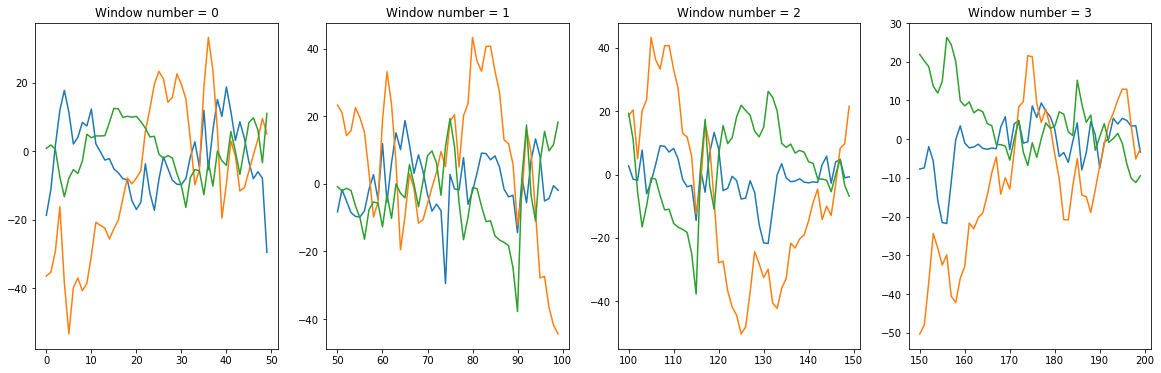

In [15]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

for i in range(4):
    ax[i].plot(first_four_windows[i]['gyro_x'])
    ax[i].plot(first_four_windows[i]['gyro_y'])
    ax[i].plot(first_four_windows[i]['gyro_z'])
    ax[i].set_title(f"Window number = {first_four_windows[i].window_id.values[0]}")


It's also interesting to observe the dimensionality of one window. Considering just the accelerometer and gyroscope signals, with all three axes, the resulting dimensionality of one window is:

In [16]:
columns_of_interest = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [17]:
np.array(first_four_windows[0][columns_of_interest]).shape

(50, 6)

## From sliding windows to datapoints

Each sliding window needs to be further processed in order to represent an appropriate input datapoint. The preprocessing methods might differ depending on which type of model you choose to use. 

You can also do further processing on the signal types and axes, for example smooth the signal, apply axis fusion, eliminate noise etc. 

Here we will discuss simple examples without any preprocessing. 

### Feature extraction with tsfresh

One quick and simple method to consider for HAR is a [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). It can take a multi-dimensional datapoint as input and can output a classification. 

We can transform each window of data into one single, multidimensional datapoint by applying simple computations using the [tsfresh](https://tsfresh.readthedocs.io/en/latest/text/feature_extraction_settings.html) package.

In [18]:
feature_list = []

for col in columns_of_interest:
    new_features = tsfresh.extract_features(timeseries_container=final_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    new_features.dropna()
    feature_list.append(new_features)
    
feature_list = pd.concat(feature_list, axis=1)

feature_list

Feature Extraction: 100%|██████████| 10/10 [00:01<00:00,  5.56it/s]


,accel_x__sum_values,accel_x__median,accel_x__mean,accel_x__length,accel_x__standard_deviation,accel_x__variance,accel_x__root_mean_square,accel_x__maximum,accel_x__absolute_maximum,accel_x__minimum,...,gyro_z__sum_values,gyro_z__median,gyro_z__mean,gyro_z__length,gyro_z__standard_deviation,gyro_z__variance,gyro_z__root_mean_square,gyro_z__maximum,gyro_z__absolute_maximum,gyro_z__minimum
0,-8.088135,-0.197021,-0.161763,50.0,0.159934,0.025579,0.227478,0.177979,0.492920,-0.492920,...,19.218750,0.289062,0.384375,50.0,7.302757,53.330264,7.312866,12.484375,16.406250,-16.406250
1,-5.474609,-0.092773,-0.109492,50.0,0.159415,0.025413,0.193395,0.177979,0.492920,-0.492920,...,-155.796875,-3.242188,-3.115937,50.0,11.348848,128.796349,11.768832,19.343750,37.765625,-37.765625
2,-3.650146,-0.044678,-0.073003,50.0,0.126026,0.015883,0.145643,0.149170,0.411377,-0.411377,...,117.828125,3.757812,2.356562,50.0,13.735620,188.667253,13.936307,26.265625,37.765625,-37.765625
3,-2.698486,-0.045166,-0.053970,50.0,0.136837,0.018724,0.147095,0.254883,0.395020,-0.395020,...,234.281250,3.750000,4.685625,50.0,8.791727,77.294469,9.962407,26.265625,26.265625,-11.218750
4,-3.884766,-0.092407,-0.077695,50.0,0.136364,0.018595,0.156945,0.254883,0.449219,-0.449219,...,-13.343750,0.242188,-0.266875,50.0,5.432773,29.515028,5.439324,15.218750,15.218750,-11.671875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7791,-46.149414,-1.027832,-0.922988,50.0,0.621975,0.386853,1.112996,0.181641,2.000000,-2.000000,...,-478.343750,-5.843750,-9.566875,50.0,51.601272,2662.691250,52.480628,92.031250,136.906250,-136.906250
7792,-46.776367,-1.063477,-0.935527,50.0,0.620041,0.384451,1.122347,0.181641,2.000000,-2.000000,...,-388.250000,-8.046875,-7.765000,50.0,56.294343,3169.053017,56.827355,135.250000,136.906250,-136.906250
7793,-49.399414,-1.071777,-0.987988,50.0,0.574514,0.330066,1.142885,0.142578,2.000000,-2.000000,...,-332.843750,-10.421875,-6.656875,50.0,54.921810,3016.405254,55.323767,135.250000,135.250000,-111.781250
7794,-47.966797,-1.057617,-0.959336,50.0,0.581148,0.337732,1.121632,0.324219,2.000000,-2.000000,...,-485.812500,-0.140625,-9.716250,50.0,48.452263,2347.621791,49.416873,128.093750,128.093750,-109.437500


Now the index represents the window ID, and each row in the DataFrame represents a multi-dimensional datapoint which we can use as input to the RFC.

You can use the window ID to refer back to the initial dataframe and get the class (activity type) for each window.

We will now process both recordings so that we have two classes for our classifier. For your own work you should only aim to perform classification on data from one sensor. 

In [19]:
window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap

window_number = 0 # start a counter at 0 to keep track of the window number

all_overlapping_windows = []

for rid, group in base_df[base_df["sensor_type"].str.contains("Thingy")].groupby("sensor_type"):
    print(f"Processing rid = {rid}")
    
    large_enough_windows = [window for window in group.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]
    
    overlapping_windows = large_enough_windows[::step_size] 
    
    # then we will append a window ID to each window
    for window in overlapping_windows:
        window.loc[:, 'window_id'] = window_number
        window_number += 1
    
    
    all_overlapping_windows.append(pd.concat(overlapping_windows).reset_index(drop=True))

Processing rid = Thingy


In [20]:
final_sliding_windows = pd.concat(all_overlapping_windows).reset_index(drop=True)

In [21]:
# now extract all features
feature_list = []

for col in columns_of_interest:
    new_features = tsfresh.extract_features(timeseries_container=final_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    new_features.dropna()
    feature_list.append(new_features)
feature_list = pd.concat(feature_list, axis=1)

feature_list

Feature Extraction: 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


,accel_x__sum_values,accel_x__median,accel_x__mean,accel_x__length,accel_x__standard_deviation,accel_x__variance,accel_x__root_mean_square,accel_x__maximum,accel_x__absolute_maximum,accel_x__minimum,...,gyro_z__sum_values,gyro_z__median,gyro_z__mean,gyro_z__length,gyro_z__standard_deviation,gyro_z__variance,gyro_z__root_mean_square,gyro_z__maximum,gyro_z__absolute_maximum,gyro_z__minimum
0,-34.715576,-0.694336,-0.694312,50.0,0.003353,0.000011,0.694320,-0.687012,0.700684,-0.700684,...,-16.468750,-0.343750,-0.329375,50.0,0.130535,0.017039,0.354298,-0.078125,0.640625,-0.640625
1,-34.652100,-0.693481,-0.693042,50.0,0.003297,0.000011,0.693050,-0.685547,0.702881,-0.702881,...,-14.078125,-0.289062,-0.281562,50.0,0.116655,0.013608,0.304772,0.015625,0.562500,-0.562500
2,-34.660889,-0.693359,-0.693218,50.0,0.003351,0.000011,0.693226,-0.685547,0.702881,-0.702881,...,-15.484375,-0.335938,-0.309688,50.0,0.133890,0.017927,0.337391,0.015625,0.750000,-0.750000
3,-34.688232,-0.693604,-0.693765,50.0,0.003380,0.000011,0.693773,-0.685547,0.700195,-0.700195,...,-18.875000,-0.375000,-0.377500,50.0,0.123876,0.015345,0.397305,-0.046875,0.750000,-0.750000
4,-34.723877,-0.694336,-0.694478,50.0,0.003908,0.000015,0.694489,-0.685547,0.704102,-0.704102,...,-19.468750,-0.375000,-0.389375,50.0,0.145467,0.021161,0.415660,0.000000,0.671875,-0.671875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51557,-47.034180,-1.042969,-0.940684,50.0,0.631445,0.398723,1.132964,0.181641,2.000000,-2.000000,...,-471.656250,-2.515625,-9.433125,50.0,52.729902,2780.442579,53.567027,92.031250,136.906250,-136.906250
51558,-48.360352,-1.071777,-0.967207,50.0,0.634802,0.402974,1.156920,0.181641,2.000000,-2.000000,...,-380.750000,-5.781250,-7.615000,50.0,57.089227,3259.179822,57.594861,135.250000,136.906250,-136.906250
51559,-48.715820,-1.060547,-0.974316,50.0,0.561460,0.315238,1.124513,0.142578,2.000000,-2.000000,...,-367.968750,-8.500000,-7.359375,50.0,53.373962,2848.779854,53.878941,135.250000,135.250000,-109.437500
51560,-46.743164,-1.057129,-0.934863,50.0,0.552245,0.304974,1.085792,0.324219,2.000000,-2.000000,...,-486.781250,-2.546875,-9.735625,50.0,49.072651,2408.125086,50.029066,128.093750,128.093750,-105.000000


Now we also extract the classes from each window

In [22]:
final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min)

,activity_type
window_id,
0,Lying down left
1,Lying down left
2,Lying down left
3,Lying down left
4,Lying down left
...,...
51557,Walking at normal speed
51558,Walking at normal speed
51559,Walking at normal speed


We need to assign a number to each categorical class for the Random Forest Classifer. It is mainly up to you how you categorise your classes. In this example, we will use the labels:
- 0 for Desk work
- 1 for Walking at normal speed

Bear in mind that your classification task will be multi-class, not binary. 

In [23]:
class_labels = {
    'Desk work': 0,
    'Walking at normal speed': 1,
    'Climbing stairs': 2,
    'Descending stairs': 3,
    'Lying down left': 4,
    'Lying down right': 5,
    'Lying down on back': 6,
    'Lying down on stomach': 7,
    'Movement': 8,
    'Running': 9,
    'Sitting': 10,
    'Sitting bent backward': 11,
    'Sitting bent forward': 12,
    'Standing': 13  
}

In [24]:
window_id_class_labels = final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min).replace(class_labels)
window_id_class_labels

,activity_type
window_id,
0,4
1,4
2,4
3,4
4,4
...,...
51557,1
51558,1
51559,1


In [25]:
new_activity_types = [10 if l in [0, 11, 12, 6] else l for l in list(window_id_class_labels["activity_type"])]
window_id_class_labels["activity_type"] = new_activity_types
window_id_class_labels

,activity_type
window_id,
0,4
1,4
2,4
3,4
4,4
...,...
51557,1
51558,1
51559,1


In [26]:
base_df["recording_id"].unique()

array([nan, 'Respeck_s1541031_Climbing stairs_06-10-2021_11-25-43',
       'Respeck_s1541031_Descending stairs_06-10-2021_11-25-05', ...,
       'Thingy_s2342658_Sitting_04-10-2022_14-17-29',
       'Thingy_s2342658_Standing_04-10-2022_14-22-37',
       'Thingy_s2342658_Walking at normal speed_04-10-2022_14-53-43'],
      dtype=object)

### Quickly training a Random Forest Classifier

We now have all the tools to start training a Random Forest Classifier. We will use the feature_list as inputs and window_id_class_labels as outputs. We will do a basic 80/20 split of the data for demonstration purposes. 

In your project you should split the data into training and tests sets by excluding entire subjects from the training set. This is discussed later on in this notebook.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(feature_list, window_id_class_labels,
                                                    test_size=0.2, train_size=0.8)

In [28]:
print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Test set: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set: X_train = (41249, 60), y_train = (41249, 1)
Test set: X_test = (10313, 60), y_test = (10313, 1)


Now we can build and train the random forest classifier

In [29]:
rfc = RandomForestClassifier(n_estimators=10)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

<ipython-input-29-014410a81363>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


In [30]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           1       0.81      0.92      0.86       698
           2       0.82      0.84      0.83       768
           3       0.85      0.84      0.85       759
           4       0.96      0.97      0.96       699
           5       1.00      0.96      0.98       733
           7       0.99      0.98      0.98       742
           8       0.80      0.75      0.78       730
           9       0.94      0.97      0.95       716
          10       0.99      0.98      0.99      3715
          13       0.98      0.94      0.96       753

    accuracy                           0.93     10313
   macro avg       0.91      0.92      0.91     10313
weighted avg       0.94      0.93      0.93     10313



This is a very easy problem so the classifier learns very quickly. Your actual problem of classifying multiple activities will be much harder.

## Leave-one-subject-out cross-validation

One of the other reason our previous classifier functions so well is that each person performs activities in a very consistent manner. If a subject's data is both in the training set and the test set, it provides the model with an unfair advantage. Moreover, the results that your model will output will be falsely high. When you test your model on a completely new, unseen subject, your accuracy will drop considerably. 

This is why when training a HAR model you will want to do a special kind of cross-validation: Leave-One-Subject-Out (LOSOXV), where we leave one (or more) subject(s) in the testing set at each iteration.

![losoxv](../Images/LOOCV.png "losoxv")

This ensures that the results we get from our classifier are consistent to what we would get in real life, if we were to test the model on a new user.

## Training a simple CNN

There are some different preprocessing techniques you can apply when the resulting "datapoint" is an input to a convolutional neural network. 

You can use two types of convolutional layers:
* 1D Conv Layers - which will work on 1D data, for example a single axis from one single sensor (accel, gyro or mag)
* 2D Conv Layers - suitable if the input data is in the form of an image, for example

We will be demonstrating how to build a simple 1D CNN using 6 channels: the 3 axes of the accelerometer and the 3 axes of the gyroscope.

### Setting up the model

In [41]:
filters = 128
kernel_size = 3
n_features = 6
activation='relu'
n_classes = 10

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 48, 128)           2432      
                                                                 
 batch_normalization_3 (Batc  (None, 48, 128)          512       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 48, 128)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 46, 128)           49280     
                                                                 
 batch_normalization_4 (Batc  (None, 46, 128)          512       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 46, 128)          

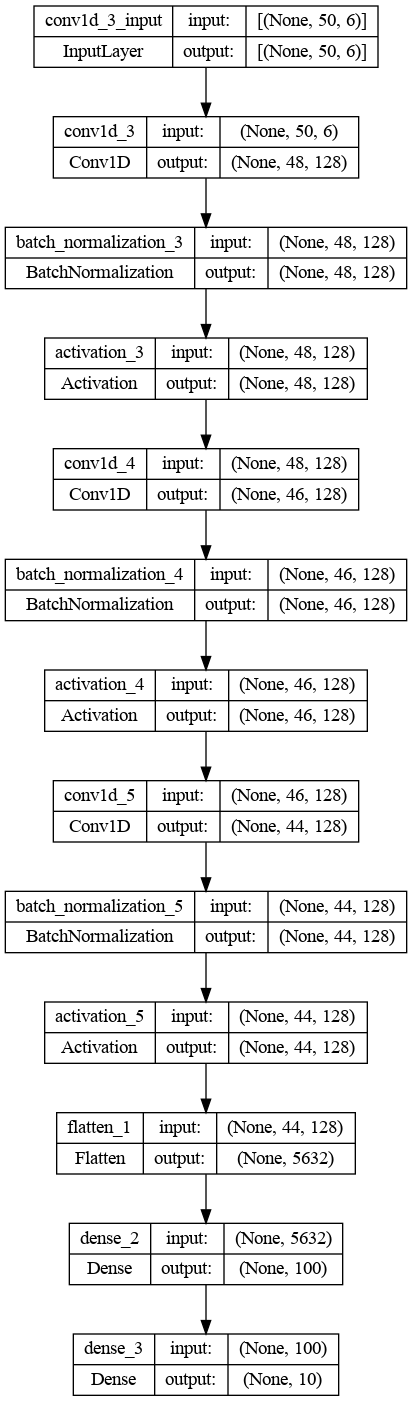

In [42]:
from keras.utils.vis_utils import plot_model
model = Sequential()

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear', 
                 input_shape=(window_size, n_features)))
model.add(BatchNormalization())
model.add(Activation(activation))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(Activation(activation))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(Activation(activation))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()
plot_model(model, show_shapes=True, show_layer_names = True)

### Re-generating the data in the appropriate format

We need to do a bit more work with our data to bring it into a format fit for training a CNN. 

A CNN will take multi-dimensional arrays as input. We have already specified that the input shape is (window_size, n_features), i.e. (50, 6). 

Remember that we generated sliding windows before. Now we just need to take the raw values from each window and create a training set. 

In [43]:
columns_of_interest

['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [44]:
X = []
y = []

for window_id, group in final_sliding_windows.groupby('window_id'):
    print(f"window_id = {window_id}")
    
    shape = group[columns_of_interest].values.shape
    print(f"shape = {shape}")
    
    X.append(group[columns_of_interest].values)
    y.append(class_labels[group["activity_type"].values[0]])

window_id = 0
shape = (50, 6)
window_id = 1
shape = (50, 6)
window_id = 2
shape = (50, 6)
window_id = 3
shape = (50, 6)
window_id = 4
shape = (50, 6)
window_id = 5
shape = (50, 6)
window_id = 6
shape = (50, 6)
window_id = 7
shape = (50, 6)
window_id = 8
shape = (50, 6)
window_id = 9
shape = (50, 6)
window_id = 10
shape = (50, 6)
window_id = 11
shape = (50, 6)
window_id = 12
shape = (50, 6)
window_id = 13
shape = (50, 6)
window_id = 14
shape = (50, 6)
window_id = 15
shape = (50, 6)
window_id = 16
shape = (50, 6)
window_id = 17
shape = (50, 6)
window_id = 18
shape = (50, 6)
window_id = 19
shape = (50, 6)
window_id = 20
shape = (50, 6)
window_id = 21
shape = (50, 6)
window_id = 22
shape = (50, 6)
window_id = 23
shape = (50, 6)
window_id = 24
shape = (50, 6)
window_id = 25
shape = (50, 6)
window_id = 26
shape = (50, 6)
window_id = 27
shape = (50, 6)
window_id = 28
shape = (50, 6)
window_id = 29
shape = (50, 6)
window_id = 30
shape = (50, 6)
window_id = 31
shape = (50, 6)
window_id = 32
sha

window_id = 377
shape = (50, 6)
window_id = 378
shape = (50, 6)
window_id = 379
shape = (50, 6)
window_id = 380
shape = (50, 6)
window_id = 381
shape = (50, 6)
window_id = 382
shape = (50, 6)
window_id = 383
shape = (50, 6)
window_id = 384
shape = (50, 6)
window_id = 385
shape = (50, 6)
window_id = 386
shape = (50, 6)
window_id = 387
shape = (50, 6)
window_id = 388
shape = (50, 6)
window_id = 389
shape = (50, 6)
window_id = 390
shape = (50, 6)
window_id = 391
shape = (50, 6)
window_id = 392
shape = (50, 6)
window_id = 393
shape = (50, 6)
window_id = 394
shape = (50, 6)
window_id = 395
shape = (50, 6)
window_id = 396
shape = (50, 6)
window_id = 397
shape = (50, 6)
window_id = 398
shape = (50, 6)
window_id = 399
shape = (50, 6)
window_id = 400
shape = (50, 6)
window_id = 401
shape = (50, 6)
window_id = 402
shape = (50, 6)
window_id = 403
shape = (50, 6)
window_id = 404
shape = (50, 6)
window_id = 405
shape = (50, 6)
window_id = 406
shape = (50, 6)
window_id = 407
shape = (50, 6)
window_i

shape = (50, 6)
window_id = 732
shape = (50, 6)
window_id = 733
shape = (50, 6)
window_id = 734
shape = (50, 6)
window_id = 735
shape = (50, 6)
window_id = 736
shape = (50, 6)
window_id = 737
shape = (50, 6)
window_id = 738
shape = (50, 6)
window_id = 739
shape = (50, 6)
window_id = 740
shape = (50, 6)
window_id = 741
shape = (50, 6)
window_id = 742
shape = (50, 6)
window_id = 743
shape = (50, 6)
window_id = 744
shape = (50, 6)
window_id = 745
shape = (50, 6)
window_id = 746
shape = (50, 6)
window_id = 747
shape = (50, 6)
window_id = 748
shape = (50, 6)
window_id = 749
shape = (50, 6)
window_id = 750
shape = (50, 6)
window_id = 751
shape = (50, 6)
window_id = 752
shape = (50, 6)
window_id = 753
shape = (50, 6)
window_id = 754
shape = (50, 6)
window_id = 755
shape = (50, 6)
window_id = 756
shape = (50, 6)
window_id = 757
shape = (50, 6)
window_id = 758
shape = (50, 6)
window_id = 759
shape = (50, 6)
window_id = 760
shape = (50, 6)
window_id = 761
shape = (50, 6)
window_id = 762
shape = 

shape = (50, 6)
window_id = 1095
shape = (50, 6)
window_id = 1096
shape = (50, 6)
window_id = 1097
shape = (50, 6)
window_id = 1098
shape = (50, 6)
window_id = 1099
shape = (50, 6)
window_id = 1100
shape = (50, 6)
window_id = 1101
shape = (50, 6)
window_id = 1102
shape = (50, 6)
window_id = 1103
shape = (50, 6)
window_id = 1104
shape = (50, 6)
window_id = 1105
shape = (50, 6)
window_id = 1106
shape = (50, 6)
window_id = 1107
shape = (50, 6)
window_id = 1108
shape = (50, 6)
window_id = 1109
shape = (50, 6)
window_id = 1110
shape = (50, 6)
window_id = 1111
shape = (50, 6)
window_id = 1112
shape = (50, 6)
window_id = 1113
shape = (50, 6)
window_id = 1114
shape = (50, 6)
window_id = 1115
shape = (50, 6)
window_id = 1116
shape = (50, 6)
window_id = 1117
shape = (50, 6)
window_id = 1118
shape = (50, 6)
window_id = 1119
shape = (50, 6)
window_id = 1120
shape = (50, 6)
window_id = 1121
shape = (50, 6)
window_id = 1122
shape = (50, 6)
window_id = 1123
shape = (50, 6)
window_id = 1124
shape = (5

window_id = 1457
shape = (50, 6)
window_id = 1458
shape = (50, 6)
window_id = 1459
shape = (50, 6)
window_id = 1460
shape = (50, 6)
window_id = 1461
shape = (50, 6)
window_id = 1462
shape = (50, 6)
window_id = 1463
shape = (50, 6)
window_id = 1464
shape = (50, 6)
window_id = 1465
shape = (50, 6)
window_id = 1466
shape = (50, 6)
window_id = 1467
shape = (50, 6)
window_id = 1468
shape = (50, 6)
window_id = 1469
shape = (50, 6)
window_id = 1470
shape = (50, 6)
window_id = 1471
shape = (50, 6)
window_id = 1472
shape = (50, 6)
window_id = 1473
shape = (50, 6)
window_id = 1474
shape = (50, 6)
window_id = 1475
shape = (50, 6)
window_id = 1476
shape = (50, 6)
window_id = 1477
shape = (50, 6)
window_id = 1478
shape = (50, 6)
window_id = 1479
shape = (50, 6)
window_id = 1480
shape = (50, 6)
window_id = 1481
shape = (50, 6)
window_id = 1482
shape = (50, 6)
window_id = 1483
shape = (50, 6)
window_id = 1484
shape = (50, 6)
window_id = 1485
shape = (50, 6)
window_id = 1486
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 1816
shape = (50, 6)
window_id = 1817
shape = (50, 6)
window_id = 1818
shape = (50, 6)
window_id = 1819
shape = (50, 6)
window_id = 1820
shape = (50, 6)
window_id = 1821
shape = (50, 6)
window_id = 1822
shape = (50, 6)
window_id = 1823
shape = (50, 6)
window_id = 1824
shape = (50, 6)
window_id = 1825
shape = (50, 6)
window_id = 1826
shape = (50, 6)
window_id = 1827
shape = (50, 6)
window_id = 1828
shape = (50, 6)
window_id = 1829
shape = (50, 6)
window_id = 1830
shape = (50, 6)
window_id = 1831
shape = (50, 6)
window_id = 1832
shape = (50, 6)
window_id = 1833
shape = (50, 6)
window_id = 1834
shape = (50, 6)
window_id = 1835
shape = (50, 6)
window_id = 1836
shape = (50, 6)
window_id = 1837
shape = (50, 6)
window_id = 1838
shape = (50, 6)
window_id = 1839
shape = (50, 6)
window_id = 1840
shape = (50, 6)
window_id = 1841
shape = (50, 6)
window_id = 1842
shape = (50, 6)
window_id = 1843
shape = (50, 6)
window_id = 1844
shape = (50, 6)
window_id = 1845
shape = (5

window_id = 2198
shape = (50, 6)
window_id = 2199
shape = (50, 6)
window_id = 2200
shape = (50, 6)
window_id = 2201
shape = (50, 6)
window_id = 2202
shape = (50, 6)
window_id = 2203
shape = (50, 6)
window_id = 2204
shape = (50, 6)
window_id = 2205
shape = (50, 6)
window_id = 2206
shape = (50, 6)
window_id = 2207
shape = (50, 6)
window_id = 2208
shape = (50, 6)
window_id = 2209
shape = (50, 6)
window_id = 2210
shape = (50, 6)
window_id = 2211
shape = (50, 6)
window_id = 2212
shape = (50, 6)
window_id = 2213
shape = (50, 6)
window_id = 2214
shape = (50, 6)
window_id = 2215
shape = (50, 6)
window_id = 2216
shape = (50, 6)
window_id = 2217
shape = (50, 6)
window_id = 2218
shape = (50, 6)
window_id = 2219
shape = (50, 6)
window_id = 2220
shape = (50, 6)
window_id = 2221
shape = (50, 6)
window_id = 2222
shape = (50, 6)
window_id = 2223
shape = (50, 6)
window_id = 2224
shape = (50, 6)
window_id = 2225
shape = (50, 6)
window_id = 2226
shape = (50, 6)
window_id = 2227
shape = (50, 6)
window_id 

window_id = 2562
shape = (50, 6)
window_id = 2563
shape = (50, 6)
window_id = 2564
shape = (50, 6)
window_id = 2565
shape = (50, 6)
window_id = 2566
shape = (50, 6)
window_id = 2567
shape = (50, 6)
window_id = 2568
shape = (50, 6)
window_id = 2569
shape = (50, 6)
window_id = 2570
shape = (50, 6)
window_id = 2571
shape = (50, 6)
window_id = 2572
shape = (50, 6)
window_id = 2573
shape = (50, 6)
window_id = 2574
shape = (50, 6)
window_id = 2575
shape = (50, 6)
window_id = 2576
shape = (50, 6)
window_id = 2577
shape = (50, 6)
window_id = 2578
shape = (50, 6)
window_id = 2579
shape = (50, 6)
window_id = 2580
shape = (50, 6)
window_id = 2581
shape = (50, 6)
window_id = 2582
shape = (50, 6)
window_id = 2583
shape = (50, 6)
window_id = 2584
shape = (50, 6)
window_id = 2585
shape = (50, 6)
window_id = 2586
shape = (50, 6)
window_id = 2587
shape = (50, 6)
window_id = 2588
shape = (50, 6)
window_id = 2589
shape = (50, 6)
window_id = 2590
shape = (50, 6)
window_id = 2591
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 2927
shape = (50, 6)
window_id = 2928
shape = (50, 6)
window_id = 2929
shape = (50, 6)
window_id = 2930
shape = (50, 6)
window_id = 2931
shape = (50, 6)
window_id = 2932
shape = (50, 6)
window_id = 2933
shape = (50, 6)
window_id = 2934
shape = (50, 6)
window_id = 2935
shape = (50, 6)
window_id = 2936
shape = (50, 6)
window_id = 2937
shape = (50, 6)
window_id = 2938
shape = (50, 6)
window_id = 2939
shape = (50, 6)
window_id = 2940
shape = (50, 6)
window_id = 2941
shape = (50, 6)
window_id = 2942
shape = (50, 6)
window_id = 2943
shape = (50, 6)
window_id = 2944
shape = (50, 6)
window_id = 2945
shape = (50, 6)
window_id = 2946
shape = (50, 6)
window_id = 2947
shape = (50, 6)
window_id = 2948
shape = (50, 6)
window_id = 2949
shape = (50, 6)
window_id = 2950
shape = (50, 6)
window_id = 2951
shape = (50, 6)
window_id = 2952
shape = (50, 6)
window_id = 2953
shape = (50, 6)
window_id = 2954
shape = (50, 6)
window_id = 2955
shape = (50, 6)
window_id = 2956
shape = (5

shape = (50, 6)
window_id = 3280
shape = (50, 6)
window_id = 3281
shape = (50, 6)
window_id = 3282
shape = (50, 6)
window_id = 3283
shape = (50, 6)
window_id = 3284
shape = (50, 6)
window_id = 3285
shape = (50, 6)
window_id = 3286
shape = (50, 6)
window_id = 3287
shape = (50, 6)
window_id = 3288
shape = (50, 6)
window_id = 3289
shape = (50, 6)
window_id = 3290
shape = (50, 6)
window_id = 3291
shape = (50, 6)
window_id = 3292
shape = (50, 6)
window_id = 3293
shape = (50, 6)
window_id = 3294
shape = (50, 6)
window_id = 3295
shape = (50, 6)
window_id = 3296
shape = (50, 6)
window_id = 3297
shape = (50, 6)
window_id = 3298
shape = (50, 6)
window_id = 3299
shape = (50, 6)
window_id = 3300
shape = (50, 6)
window_id = 3301
shape = (50, 6)
window_id = 3302
shape = (50, 6)
window_id = 3303
shape = (50, 6)
window_id = 3304
shape = (50, 6)
window_id = 3305
shape = (50, 6)
window_id = 3306
shape = (50, 6)
window_id = 3307
shape = (50, 6)
window_id = 3308
shape = (50, 6)
window_id = 3309
shape = (5

shape = (50, 6)
window_id = 3632
shape = (50, 6)
window_id = 3633
shape = (50, 6)
window_id = 3634
shape = (50, 6)
window_id = 3635
shape = (50, 6)
window_id = 3636
shape = (50, 6)
window_id = 3637
shape = (50, 6)
window_id = 3638
shape = (50, 6)
window_id = 3639
shape = (50, 6)
window_id = 3640
shape = (50, 6)
window_id = 3641
shape = (50, 6)
window_id = 3642
shape = (50, 6)
window_id = 3643
shape = (50, 6)
window_id = 3644
shape = (50, 6)
window_id = 3645
shape = (50, 6)
window_id = 3646
shape = (50, 6)
window_id = 3647
shape = (50, 6)
window_id = 3648
shape = (50, 6)
window_id = 3649
shape = (50, 6)
window_id = 3650
shape = (50, 6)
window_id = 3651
shape = (50, 6)
window_id = 3652
shape = (50, 6)
window_id = 3653
shape = (50, 6)
window_id = 3654
shape = (50, 6)
window_id = 3655
shape = (50, 6)
window_id = 3656
shape = (50, 6)
window_id = 3657
shape = (50, 6)
window_id = 3658
shape = (50, 6)
window_id = 3659
shape = (50, 6)
window_id = 3660
shape = (50, 6)
window_id = 3661
shape = (5

window_id = 3996
shape = (50, 6)
window_id = 3997
shape = (50, 6)
window_id = 3998
shape = (50, 6)
window_id = 3999
shape = (50, 6)
window_id = 4000
shape = (50, 6)
window_id = 4001
shape = (50, 6)
window_id = 4002
shape = (50, 6)
window_id = 4003
shape = (50, 6)
window_id = 4004
shape = (50, 6)
window_id = 4005
shape = (50, 6)
window_id = 4006
shape = (50, 6)
window_id = 4007
shape = (50, 6)
window_id = 4008
shape = (50, 6)
window_id = 4009
shape = (50, 6)
window_id = 4010
shape = (50, 6)
window_id = 4011
shape = (50, 6)
window_id = 4012
shape = (50, 6)
window_id = 4013
shape = (50, 6)
window_id = 4014
shape = (50, 6)
window_id = 4015
shape = (50, 6)
window_id = 4016
shape = (50, 6)
window_id = 4017
shape = (50, 6)
window_id = 4018
shape = (50, 6)
window_id = 4019
shape = (50, 6)
window_id = 4020
shape = (50, 6)
window_id = 4021
shape = (50, 6)
window_id = 4022
shape = (50, 6)
window_id = 4023
shape = (50, 6)
window_id = 4024
shape = (50, 6)
window_id = 4025
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 4364
shape = (50, 6)
window_id = 4365
shape = (50, 6)
window_id = 4366
shape = (50, 6)
window_id = 4367
shape = (50, 6)
window_id = 4368
shape = (50, 6)
window_id = 4369
shape = (50, 6)
window_id = 4370
shape = (50, 6)
window_id = 4371
shape = (50, 6)
window_id = 4372
shape = (50, 6)
window_id = 4373
shape = (50, 6)
window_id = 4374
shape = (50, 6)
window_id = 4375
shape = (50, 6)
window_id = 4376
shape = (50, 6)
window_id = 4377
shape = (50, 6)
window_id = 4378
shape = (50, 6)
window_id = 4379
shape = (50, 6)
window_id = 4380
shape = (50, 6)
window_id = 4381
shape = (50, 6)
window_id = 4382
shape = (50, 6)
window_id = 4383
shape = (50, 6)
window_id = 4384
shape = (50, 6)
window_id = 4385
shape = (50, 6)
window_id = 4386
shape = (50, 6)
window_id = 4387
shape = (50, 6)
window_id = 4388
shape = (50, 6)
window_id = 4389
shape = (50, 6)
window_id = 4390
shape = (50, 6)
window_id = 4391
shape = (50, 6)
window_id = 4392
shape = (50, 6)
window_id = 4393
shape = (5

shape = (50, 6)
window_id = 4720
shape = (50, 6)
window_id = 4721
shape = (50, 6)
window_id = 4722
shape = (50, 6)
window_id = 4723
shape = (50, 6)
window_id = 4724
shape = (50, 6)
window_id = 4725
shape = (50, 6)
window_id = 4726
shape = (50, 6)
window_id = 4727
shape = (50, 6)
window_id = 4728
shape = (50, 6)
window_id = 4729
shape = (50, 6)
window_id = 4730
shape = (50, 6)
window_id = 4731
shape = (50, 6)
window_id = 4732
shape = (50, 6)
window_id = 4733
shape = (50, 6)
window_id = 4734
shape = (50, 6)
window_id = 4735
shape = (50, 6)
window_id = 4736
shape = (50, 6)
window_id = 4737
shape = (50, 6)
window_id = 4738
shape = (50, 6)
window_id = 4739
shape = (50, 6)
window_id = 4740
shape = (50, 6)
window_id = 4741
shape = (50, 6)
window_id = 4742
shape = (50, 6)
window_id = 4743
shape = (50, 6)
window_id = 4744
shape = (50, 6)
window_id = 4745
shape = (50, 6)
window_id = 4746
shape = (50, 6)
window_id = 4747
shape = (50, 6)
window_id = 4748
shape = (50, 6)
window_id = 4749
shape = (5

shape = (50, 6)
window_id = 5078
shape = (50, 6)
window_id = 5079
shape = (50, 6)
window_id = 5080
shape = (50, 6)
window_id = 5081
shape = (50, 6)
window_id = 5082
shape = (50, 6)
window_id = 5083
shape = (50, 6)
window_id = 5084
shape = (50, 6)
window_id = 5085
shape = (50, 6)
window_id = 5086
shape = (50, 6)
window_id = 5087
shape = (50, 6)
window_id = 5088
shape = (50, 6)
window_id = 5089
shape = (50, 6)
window_id = 5090
shape = (50, 6)
window_id = 5091
shape = (50, 6)
window_id = 5092
shape = (50, 6)
window_id = 5093
shape = (50, 6)
window_id = 5094
shape = (50, 6)
window_id = 5095
shape = (50, 6)
window_id = 5096
shape = (50, 6)
window_id = 5097
shape = (50, 6)
window_id = 5098
shape = (50, 6)
window_id = 5099
shape = (50, 6)
window_id = 5100
shape = (50, 6)
window_id = 5101
shape = (50, 6)
window_id = 5102
shape = (50, 6)
window_id = 5103
shape = (50, 6)
window_id = 5104
shape = (50, 6)
window_id = 5105
shape = (50, 6)
window_id = 5106
shape = (50, 6)
window_id = 5107
shape = (5

window_id = 5418
shape = (50, 6)
window_id = 5419
shape = (50, 6)
window_id = 5420
shape = (50, 6)
window_id = 5421
shape = (50, 6)
window_id = 5422
shape = (50, 6)
window_id = 5423
shape = (50, 6)
window_id = 5424
shape = (50, 6)
window_id = 5425
shape = (50, 6)
window_id = 5426
shape = (50, 6)
window_id = 5427
shape = (50, 6)
window_id = 5428
shape = (50, 6)
window_id = 5429
shape = (50, 6)
window_id = 5430
shape = (50, 6)
window_id = 5431
shape = (50, 6)
window_id = 5432
shape = (50, 6)
window_id = 5433
shape = (50, 6)
window_id = 5434
shape = (50, 6)
window_id = 5435
shape = (50, 6)
window_id = 5436
shape = (50, 6)
window_id = 5437
shape = (50, 6)
window_id = 5438
shape = (50, 6)
window_id = 5439
shape = (50, 6)
window_id = 5440
shape = (50, 6)
window_id = 5441
shape = (50, 6)
window_id = 5442
shape = (50, 6)
window_id = 5443
shape = (50, 6)
window_id = 5444
shape = (50, 6)
window_id = 5445
shape = (50, 6)
window_id = 5446
shape = (50, 6)
window_id = 5447
shape = (50, 6)
window_id 

window_id = 5764
shape = (50, 6)
window_id = 5765
shape = (50, 6)
window_id = 5766
shape = (50, 6)
window_id = 5767
shape = (50, 6)
window_id = 5768
shape = (50, 6)
window_id = 5769
shape = (50, 6)
window_id = 5770
shape = (50, 6)
window_id = 5771
shape = (50, 6)
window_id = 5772
shape = (50, 6)
window_id = 5773
shape = (50, 6)
window_id = 5774
shape = (50, 6)
window_id = 5775
shape = (50, 6)
window_id = 5776
shape = (50, 6)
window_id = 5777
shape = (50, 6)
window_id = 5778
shape = (50, 6)
window_id = 5779
shape = (50, 6)
window_id = 5780
shape = (50, 6)
window_id = 5781
shape = (50, 6)
window_id = 5782
shape = (50, 6)
window_id = 5783
shape = (50, 6)
window_id = 5784
shape = (50, 6)
window_id = 5785
shape = (50, 6)
window_id = 5786
shape = (50, 6)
window_id = 5787
shape = (50, 6)
window_id = 5788
shape = (50, 6)
window_id = 5789
shape = (50, 6)
window_id = 5790
shape = (50, 6)
window_id = 5791
shape = (50, 6)
window_id = 5792
shape = (50, 6)
window_id = 5793
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 6124
shape = (50, 6)
window_id = 6125
shape = (50, 6)
window_id = 6126
shape = (50, 6)
window_id = 6127
shape = (50, 6)
window_id = 6128
shape = (50, 6)
window_id = 6129
shape = (50, 6)
window_id = 6130
shape = (50, 6)
window_id = 6131
shape = (50, 6)
window_id = 6132
shape = (50, 6)
window_id = 6133
shape = (50, 6)
window_id = 6134
shape = (50, 6)
window_id = 6135
shape = (50, 6)
window_id = 6136
shape = (50, 6)
window_id = 6137
shape = (50, 6)
window_id = 6138
shape = (50, 6)
window_id = 6139
shape = (50, 6)
window_id = 6140
shape = (50, 6)
window_id = 6141
shape = (50, 6)
window_id = 6142
shape = (50, 6)
window_id = 6143
shape = (50, 6)
window_id = 6144
shape = (50, 6)
window_id = 6145
shape = (50, 6)
window_id = 6146
shape = (50, 6)
window_id = 6147
shape = (50, 6)
window_id = 6148
shape = (50, 6)
window_id = 6149
shape = (50, 6)
window_id = 6150
shape = (50, 6)
window_id = 6151
shape = (50, 6)
window_id = 6152
shape = (50, 6)
window_id = 6153
shape = (5

window_id = 6496
shape = (50, 6)
window_id = 6497
shape = (50, 6)
window_id = 6498
shape = (50, 6)
window_id = 6499
shape = (50, 6)
window_id = 6500
shape = (50, 6)
window_id = 6501
shape = (50, 6)
window_id = 6502
shape = (50, 6)
window_id = 6503
shape = (50, 6)
window_id = 6504
shape = (50, 6)
window_id = 6505
shape = (50, 6)
window_id = 6506
shape = (50, 6)
window_id = 6507
shape = (50, 6)
window_id = 6508
shape = (50, 6)
window_id = 6509
shape = (50, 6)
window_id = 6510
shape = (50, 6)
window_id = 6511
shape = (50, 6)
window_id = 6512
shape = (50, 6)
window_id = 6513
shape = (50, 6)
window_id = 6514
shape = (50, 6)
window_id = 6515
shape = (50, 6)
window_id = 6516
shape = (50, 6)
window_id = 6517
shape = (50, 6)
window_id = 6518
shape = (50, 6)
window_id = 6519
shape = (50, 6)
window_id = 6520
shape = (50, 6)
window_id = 6521
shape = (50, 6)
window_id = 6522
shape = (50, 6)
window_id = 6523
shape = (50, 6)
window_id = 6524
shape = (50, 6)
window_id = 6525
shape = (50, 6)
window_id 

window_id = 6860
shape = (50, 6)
window_id = 6861
shape = (50, 6)
window_id = 6862
shape = (50, 6)
window_id = 6863
shape = (50, 6)
window_id = 6864
shape = (50, 6)
window_id = 6865
shape = (50, 6)
window_id = 6866
shape = (50, 6)
window_id = 6867
shape = (50, 6)
window_id = 6868
shape = (50, 6)
window_id = 6869
shape = (50, 6)
window_id = 6870
shape = (50, 6)
window_id = 6871
shape = (50, 6)
window_id = 6872
shape = (50, 6)
window_id = 6873
shape = (50, 6)
window_id = 6874
shape = (50, 6)
window_id = 6875
shape = (50, 6)
window_id = 6876
shape = (50, 6)
window_id = 6877
shape = (50, 6)
window_id = 6878
shape = (50, 6)
window_id = 6879
shape = (50, 6)
window_id = 6880
shape = (50, 6)
window_id = 6881
shape = (50, 6)
window_id = 6882
shape = (50, 6)
window_id = 6883
shape = (50, 6)
window_id = 6884
shape = (50, 6)
window_id = 6885
shape = (50, 6)
window_id = 6886
shape = (50, 6)
window_id = 6887
shape = (50, 6)
window_id = 6888
shape = (50, 6)
window_id = 6889
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 7220
shape = (50, 6)
window_id = 7221
shape = (50, 6)
window_id = 7222
shape = (50, 6)
window_id = 7223
shape = (50, 6)
window_id = 7224
shape = (50, 6)
window_id = 7225
shape = (50, 6)
window_id = 7226
shape = (50, 6)
window_id = 7227
shape = (50, 6)
window_id = 7228
shape = (50, 6)
window_id = 7229
shape = (50, 6)
window_id = 7230
shape = (50, 6)
window_id = 7231
shape = (50, 6)
window_id = 7232
shape = (50, 6)
window_id = 7233
shape = (50, 6)
window_id = 7234
shape = (50, 6)
window_id = 7235
shape = (50, 6)
window_id = 7236
shape = (50, 6)
window_id = 7237
shape = (50, 6)
window_id = 7238
shape = (50, 6)
window_id = 7239
shape = (50, 6)
window_id = 7240
shape = (50, 6)
window_id = 7241
shape = (50, 6)
window_id = 7242
shape = (50, 6)
window_id = 7243
shape = (50, 6)
window_id = 7244
shape = (50, 6)
window_id = 7245
shape = (50, 6)
window_id = 7246
shape = (50, 6)
window_id = 7247
shape = (50, 6)
window_id = 7248
shape = (50, 6)
window_id = 7249
shape = (5

window_id = 7583
shape = (50, 6)
window_id = 7584
shape = (50, 6)
window_id = 7585
shape = (50, 6)
window_id = 7586
shape = (50, 6)
window_id = 7587
shape = (50, 6)
window_id = 7588
shape = (50, 6)
window_id = 7589
shape = (50, 6)
window_id = 7590
shape = (50, 6)
window_id = 7591
shape = (50, 6)
window_id = 7592
shape = (50, 6)
window_id = 7593
shape = (50, 6)
window_id = 7594
shape = (50, 6)
window_id = 7595
shape = (50, 6)
window_id = 7596
shape = (50, 6)
window_id = 7597
shape = (50, 6)
window_id = 7598
shape = (50, 6)
window_id = 7599
shape = (50, 6)
window_id = 7600
shape = (50, 6)
window_id = 7601
shape = (50, 6)
window_id = 7602
shape = (50, 6)
window_id = 7603
shape = (50, 6)
window_id = 7604
shape = (50, 6)
window_id = 7605
shape = (50, 6)
window_id = 7606
shape = (50, 6)
window_id = 7607
shape = (50, 6)
window_id = 7608
shape = (50, 6)
window_id = 7609
shape = (50, 6)
window_id = 7610
shape = (50, 6)
window_id = 7611
shape = (50, 6)
window_id = 7612
shape = (50, 6)
window_id 

window_id = 7944
shape = (50, 6)
window_id = 7945
shape = (50, 6)
window_id = 7946
shape = (50, 6)
window_id = 7947
shape = (50, 6)
window_id = 7948
shape = (50, 6)
window_id = 7949
shape = (50, 6)
window_id = 7950
shape = (50, 6)
window_id = 7951
shape = (50, 6)
window_id = 7952
shape = (50, 6)
window_id = 7953
shape = (50, 6)
window_id = 7954
shape = (50, 6)
window_id = 7955
shape = (50, 6)
window_id = 7956
shape = (50, 6)
window_id = 7957
shape = (50, 6)
window_id = 7958
shape = (50, 6)
window_id = 7959
shape = (50, 6)
window_id = 7960
shape = (50, 6)
window_id = 7961
shape = (50, 6)
window_id = 7962
shape = (50, 6)
window_id = 7963
shape = (50, 6)
window_id = 7964
shape = (50, 6)
window_id = 7965
shape = (50, 6)
window_id = 7966
shape = (50, 6)
window_id = 7967
shape = (50, 6)
window_id = 7968
shape = (50, 6)
window_id = 7969
shape = (50, 6)
window_id = 7970
shape = (50, 6)
window_id = 7971
shape = (50, 6)
window_id = 7972
shape = (50, 6)
window_id = 7973
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 8327
shape = (50, 6)
window_id = 8328
shape = (50, 6)
window_id = 8329
shape = (50, 6)
window_id = 8330
shape = (50, 6)
window_id = 8331
shape = (50, 6)
window_id = 8332
shape = (50, 6)
window_id = 8333
shape = (50, 6)
window_id = 8334
shape = (50, 6)
window_id = 8335
shape = (50, 6)
window_id = 8336
shape = (50, 6)
window_id = 8337
shape = (50, 6)
window_id = 8338
shape = (50, 6)
window_id = 8339
shape = (50, 6)
window_id = 8340
shape = (50, 6)
window_id = 8341
shape = (50, 6)
window_id = 8342
shape = (50, 6)
window_id = 8343
shape = (50, 6)
window_id = 8344
shape = (50, 6)
window_id = 8345
shape = (50, 6)
window_id = 8346
shape = (50, 6)
window_id = 8347
shape = (50, 6)
window_id = 8348
shape = (50, 6)
window_id = 8349
shape = (50, 6)
window_id = 8350
shape = (50, 6)
window_id = 8351
shape = (50, 6)
window_id = 8352
shape = (50, 6)
window_id = 8353
shape = (50, 6)
window_id = 8354
shape = (50, 6)
window_id = 8355
shape = (50, 6)
window_id = 8356
shape = (5

window_id = 8699
shape = (50, 6)
window_id = 8700
shape = (50, 6)
window_id = 8701
shape = (50, 6)
window_id = 8702
shape = (50, 6)
window_id = 8703
shape = (50, 6)
window_id = 8704
shape = (50, 6)
window_id = 8705
shape = (50, 6)
window_id = 8706
shape = (50, 6)
window_id = 8707
shape = (50, 6)
window_id = 8708
shape = (50, 6)
window_id = 8709
shape = (50, 6)
window_id = 8710
shape = (50, 6)
window_id = 8711
shape = (50, 6)
window_id = 8712
shape = (50, 6)
window_id = 8713
shape = (50, 6)
window_id = 8714
shape = (50, 6)
window_id = 8715
shape = (50, 6)
window_id = 8716
shape = (50, 6)
window_id = 8717
shape = (50, 6)
window_id = 8718
shape = (50, 6)
window_id = 8719
shape = (50, 6)
window_id = 8720
shape = (50, 6)
window_id = 8721
shape = (50, 6)
window_id = 8722
shape = (50, 6)
window_id = 8723
shape = (50, 6)
window_id = 8724
shape = (50, 6)
window_id = 8725
shape = (50, 6)
window_id = 8726
shape = (50, 6)
window_id = 8727
shape = (50, 6)
window_id = 8728
shape = (50, 6)
window_id 

window_id = 9060
shape = (50, 6)
window_id = 9061
shape = (50, 6)
window_id = 9062
shape = (50, 6)
window_id = 9063
shape = (50, 6)
window_id = 9064
shape = (50, 6)
window_id = 9065
shape = (50, 6)
window_id = 9066
shape = (50, 6)
window_id = 9067
shape = (50, 6)
window_id = 9068
shape = (50, 6)
window_id = 9069
shape = (50, 6)
window_id = 9070
shape = (50, 6)
window_id = 9071
shape = (50, 6)
window_id = 9072
shape = (50, 6)
window_id = 9073
shape = (50, 6)
window_id = 9074
shape = (50, 6)
window_id = 9075
shape = (50, 6)
window_id = 9076
shape = (50, 6)
window_id = 9077
shape = (50, 6)
window_id = 9078
shape = (50, 6)
window_id = 9079
shape = (50, 6)
window_id = 9080
shape = (50, 6)
window_id = 9081
shape = (50, 6)
window_id = 9082
shape = (50, 6)
window_id = 9083
shape = (50, 6)
window_id = 9084
shape = (50, 6)
window_id = 9085
shape = (50, 6)
window_id = 9086
shape = (50, 6)
window_id = 9087
shape = (50, 6)
window_id = 9088
shape = (50, 6)
window_id = 9089
shape = (50, 6)
window_id 

window_id = 9444
shape = (50, 6)
window_id = 9445
shape = (50, 6)
window_id = 9446
shape = (50, 6)
window_id = 9447
shape = (50, 6)
window_id = 9448
shape = (50, 6)
window_id = 9449
shape = (50, 6)
window_id = 9450
shape = (50, 6)
window_id = 9451
shape = (50, 6)
window_id = 9452
shape = (50, 6)
window_id = 9453
shape = (50, 6)
window_id = 9454
shape = (50, 6)
window_id = 9455
shape = (50, 6)
window_id = 9456
shape = (50, 6)
window_id = 9457
shape = (50, 6)
window_id = 9458
shape = (50, 6)
window_id = 9459
shape = (50, 6)
window_id = 9460
shape = (50, 6)
window_id = 9461
shape = (50, 6)
window_id = 9462
shape = (50, 6)
window_id = 9463
shape = (50, 6)
window_id = 9464
shape = (50, 6)
window_id = 9465
shape = (50, 6)
window_id = 9466
shape = (50, 6)
window_id = 9467
shape = (50, 6)
window_id = 9468
shape = (50, 6)
window_id = 9469
shape = (50, 6)
window_id = 9470
shape = (50, 6)
window_id = 9471
shape = (50, 6)
window_id = 9472
shape = (50, 6)
window_id = 9473
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 9806
shape = (50, 6)
window_id = 9807
shape = (50, 6)
window_id = 9808
shape = (50, 6)
window_id = 9809
shape = (50, 6)
window_id = 9810
shape = (50, 6)
window_id = 9811
shape = (50, 6)
window_id = 9812
shape = (50, 6)
window_id = 9813
shape = (50, 6)
window_id = 9814
shape = (50, 6)
window_id = 9815
shape = (50, 6)
window_id = 9816
shape = (50, 6)
window_id = 9817
shape = (50, 6)
window_id = 9818
shape = (50, 6)
window_id = 9819
shape = (50, 6)
window_id = 9820
shape = (50, 6)
window_id = 9821
shape = (50, 6)
window_id = 9822
shape = (50, 6)
window_id = 9823
shape = (50, 6)
window_id = 9824
shape = (50, 6)
window_id = 9825
shape = (50, 6)
window_id = 9826
shape = (50, 6)
window_id = 9827
shape = (50, 6)
window_id = 9828
shape = (50, 6)
window_id = 9829
shape = (50, 6)
window_id = 9830
shape = (50, 6)
window_id = 9831
shape = (50, 6)
window_id = 9832
shape = (50, 6)
window_id = 9833
shape = (50, 6)
window_id = 9834
shape = (50, 6)
window_id = 9835
shape = (5

shape = (50, 6)
window_id = 10176
shape = (50, 6)
window_id = 10177
shape = (50, 6)
window_id = 10178
shape = (50, 6)
window_id = 10179
shape = (50, 6)
window_id = 10180
shape = (50, 6)
window_id = 10181
shape = (50, 6)
window_id = 10182
shape = (50, 6)
window_id = 10183
shape = (50, 6)
window_id = 10184
shape = (50, 6)
window_id = 10185
shape = (50, 6)
window_id = 10186
shape = (50, 6)
window_id = 10187
shape = (50, 6)
window_id = 10188
shape = (50, 6)
window_id = 10189
shape = (50, 6)
window_id = 10190
shape = (50, 6)
window_id = 10191
shape = (50, 6)
window_id = 10192
shape = (50, 6)
window_id = 10193
shape = (50, 6)
window_id = 10194
shape = (50, 6)
window_id = 10195
shape = (50, 6)
window_id = 10196
shape = (50, 6)
window_id = 10197
shape = (50, 6)
window_id = 10198
shape = (50, 6)
window_id = 10199
shape = (50, 6)
window_id = 10200
shape = (50, 6)
window_id = 10201
shape = (50, 6)
window_id = 10202
shape = (50, 6)
window_id = 10203
shape = (50, 6)
window_id = 10204
shape = (50, 6

window_id = 10525
shape = (50, 6)
window_id = 10526
shape = (50, 6)
window_id = 10527
shape = (50, 6)
window_id = 10528
shape = (50, 6)
window_id = 10529
shape = (50, 6)
window_id = 10530
shape = (50, 6)
window_id = 10531
shape = (50, 6)
window_id = 10532
shape = (50, 6)
window_id = 10533
shape = (50, 6)
window_id = 10534
shape = (50, 6)
window_id = 10535
shape = (50, 6)
window_id = 10536
shape = (50, 6)
window_id = 10537
shape = (50, 6)
window_id = 10538
shape = (50, 6)
window_id = 10539
shape = (50, 6)
window_id = 10540
shape = (50, 6)
window_id = 10541
shape = (50, 6)
window_id = 10542
shape = (50, 6)
window_id = 10543
shape = (50, 6)
window_id = 10544
shape = (50, 6)
window_id = 10545
shape = (50, 6)
window_id = 10546
shape = (50, 6)
window_id = 10547
shape = (50, 6)
window_id = 10548
shape = (50, 6)
window_id = 10549
shape = (50, 6)
window_id = 10550
shape = (50, 6)
window_id = 10551
shape = (50, 6)
window_id = 10552
shape = (50, 6)
window_id = 10553
shape = (50, 6)
window_id = 10

shape = (50, 6)
window_id = 10901
shape = (50, 6)
window_id = 10902
shape = (50, 6)
window_id = 10903
shape = (50, 6)
window_id = 10904
shape = (50, 6)
window_id = 10905
shape = (50, 6)
window_id = 10906
shape = (50, 6)
window_id = 10907
shape = (50, 6)
window_id = 10908
shape = (50, 6)
window_id = 10909
shape = (50, 6)
window_id = 10910
shape = (50, 6)
window_id = 10911
shape = (50, 6)
window_id = 10912
shape = (50, 6)
window_id = 10913
shape = (50, 6)
window_id = 10914
shape = (50, 6)
window_id = 10915
shape = (50, 6)
window_id = 10916
shape = (50, 6)
window_id = 10917
shape = (50, 6)
window_id = 10918
shape = (50, 6)
window_id = 10919
shape = (50, 6)
window_id = 10920
shape = (50, 6)
window_id = 10921
shape = (50, 6)
window_id = 10922
shape = (50, 6)
window_id = 10923
shape = (50, 6)
window_id = 10924
shape = (50, 6)
window_id = 10925
shape = (50, 6)
window_id = 10926
shape = (50, 6)
window_id = 10927
shape = (50, 6)
window_id = 10928
shape = (50, 6)
window_id = 10929
shape = (50, 6

shape = (50, 6)
window_id = 11265
shape = (50, 6)
window_id = 11266
shape = (50, 6)
window_id = 11267
shape = (50, 6)
window_id = 11268
shape = (50, 6)
window_id = 11269
shape = (50, 6)
window_id = 11270
shape = (50, 6)
window_id = 11271
shape = (50, 6)
window_id = 11272
shape = (50, 6)
window_id = 11273
shape = (50, 6)
window_id = 11274
shape = (50, 6)
window_id = 11275
shape = (50, 6)
window_id = 11276
shape = (50, 6)
window_id = 11277
shape = (50, 6)
window_id = 11278
shape = (50, 6)
window_id = 11279
shape = (50, 6)
window_id = 11280
shape = (50, 6)
window_id = 11281
shape = (50, 6)
window_id = 11282
shape = (50, 6)
window_id = 11283
shape = (50, 6)
window_id = 11284
shape = (50, 6)
window_id = 11285
shape = (50, 6)
window_id = 11286
shape = (50, 6)
window_id = 11287
shape = (50, 6)
window_id = 11288
shape = (50, 6)
window_id = 11289
shape = (50, 6)
window_id = 11290
shape = (50, 6)
window_id = 11291
shape = (50, 6)
window_id = 11292
shape = (50, 6)
window_id = 11293
shape = (50, 6

window_id = 11629
shape = (50, 6)
window_id = 11630
shape = (50, 6)
window_id = 11631
shape = (50, 6)
window_id = 11632
shape = (50, 6)
window_id = 11633
shape = (50, 6)
window_id = 11634
shape = (50, 6)
window_id = 11635
shape = (50, 6)
window_id = 11636
shape = (50, 6)
window_id = 11637
shape = (50, 6)
window_id = 11638
shape = (50, 6)
window_id = 11639
shape = (50, 6)
window_id = 11640
shape = (50, 6)
window_id = 11641
shape = (50, 6)
window_id = 11642
shape = (50, 6)
window_id = 11643
shape = (50, 6)
window_id = 11644
shape = (50, 6)
window_id = 11645
shape = (50, 6)
window_id = 11646
shape = (50, 6)
window_id = 11647
shape = (50, 6)
window_id = 11648
shape = (50, 6)
window_id = 11649
shape = (50, 6)
window_id = 11650
shape = (50, 6)
window_id = 11651
shape = (50, 6)
window_id = 11652
shape = (50, 6)
window_id = 11653
shape = (50, 6)
window_id = 11654
shape = (50, 6)
window_id = 11655
shape = (50, 6)
window_id = 11656
shape = (50, 6)
window_id = 11657
shape = (50, 6)
window_id = 11

window_id = 11997
shape = (50, 6)
window_id = 11998
shape = (50, 6)
window_id = 11999
shape = (50, 6)
window_id = 12000
shape = (50, 6)
window_id = 12001
shape = (50, 6)
window_id = 12002
shape = (50, 6)
window_id = 12003
shape = (50, 6)
window_id = 12004
shape = (50, 6)
window_id = 12005
shape = (50, 6)
window_id = 12006
shape = (50, 6)
window_id = 12007
shape = (50, 6)
window_id = 12008
shape = (50, 6)
window_id = 12009
shape = (50, 6)
window_id = 12010
shape = (50, 6)
window_id = 12011
shape = (50, 6)
window_id = 12012
shape = (50, 6)
window_id = 12013
shape = (50, 6)
window_id = 12014
shape = (50, 6)
window_id = 12015
shape = (50, 6)
window_id = 12016
shape = (50, 6)
window_id = 12017
shape = (50, 6)
window_id = 12018
shape = (50, 6)
window_id = 12019
shape = (50, 6)
window_id = 12020
shape = (50, 6)
window_id = 12021
shape = (50, 6)
window_id = 12022
shape = (50, 6)
window_id = 12023
shape = (50, 6)
window_id = 12024
shape = (50, 6)
window_id = 12025
shape = (50, 6)
window_id = 12

window_id = 12350
shape = (50, 6)
window_id = 12351
shape = (50, 6)
window_id = 12352
shape = (50, 6)
window_id = 12353
shape = (50, 6)
window_id = 12354
shape = (50, 6)
window_id = 12355
shape = (50, 6)
window_id = 12356
shape = (50, 6)
window_id = 12357
shape = (50, 6)
window_id = 12358
shape = (50, 6)
window_id = 12359
shape = (50, 6)
window_id = 12360
shape = (50, 6)
window_id = 12361
shape = (50, 6)
window_id = 12362
shape = (50, 6)
window_id = 12363
shape = (50, 6)
window_id = 12364
shape = (50, 6)
window_id = 12365
shape = (50, 6)
window_id = 12366
shape = (50, 6)
window_id = 12367
shape = (50, 6)
window_id = 12368
shape = (50, 6)
window_id = 12369
shape = (50, 6)
window_id = 12370
shape = (50, 6)
window_id = 12371
shape = (50, 6)
window_id = 12372
shape = (50, 6)
window_id = 12373
shape = (50, 6)
window_id = 12374
shape = (50, 6)
window_id = 12375
shape = (50, 6)
window_id = 12376
shape = (50, 6)
window_id = 12377
shape = (50, 6)
window_id = 12378
shape = (50, 6)
window_id = 12

shape = (50, 6)
window_id = 12721
shape = (50, 6)
window_id = 12722
shape = (50, 6)
window_id = 12723
shape = (50, 6)
window_id = 12724
shape = (50, 6)
window_id = 12725
shape = (50, 6)
window_id = 12726
shape = (50, 6)
window_id = 12727
shape = (50, 6)
window_id = 12728
shape = (50, 6)
window_id = 12729
shape = (50, 6)
window_id = 12730
shape = (50, 6)
window_id = 12731
shape = (50, 6)
window_id = 12732
shape = (50, 6)
window_id = 12733
shape = (50, 6)
window_id = 12734
shape = (50, 6)
window_id = 12735
shape = (50, 6)
window_id = 12736
shape = (50, 6)
window_id = 12737
shape = (50, 6)
window_id = 12738
shape = (50, 6)
window_id = 12739
shape = (50, 6)
window_id = 12740
shape = (50, 6)
window_id = 12741
shape = (50, 6)
window_id = 12742
shape = (50, 6)
window_id = 12743
shape = (50, 6)
window_id = 12744
shape = (50, 6)
window_id = 12745
shape = (50, 6)
window_id = 12746
shape = (50, 6)
window_id = 12747
shape = (50, 6)
window_id = 12748
shape = (50, 6)
window_id = 12749
shape = (50, 6

window_id = 13084
shape = (50, 6)
window_id = 13085
shape = (50, 6)
window_id = 13086
shape = (50, 6)
window_id = 13087
shape = (50, 6)
window_id = 13088
shape = (50, 6)
window_id = 13089
shape = (50, 6)
window_id = 13090
shape = (50, 6)
window_id = 13091
shape = (50, 6)
window_id = 13092
shape = (50, 6)
window_id = 13093
shape = (50, 6)
window_id = 13094
shape = (50, 6)
window_id = 13095
shape = (50, 6)
window_id = 13096
shape = (50, 6)
window_id = 13097
shape = (50, 6)
window_id = 13098
shape = (50, 6)
window_id = 13099
shape = (50, 6)
window_id = 13100
shape = (50, 6)
window_id = 13101
shape = (50, 6)
window_id = 13102
shape = (50, 6)
window_id = 13103
shape = (50, 6)
window_id = 13104
shape = (50, 6)
window_id = 13105
shape = (50, 6)
window_id = 13106
shape = (50, 6)
window_id = 13107
shape = (50, 6)
window_id = 13108
shape = (50, 6)
window_id = 13109
shape = (50, 6)
window_id = 13110
shape = (50, 6)
window_id = 13111
shape = (50, 6)
window_id = 13112
shape = (50, 6)
window_id = 13

window_id = 13454
shape = (50, 6)
window_id = 13455
shape = (50, 6)
window_id = 13456
shape = (50, 6)
window_id = 13457
shape = (50, 6)
window_id = 13458
shape = (50, 6)
window_id = 13459
shape = (50, 6)
window_id = 13460
shape = (50, 6)
window_id = 13461
shape = (50, 6)
window_id = 13462
shape = (50, 6)
window_id = 13463
shape = (50, 6)
window_id = 13464
shape = (50, 6)
window_id = 13465
shape = (50, 6)
window_id = 13466
shape = (50, 6)
window_id = 13467
shape = (50, 6)
window_id = 13468
shape = (50, 6)
window_id = 13469
shape = (50, 6)
window_id = 13470
shape = (50, 6)
window_id = 13471
shape = (50, 6)
window_id = 13472
shape = (50, 6)
window_id = 13473
shape = (50, 6)
window_id = 13474
shape = (50, 6)
window_id = 13475
shape = (50, 6)
window_id = 13476
shape = (50, 6)
window_id = 13477
shape = (50, 6)
window_id = 13478
shape = (50, 6)
window_id = 13479
shape = (50, 6)
window_id = 13480
shape = (50, 6)
window_id = 13481
shape = (50, 6)
window_id = 13482
shape = (50, 6)
window_id = 13

shape = (50, 6)
window_id = 13804
shape = (50, 6)
window_id = 13805
shape = (50, 6)
window_id = 13806
shape = (50, 6)
window_id = 13807
shape = (50, 6)
window_id = 13808
shape = (50, 6)
window_id = 13809
shape = (50, 6)
window_id = 13810
shape = (50, 6)
window_id = 13811
shape = (50, 6)
window_id = 13812
shape = (50, 6)
window_id = 13813
shape = (50, 6)
window_id = 13814
shape = (50, 6)
window_id = 13815
shape = (50, 6)
window_id = 13816
shape = (50, 6)
window_id = 13817
shape = (50, 6)
window_id = 13818
shape = (50, 6)
window_id = 13819
shape = (50, 6)
window_id = 13820
shape = (50, 6)
window_id = 13821
shape = (50, 6)
window_id = 13822
shape = (50, 6)
window_id = 13823
shape = (50, 6)
window_id = 13824
shape = (50, 6)
window_id = 13825
shape = (50, 6)
window_id = 13826
shape = (50, 6)
window_id = 13827
shape = (50, 6)
window_id = 13828
shape = (50, 6)
window_id = 13829
shape = (50, 6)
window_id = 13830
shape = (50, 6)
window_id = 13831
shape = (50, 6)
window_id = 13832
shape = (50, 6

shape = (50, 6)
window_id = 14175
shape = (50, 6)
window_id = 14176
shape = (50, 6)
window_id = 14177
shape = (50, 6)
window_id = 14178
shape = (50, 6)
window_id = 14179
shape = (50, 6)
window_id = 14180
shape = (50, 6)
window_id = 14181
shape = (50, 6)
window_id = 14182
shape = (50, 6)
window_id = 14183
shape = (50, 6)
window_id = 14184
shape = (50, 6)
window_id = 14185
shape = (50, 6)
window_id = 14186
shape = (50, 6)
window_id = 14187
shape = (50, 6)
window_id = 14188
shape = (50, 6)
window_id = 14189
shape = (50, 6)
window_id = 14190
shape = (50, 6)
window_id = 14191
shape = (50, 6)
window_id = 14192
shape = (50, 6)
window_id = 14193
shape = (50, 6)
window_id = 14194
shape = (50, 6)
window_id = 14195
shape = (50, 6)
window_id = 14196
shape = (50, 6)
window_id = 14197
shape = (50, 6)
window_id = 14198
shape = (50, 6)
window_id = 14199
shape = (50, 6)
window_id = 14200
shape = (50, 6)
window_id = 14201
shape = (50, 6)
window_id = 14202
shape = (50, 6)
window_id = 14203
shape = (50, 6

window_id = 14534
shape = (50, 6)
window_id = 14535
shape = (50, 6)
window_id = 14536
shape = (50, 6)
window_id = 14537
shape = (50, 6)
window_id = 14538
shape = (50, 6)
window_id = 14539
shape = (50, 6)
window_id = 14540
shape = (50, 6)
window_id = 14541
shape = (50, 6)
window_id = 14542
shape = (50, 6)
window_id = 14543
shape = (50, 6)
window_id = 14544
shape = (50, 6)
window_id = 14545
shape = (50, 6)
window_id = 14546
shape = (50, 6)
window_id = 14547
shape = (50, 6)
window_id = 14548
shape = (50, 6)
window_id = 14549
shape = (50, 6)
window_id = 14550
shape = (50, 6)
window_id = 14551
shape = (50, 6)
window_id = 14552
shape = (50, 6)
window_id = 14553
shape = (50, 6)
window_id = 14554
shape = (50, 6)
window_id = 14555
shape = (50, 6)
window_id = 14556
shape = (50, 6)
window_id = 14557
shape = (50, 6)
window_id = 14558
shape = (50, 6)
window_id = 14559
shape = (50, 6)
window_id = 14560
shape = (50, 6)
window_id = 14561
shape = (50, 6)
window_id = 14562
shape = (50, 6)
window_id = 14

window_id = 14890
shape = (50, 6)
window_id = 14891
shape = (50, 6)
window_id = 14892
shape = (50, 6)
window_id = 14893
shape = (50, 6)
window_id = 14894
shape = (50, 6)
window_id = 14895
shape = (50, 6)
window_id = 14896
shape = (50, 6)
window_id = 14897
shape = (50, 6)
window_id = 14898
shape = (50, 6)
window_id = 14899
shape = (50, 6)
window_id = 14900
shape = (50, 6)
window_id = 14901
shape = (50, 6)
window_id = 14902
shape = (50, 6)
window_id = 14903
shape = (50, 6)
window_id = 14904
shape = (50, 6)
window_id = 14905
shape = (50, 6)
window_id = 14906
shape = (50, 6)
window_id = 14907
shape = (50, 6)
window_id = 14908
shape = (50, 6)
window_id = 14909
shape = (50, 6)
window_id = 14910
shape = (50, 6)
window_id = 14911
shape = (50, 6)
window_id = 14912
shape = (50, 6)
window_id = 14913
shape = (50, 6)
window_id = 14914
shape = (50, 6)
window_id = 14915
shape = (50, 6)
window_id = 14916
shape = (50, 6)
window_id = 14917
shape = (50, 6)
window_id = 14918
shape = (50, 6)
window_id = 14

window_id = 15204
shape = (50, 6)
window_id = 15205
shape = (50, 6)
window_id = 15206
shape = (50, 6)
window_id = 15207
shape = (50, 6)
window_id = 15208
shape = (50, 6)
window_id = 15209
shape = (50, 6)
window_id = 15210
shape = (50, 6)
window_id = 15211
shape = (50, 6)
window_id = 15212
shape = (50, 6)
window_id = 15213
shape = (50, 6)
window_id = 15214
shape = (50, 6)
window_id = 15215
shape = (50, 6)
window_id = 15216
shape = (50, 6)
window_id = 15217
shape = (50, 6)
window_id = 15218
shape = (50, 6)
window_id = 15219
shape = (50, 6)
window_id = 15220
shape = (50, 6)
window_id = 15221
shape = (50, 6)
window_id = 15222
shape = (50, 6)
window_id = 15223
shape = (50, 6)
window_id = 15224
shape = (50, 6)
window_id = 15225
shape = (50, 6)
window_id = 15226
shape = (50, 6)
window_id = 15227
shape = (50, 6)
window_id = 15228
shape = (50, 6)
window_id = 15229
shape = (50, 6)
window_id = 15230
shape = (50, 6)
window_id = 15231
shape = (50, 6)
window_id = 15232
shape = (50, 6)
window_id = 15

window_id = 15573
shape = (50, 6)
window_id = 15574
shape = (50, 6)
window_id = 15575
shape = (50, 6)
window_id = 15576
shape = (50, 6)
window_id = 15577
shape = (50, 6)
window_id = 15578
shape = (50, 6)
window_id = 15579
shape = (50, 6)
window_id = 15580
shape = (50, 6)
window_id = 15581
shape = (50, 6)
window_id = 15582
shape = (50, 6)
window_id = 15583
shape = (50, 6)
window_id = 15584
shape = (50, 6)
window_id = 15585
shape = (50, 6)
window_id = 15586
shape = (50, 6)
window_id = 15587
shape = (50, 6)
window_id = 15588
shape = (50, 6)
window_id = 15589
shape = (50, 6)
window_id = 15590
shape = (50, 6)
window_id = 15591
shape = (50, 6)
window_id = 15592
shape = (50, 6)
window_id = 15593
shape = (50, 6)
window_id = 15594
shape = (50, 6)
window_id = 15595
shape = (50, 6)
window_id = 15596
shape = (50, 6)
window_id = 15597
shape = (50, 6)
window_id = 15598
shape = (50, 6)
window_id = 15599
shape = (50, 6)
window_id = 15600
shape = (50, 6)
window_id = 15601
shape = (50, 6)
window_id = 15

window_id = 15939
shape = (50, 6)
window_id = 15940
shape = (50, 6)
window_id = 15941
shape = (50, 6)
window_id = 15942
shape = (50, 6)
window_id = 15943
shape = (50, 6)
window_id = 15944
shape = (50, 6)
window_id = 15945
shape = (50, 6)
window_id = 15946
shape = (50, 6)
window_id = 15947
shape = (50, 6)
window_id = 15948
shape = (50, 6)
window_id = 15949
shape = (50, 6)
window_id = 15950
shape = (50, 6)
window_id = 15951
shape = (50, 6)
window_id = 15952
shape = (50, 6)
window_id = 15953
shape = (50, 6)
window_id = 15954
shape = (50, 6)
window_id = 15955
shape = (50, 6)
window_id = 15956
shape = (50, 6)
window_id = 15957
shape = (50, 6)
window_id = 15958
shape = (50, 6)
window_id = 15959
shape = (50, 6)
window_id = 15960
shape = (50, 6)
window_id = 15961
shape = (50, 6)
window_id = 15962
shape = (50, 6)
window_id = 15963
shape = (50, 6)
window_id = 15964
shape = (50, 6)
window_id = 15965
shape = (50, 6)
window_id = 15966
shape = (50, 6)
window_id = 15967
shape = (50, 6)
window_id = 15

shape = (50, 6)
window_id = 16278
shape = (50, 6)
window_id = 16279
shape = (50, 6)
window_id = 16280
shape = (50, 6)
window_id = 16281
shape = (50, 6)
window_id = 16282
shape = (50, 6)
window_id = 16283
shape = (50, 6)
window_id = 16284
shape = (50, 6)
window_id = 16285
shape = (50, 6)
window_id = 16286
shape = (50, 6)
window_id = 16287
shape = (50, 6)
window_id = 16288
shape = (50, 6)
window_id = 16289
shape = (50, 6)
window_id = 16290
shape = (50, 6)
window_id = 16291
shape = (50, 6)
window_id = 16292
shape = (50, 6)
window_id = 16293
shape = (50, 6)
window_id = 16294
shape = (50, 6)
window_id = 16295
shape = (50, 6)
window_id = 16296
shape = (50, 6)
window_id = 16297
shape = (50, 6)
window_id = 16298
shape = (50, 6)
window_id = 16299
shape = (50, 6)
window_id = 16300
shape = (50, 6)
window_id = 16301
shape = (50, 6)
window_id = 16302
shape = (50, 6)
window_id = 16303
shape = (50, 6)
window_id = 16304
shape = (50, 6)
window_id = 16305
shape = (50, 6)
window_id = 16306
shape = (50, 6

shape = (50, 6)
window_id = 16640
shape = (50, 6)
window_id = 16641
shape = (50, 6)
window_id = 16642
shape = (50, 6)
window_id = 16643
shape = (50, 6)
window_id = 16644
shape = (50, 6)
window_id = 16645
shape = (50, 6)
window_id = 16646
shape = (50, 6)
window_id = 16647
shape = (50, 6)
window_id = 16648
shape = (50, 6)
window_id = 16649
shape = (50, 6)
window_id = 16650
shape = (50, 6)
window_id = 16651
shape = (50, 6)
window_id = 16652
shape = (50, 6)
window_id = 16653
shape = (50, 6)
window_id = 16654
shape = (50, 6)
window_id = 16655
shape = (50, 6)
window_id = 16656
shape = (50, 6)
window_id = 16657
shape = (50, 6)
window_id = 16658
shape = (50, 6)
window_id = 16659
shape = (50, 6)
window_id = 16660
shape = (50, 6)
window_id = 16661
shape = (50, 6)
window_id = 16662
shape = (50, 6)
window_id = 16663
shape = (50, 6)
window_id = 16664
shape = (50, 6)
window_id = 16665
shape = (50, 6)
window_id = 16666
shape = (50, 6)
window_id = 16667
shape = (50, 6)
window_id = 16668
shape = (50, 6

shape = (50, 6)
window_id = 17002
shape = (50, 6)
window_id = 17003
shape = (50, 6)
window_id = 17004
shape = (50, 6)
window_id = 17005
shape = (50, 6)
window_id = 17006
shape = (50, 6)
window_id = 17007
shape = (50, 6)
window_id = 17008
shape = (50, 6)
window_id = 17009
shape = (50, 6)
window_id = 17010
shape = (50, 6)
window_id = 17011
shape = (50, 6)
window_id = 17012
shape = (50, 6)
window_id = 17013
shape = (50, 6)
window_id = 17014
shape = (50, 6)
window_id = 17015
shape = (50, 6)
window_id = 17016
shape = (50, 6)
window_id = 17017
shape = (50, 6)
window_id = 17018
shape = (50, 6)
window_id = 17019
shape = (50, 6)
window_id = 17020
shape = (50, 6)
window_id = 17021
shape = (50, 6)
window_id = 17022
shape = (50, 6)
window_id = 17023
shape = (50, 6)
window_id = 17024
shape = (50, 6)
window_id = 17025
shape = (50, 6)
window_id = 17026
shape = (50, 6)
window_id = 17027
shape = (50, 6)
window_id = 17028
shape = (50, 6)
window_id = 17029
shape = (50, 6)
window_id = 17030
shape = (50, 6

shape = (50, 6)
window_id = 17321
shape = (50, 6)
window_id = 17322
shape = (50, 6)
window_id = 17323
shape = (50, 6)
window_id = 17324
shape = (50, 6)
window_id = 17325
shape = (50, 6)
window_id = 17326
shape = (50, 6)
window_id = 17327
shape = (50, 6)
window_id = 17328
shape = (50, 6)
window_id = 17329
shape = (50, 6)
window_id = 17330
shape = (50, 6)
window_id = 17331
shape = (50, 6)
window_id = 17332
shape = (50, 6)
window_id = 17333
shape = (50, 6)
window_id = 17334
shape = (50, 6)
window_id = 17335
shape = (50, 6)
window_id = 17336
shape = (50, 6)
window_id = 17337
shape = (50, 6)
window_id = 17338
shape = (50, 6)
window_id = 17339
shape = (50, 6)
window_id = 17340
shape = (50, 6)
window_id = 17341
shape = (50, 6)
window_id = 17342
shape = (50, 6)
window_id = 17343
shape = (50, 6)
window_id = 17344
shape = (50, 6)
window_id = 17345
shape = (50, 6)
window_id = 17346
shape = (50, 6)
window_id = 17347
shape = (50, 6)
window_id = 17348
shape = (50, 6)
window_id = 17349
shape = (50, 6

window_id = 17647
shape = (50, 6)
window_id = 17648
shape = (50, 6)
window_id = 17649
shape = (50, 6)
window_id = 17650
shape = (50, 6)
window_id = 17651
shape = (50, 6)
window_id = 17652
shape = (50, 6)
window_id = 17653
shape = (50, 6)
window_id = 17654
shape = (50, 6)
window_id = 17655
shape = (50, 6)
window_id = 17656
shape = (50, 6)
window_id = 17657
shape = (50, 6)
window_id = 17658
shape = (50, 6)
window_id = 17659
shape = (50, 6)
window_id = 17660
shape = (50, 6)
window_id = 17661
shape = (50, 6)
window_id = 17662
shape = (50, 6)
window_id = 17663
shape = (50, 6)
window_id = 17664
shape = (50, 6)
window_id = 17665
shape = (50, 6)
window_id = 17666
shape = (50, 6)
window_id = 17667
shape = (50, 6)
window_id = 17668
shape = (50, 6)
window_id = 17669
shape = (50, 6)
window_id = 17670
shape = (50, 6)
window_id = 17671
shape = (50, 6)
window_id = 17672
shape = (50, 6)
window_id = 17673
shape = (50, 6)
window_id = 17674
shape = (50, 6)
window_id = 17675
shape = (50, 6)
window_id = 17

window_id = 18006
shape = (50, 6)
window_id = 18007
shape = (50, 6)
window_id = 18008
shape = (50, 6)
window_id = 18009
shape = (50, 6)
window_id = 18010
shape = (50, 6)
window_id = 18011
shape = (50, 6)
window_id = 18012
shape = (50, 6)
window_id = 18013
shape = (50, 6)
window_id = 18014
shape = (50, 6)
window_id = 18015
shape = (50, 6)
window_id = 18016
shape = (50, 6)
window_id = 18017
shape = (50, 6)
window_id = 18018
shape = (50, 6)
window_id = 18019
shape = (50, 6)
window_id = 18020
shape = (50, 6)
window_id = 18021
shape = (50, 6)
window_id = 18022
shape = (50, 6)
window_id = 18023
shape = (50, 6)
window_id = 18024
shape = (50, 6)
window_id = 18025
shape = (50, 6)
window_id = 18026
shape = (50, 6)
window_id = 18027
shape = (50, 6)
window_id = 18028
shape = (50, 6)
window_id = 18029
shape = (50, 6)
window_id = 18030
shape = (50, 6)
window_id = 18031
shape = (50, 6)
window_id = 18032
shape = (50, 6)
window_id = 18033
shape = (50, 6)
window_id = 18034
shape = (50, 6)
window_id = 18

shape = (50, 6)
window_id = 18382
shape = (50, 6)
window_id = 18383
shape = (50, 6)
window_id = 18384
shape = (50, 6)
window_id = 18385
shape = (50, 6)
window_id = 18386
shape = (50, 6)
window_id = 18387
shape = (50, 6)
window_id = 18388
shape = (50, 6)
window_id = 18389
shape = (50, 6)
window_id = 18390
shape = (50, 6)
window_id = 18391
shape = (50, 6)
window_id = 18392
shape = (50, 6)
window_id = 18393
shape = (50, 6)
window_id = 18394
shape = (50, 6)
window_id = 18395
shape = (50, 6)
window_id = 18396
shape = (50, 6)
window_id = 18397
shape = (50, 6)
window_id = 18398
shape = (50, 6)
window_id = 18399
shape = (50, 6)
window_id = 18400
shape = (50, 6)
window_id = 18401
shape = (50, 6)
window_id = 18402
shape = (50, 6)
window_id = 18403
shape = (50, 6)
window_id = 18404
shape = (50, 6)
window_id = 18405
shape = (50, 6)
window_id = 18406
shape = (50, 6)
window_id = 18407
shape = (50, 6)
window_id = 18408
shape = (50, 6)
window_id = 18409
shape = (50, 6)
window_id = 18410
shape = (50, 6

shape = (50, 6)
window_id = 18741
shape = (50, 6)
window_id = 18742
shape = (50, 6)
window_id = 18743
shape = (50, 6)
window_id = 18744
shape = (50, 6)
window_id = 18745
shape = (50, 6)
window_id = 18746
shape = (50, 6)
window_id = 18747
shape = (50, 6)
window_id = 18748
shape = (50, 6)
window_id = 18749
shape = (50, 6)
window_id = 18750
shape = (50, 6)
window_id = 18751
shape = (50, 6)
window_id = 18752
shape = (50, 6)
window_id = 18753
shape = (50, 6)
window_id = 18754
shape = (50, 6)
window_id = 18755
shape = (50, 6)
window_id = 18756
shape = (50, 6)
window_id = 18757
shape = (50, 6)
window_id = 18758
shape = (50, 6)
window_id = 18759
shape = (50, 6)
window_id = 18760
shape = (50, 6)
window_id = 18761
shape = (50, 6)
window_id = 18762
shape = (50, 6)
window_id = 18763
shape = (50, 6)
window_id = 18764
shape = (50, 6)
window_id = 18765
shape = (50, 6)
window_id = 18766
shape = (50, 6)
window_id = 18767
shape = (50, 6)
window_id = 18768
shape = (50, 6)
window_id = 18769
shape = (50, 6

window_id = 19109
shape = (50, 6)
window_id = 19110
shape = (50, 6)
window_id = 19111
shape = (50, 6)
window_id = 19112
shape = (50, 6)
window_id = 19113
shape = (50, 6)
window_id = 19114
shape = (50, 6)
window_id = 19115
shape = (50, 6)
window_id = 19116
shape = (50, 6)
window_id = 19117
shape = (50, 6)
window_id = 19118
shape = (50, 6)
window_id = 19119
shape = (50, 6)
window_id = 19120
shape = (50, 6)
window_id = 19121
shape = (50, 6)
window_id = 19122
shape = (50, 6)
window_id = 19123
shape = (50, 6)
window_id = 19124
shape = (50, 6)
window_id = 19125
shape = (50, 6)
window_id = 19126
shape = (50, 6)
window_id = 19127
shape = (50, 6)
window_id = 19128
shape = (50, 6)
window_id = 19129
shape = (50, 6)
window_id = 19130
shape = (50, 6)
window_id = 19131
shape = (50, 6)
window_id = 19132
shape = (50, 6)
window_id = 19133
shape = (50, 6)
window_id = 19134
shape = (50, 6)
window_id = 19135
shape = (50, 6)
window_id = 19136
shape = (50, 6)
window_id = 19137
shape = (50, 6)
window_id = 19

window_id = 19471
shape = (50, 6)
window_id = 19472
shape = (50, 6)
window_id = 19473
shape = (50, 6)
window_id = 19474
shape = (50, 6)
window_id = 19475
shape = (50, 6)
window_id = 19476
shape = (50, 6)
window_id = 19477
shape = (50, 6)
window_id = 19478
shape = (50, 6)
window_id = 19479
shape = (50, 6)
window_id = 19480
shape = (50, 6)
window_id = 19481
shape = (50, 6)
window_id = 19482
shape = (50, 6)
window_id = 19483
shape = (50, 6)
window_id = 19484
shape = (50, 6)
window_id = 19485
shape = (50, 6)
window_id = 19486
shape = (50, 6)
window_id = 19487
shape = (50, 6)
window_id = 19488
shape = (50, 6)
window_id = 19489
shape = (50, 6)
window_id = 19490
shape = (50, 6)
window_id = 19491
shape = (50, 6)
window_id = 19492
shape = (50, 6)
window_id = 19493
shape = (50, 6)
window_id = 19494
shape = (50, 6)
window_id = 19495
shape = (50, 6)
window_id = 19496
shape = (50, 6)
window_id = 19497
shape = (50, 6)
window_id = 19498
shape = (50, 6)
window_id = 19499
shape = (50, 6)
window_id = 19

shape = (50, 6)
window_id = 19857
shape = (50, 6)
window_id = 19858
shape = (50, 6)
window_id = 19859
shape = (50, 6)
window_id = 19860
shape = (50, 6)
window_id = 19861
shape = (50, 6)
window_id = 19862
shape = (50, 6)
window_id = 19863
shape = (50, 6)
window_id = 19864
shape = (50, 6)
window_id = 19865
shape = (50, 6)
window_id = 19866
shape = (50, 6)
window_id = 19867
shape = (50, 6)
window_id = 19868
shape = (50, 6)
window_id = 19869
shape = (50, 6)
window_id = 19870
shape = (50, 6)
window_id = 19871
shape = (50, 6)
window_id = 19872
shape = (50, 6)
window_id = 19873
shape = (50, 6)
window_id = 19874
shape = (50, 6)
window_id = 19875
shape = (50, 6)
window_id = 19876
shape = (50, 6)
window_id = 19877
shape = (50, 6)
window_id = 19878
shape = (50, 6)
window_id = 19879
shape = (50, 6)
window_id = 19880
shape = (50, 6)
window_id = 19881
shape = (50, 6)
window_id = 19882
shape = (50, 6)
window_id = 19883
shape = (50, 6)
window_id = 19884
shape = (50, 6)
window_id = 19885
shape = (50, 6

window_id = 20210
shape = (50, 6)
window_id = 20211
shape = (50, 6)
window_id = 20212
shape = (50, 6)
window_id = 20213
shape = (50, 6)
window_id = 20214
shape = (50, 6)
window_id = 20215
shape = (50, 6)
window_id = 20216
shape = (50, 6)
window_id = 20217
shape = (50, 6)
window_id = 20218
shape = (50, 6)
window_id = 20219
shape = (50, 6)
window_id = 20220
shape = (50, 6)
window_id = 20221
shape = (50, 6)
window_id = 20222
shape = (50, 6)
window_id = 20223
shape = (50, 6)
window_id = 20224
shape = (50, 6)
window_id = 20225
shape = (50, 6)
window_id = 20226
shape = (50, 6)
window_id = 20227
shape = (50, 6)
window_id = 20228
shape = (50, 6)
window_id = 20229
shape = (50, 6)
window_id = 20230
shape = (50, 6)
window_id = 20231
shape = (50, 6)
window_id = 20232
shape = (50, 6)
window_id = 20233
shape = (50, 6)
window_id = 20234
shape = (50, 6)
window_id = 20235
shape = (50, 6)
window_id = 20236
shape = (50, 6)
window_id = 20237
shape = (50, 6)
window_id = 20238
shape = (50, 6)
window_id = 20

window_id = 20579
shape = (50, 6)
window_id = 20580
shape = (50, 6)
window_id = 20581
shape = (50, 6)
window_id = 20582
shape = (50, 6)
window_id = 20583
shape = (50, 6)
window_id = 20584
shape = (50, 6)
window_id = 20585
shape = (50, 6)
window_id = 20586
shape = (50, 6)
window_id = 20587
shape = (50, 6)
window_id = 20588
shape = (50, 6)
window_id = 20589
shape = (50, 6)
window_id = 20590
shape = (50, 6)
window_id = 20591
shape = (50, 6)
window_id = 20592
shape = (50, 6)
window_id = 20593
shape = (50, 6)
window_id = 20594
shape = (50, 6)
window_id = 20595
shape = (50, 6)
window_id = 20596
shape = (50, 6)
window_id = 20597
shape = (50, 6)
window_id = 20598
shape = (50, 6)
window_id = 20599
shape = (50, 6)
window_id = 20600
shape = (50, 6)
window_id = 20601
shape = (50, 6)
window_id = 20602
shape = (50, 6)
window_id = 20603
shape = (50, 6)
window_id = 20604
shape = (50, 6)
window_id = 20605
shape = (50, 6)
window_id = 20606
shape = (50, 6)
window_id = 20607
shape = (50, 6)
window_id = 20

shape = (50, 6)
window_id = 20947
shape = (50, 6)
window_id = 20948
shape = (50, 6)
window_id = 20949
shape = (50, 6)
window_id = 20950
shape = (50, 6)
window_id = 20951
shape = (50, 6)
window_id = 20952
shape = (50, 6)
window_id = 20953
shape = (50, 6)
window_id = 20954
shape = (50, 6)
window_id = 20955
shape = (50, 6)
window_id = 20956
shape = (50, 6)
window_id = 20957
shape = (50, 6)
window_id = 20958
shape = (50, 6)
window_id = 20959
shape = (50, 6)
window_id = 20960
shape = (50, 6)
window_id = 20961
shape = (50, 6)
window_id = 20962
shape = (50, 6)
window_id = 20963
shape = (50, 6)
window_id = 20964
shape = (50, 6)
window_id = 20965
shape = (50, 6)
window_id = 20966
shape = (50, 6)
window_id = 20967
shape = (50, 6)
window_id = 20968
shape = (50, 6)
window_id = 20969
shape = (50, 6)
window_id = 20970
shape = (50, 6)
window_id = 20971
shape = (50, 6)
window_id = 20972
shape = (50, 6)
window_id = 20973
shape = (50, 6)
window_id = 20974
shape = (50, 6)
window_id = 20975
shape = (50, 6

window_id = 21302
shape = (50, 6)
window_id = 21303
shape = (50, 6)
window_id = 21304
shape = (50, 6)
window_id = 21305
shape = (50, 6)
window_id = 21306
shape = (50, 6)
window_id = 21307
shape = (50, 6)
window_id = 21308
shape = (50, 6)
window_id = 21309
shape = (50, 6)
window_id = 21310
shape = (50, 6)
window_id = 21311
shape = (50, 6)
window_id = 21312
shape = (50, 6)
window_id = 21313
shape = (50, 6)
window_id = 21314
shape = (50, 6)
window_id = 21315
shape = (50, 6)
window_id = 21316
shape = (50, 6)
window_id = 21317
shape = (50, 6)
window_id = 21318
shape = (50, 6)
window_id = 21319
shape = (50, 6)
window_id = 21320
shape = (50, 6)
window_id = 21321
shape = (50, 6)
window_id = 21322
shape = (50, 6)
window_id = 21323
shape = (50, 6)
window_id = 21324
shape = (50, 6)
window_id = 21325
shape = (50, 6)
window_id = 21326
shape = (50, 6)
window_id = 21327
shape = (50, 6)
window_id = 21328
shape = (50, 6)
window_id = 21329
shape = (50, 6)
window_id = 21330
shape = (50, 6)
window_id = 21

shape = (50, 6)
window_id = 21605
shape = (50, 6)
window_id = 21606
shape = (50, 6)
window_id = 21607
shape = (50, 6)
window_id = 21608
shape = (50, 6)
window_id = 21609
shape = (50, 6)
window_id = 21610
shape = (50, 6)
window_id = 21611
shape = (50, 6)
window_id = 21612
shape = (50, 6)
window_id = 21613
shape = (50, 6)
window_id = 21614
shape = (50, 6)
window_id = 21615
shape = (50, 6)
window_id = 21616
shape = (50, 6)
window_id = 21617
shape = (50, 6)
window_id = 21618
shape = (50, 6)
window_id = 21619
shape = (50, 6)
window_id = 21620
shape = (50, 6)
window_id = 21621
shape = (50, 6)
window_id = 21622
shape = (50, 6)
window_id = 21623
shape = (50, 6)
window_id = 21624
shape = (50, 6)
window_id = 21625
shape = (50, 6)
window_id = 21626
shape = (50, 6)
window_id = 21627
shape = (50, 6)
window_id = 21628
shape = (50, 6)
window_id = 21629
shape = (50, 6)
window_id = 21630
shape = (50, 6)
window_id = 21631
shape = (50, 6)
window_id = 21632
shape = (50, 6)
window_id = 21633
shape = (50, 6

window_id = 21968
shape = (50, 6)
window_id = 21969
shape = (50, 6)
window_id = 21970
shape = (50, 6)
window_id = 21971
shape = (50, 6)
window_id = 21972
shape = (50, 6)
window_id = 21973
shape = (50, 6)
window_id = 21974
shape = (50, 6)
window_id = 21975
shape = (50, 6)
window_id = 21976
shape = (50, 6)
window_id = 21977
shape = (50, 6)
window_id = 21978
shape = (50, 6)
window_id = 21979
shape = (50, 6)
window_id = 21980
shape = (50, 6)
window_id = 21981
shape = (50, 6)
window_id = 21982
shape = (50, 6)
window_id = 21983
shape = (50, 6)
window_id = 21984
shape = (50, 6)
window_id = 21985
shape = (50, 6)
window_id = 21986
shape = (50, 6)
window_id = 21987
shape = (50, 6)
window_id = 21988
shape = (50, 6)
window_id = 21989
shape = (50, 6)
window_id = 21990
shape = (50, 6)
window_id = 21991
shape = (50, 6)
window_id = 21992
shape = (50, 6)
window_id = 21993
shape = (50, 6)
window_id = 21994
shape = (50, 6)
window_id = 21995
shape = (50, 6)
window_id = 21996
shape = (50, 6)
window_id = 21

window_id = 22319
shape = (50, 6)
window_id = 22320
shape = (50, 6)
window_id = 22321
shape = (50, 6)
window_id = 22322
shape = (50, 6)
window_id = 22323
shape = (50, 6)
window_id = 22324
shape = (50, 6)
window_id = 22325
shape = (50, 6)
window_id = 22326
shape = (50, 6)
window_id = 22327
shape = (50, 6)
window_id = 22328
shape = (50, 6)
window_id = 22329
shape = (50, 6)
window_id = 22330
shape = (50, 6)
window_id = 22331
shape = (50, 6)
window_id = 22332
shape = (50, 6)
window_id = 22333
shape = (50, 6)
window_id = 22334
shape = (50, 6)
window_id = 22335
shape = (50, 6)
window_id = 22336
shape = (50, 6)
window_id = 22337
shape = (50, 6)
window_id = 22338
shape = (50, 6)
window_id = 22339
shape = (50, 6)
window_id = 22340
shape = (50, 6)
window_id = 22341
shape = (50, 6)
window_id = 22342
shape = (50, 6)
window_id = 22343
shape = (50, 6)
window_id = 22344
shape = (50, 6)
window_id = 22345
shape = (50, 6)
window_id = 22346
shape = (50, 6)
window_id = 22347
shape = (50, 6)
window_id = 22

window_id = 22649
shape = (50, 6)
window_id = 22650
shape = (50, 6)
window_id = 22651
shape = (50, 6)
window_id = 22652
shape = (50, 6)
window_id = 22653
shape = (50, 6)
window_id = 22654
shape = (50, 6)
window_id = 22655
shape = (50, 6)
window_id = 22656
shape = (50, 6)
window_id = 22657
shape = (50, 6)
window_id = 22658
shape = (50, 6)
window_id = 22659
shape = (50, 6)
window_id = 22660
shape = (50, 6)
window_id = 22661
shape = (50, 6)
window_id = 22662
shape = (50, 6)
window_id = 22663
shape = (50, 6)
window_id = 22664
shape = (50, 6)
window_id = 22665
shape = (50, 6)
window_id = 22666
shape = (50, 6)
window_id = 22667
shape = (50, 6)
window_id = 22668
shape = (50, 6)
window_id = 22669
shape = (50, 6)
window_id = 22670
shape = (50, 6)
window_id = 22671
shape = (50, 6)
window_id = 22672
shape = (50, 6)
window_id = 22673
shape = (50, 6)
window_id = 22674
shape = (50, 6)
window_id = 22675
shape = (50, 6)
window_id = 22676
shape = (50, 6)
window_id = 22677
shape = (50, 6)
window_id = 22

shape = (50, 6)
window_id = 23017
shape = (50, 6)
window_id = 23018
shape = (50, 6)
window_id = 23019
shape = (50, 6)
window_id = 23020
shape = (50, 6)
window_id = 23021
shape = (50, 6)
window_id = 23022
shape = (50, 6)
window_id = 23023
shape = (50, 6)
window_id = 23024
shape = (50, 6)
window_id = 23025
shape = (50, 6)
window_id = 23026
shape = (50, 6)
window_id = 23027
shape = (50, 6)
window_id = 23028
shape = (50, 6)
window_id = 23029
shape = (50, 6)
window_id = 23030
shape = (50, 6)
window_id = 23031
shape = (50, 6)
window_id = 23032
shape = (50, 6)
window_id = 23033
shape = (50, 6)
window_id = 23034
shape = (50, 6)
window_id = 23035
shape = (50, 6)
window_id = 23036
shape = (50, 6)
window_id = 23037
shape = (50, 6)
window_id = 23038
shape = (50, 6)
window_id = 23039
shape = (50, 6)
window_id = 23040
shape = (50, 6)
window_id = 23041
shape = (50, 6)
window_id = 23042
shape = (50, 6)
window_id = 23043
shape = (50, 6)
window_id = 23044
shape = (50, 6)
window_id = 23045
shape = (50, 6

shape = (50, 6)
window_id = 23370
shape = (50, 6)
window_id = 23371
shape = (50, 6)
window_id = 23372
shape = (50, 6)
window_id = 23373
shape = (50, 6)
window_id = 23374
shape = (50, 6)
window_id = 23375
shape = (50, 6)
window_id = 23376
shape = (50, 6)
window_id = 23377
shape = (50, 6)
window_id = 23378
shape = (50, 6)
window_id = 23379
shape = (50, 6)
window_id = 23380
shape = (50, 6)
window_id = 23381
shape = (50, 6)
window_id = 23382
shape = (50, 6)
window_id = 23383
shape = (50, 6)
window_id = 23384
shape = (50, 6)
window_id = 23385
shape = (50, 6)
window_id = 23386
shape = (50, 6)
window_id = 23387
shape = (50, 6)
window_id = 23388
shape = (50, 6)
window_id = 23389
shape = (50, 6)
window_id = 23390
shape = (50, 6)
window_id = 23391
shape = (50, 6)
window_id = 23392
shape = (50, 6)
window_id = 23393
shape = (50, 6)
window_id = 23394
shape = (50, 6)
window_id = 23395
shape = (50, 6)
window_id = 23396
shape = (50, 6)
window_id = 23397
shape = (50, 6)
window_id = 23398
shape = (50, 6

window_id = 23746
shape = (50, 6)
window_id = 23747
shape = (50, 6)
window_id = 23748
shape = (50, 6)
window_id = 23749
shape = (50, 6)
window_id = 23750
shape = (50, 6)
window_id = 23751
shape = (50, 6)
window_id = 23752
shape = (50, 6)
window_id = 23753
shape = (50, 6)
window_id = 23754
shape = (50, 6)
window_id = 23755
shape = (50, 6)
window_id = 23756
shape = (50, 6)
window_id = 23757
shape = (50, 6)
window_id = 23758
shape = (50, 6)
window_id = 23759
shape = (50, 6)
window_id = 23760
shape = (50, 6)
window_id = 23761
shape = (50, 6)
window_id = 23762
shape = (50, 6)
window_id = 23763
shape = (50, 6)
window_id = 23764
shape = (50, 6)
window_id = 23765
shape = (50, 6)
window_id = 23766
shape = (50, 6)
window_id = 23767
shape = (50, 6)
window_id = 23768
shape = (50, 6)
window_id = 23769
shape = (50, 6)
window_id = 23770
shape = (50, 6)
window_id = 23771
shape = (50, 6)
window_id = 23772
shape = (50, 6)
window_id = 23773
shape = (50, 6)
window_id = 23774
shape = (50, 6)
window_id = 23

shape = (50, 6)
window_id = 24109
shape = (50, 6)
window_id = 24110
shape = (50, 6)
window_id = 24111
shape = (50, 6)
window_id = 24112
shape = (50, 6)
window_id = 24113
shape = (50, 6)
window_id = 24114
shape = (50, 6)
window_id = 24115
shape = (50, 6)
window_id = 24116
shape = (50, 6)
window_id = 24117
shape = (50, 6)
window_id = 24118
shape = (50, 6)
window_id = 24119
shape = (50, 6)
window_id = 24120
shape = (50, 6)
window_id = 24121
shape = (50, 6)
window_id = 24122
shape = (50, 6)
window_id = 24123
shape = (50, 6)
window_id = 24124
shape = (50, 6)
window_id = 24125
shape = (50, 6)
window_id = 24126
shape = (50, 6)
window_id = 24127
shape = (50, 6)
window_id = 24128
shape = (50, 6)
window_id = 24129
shape = (50, 6)
window_id = 24130
shape = (50, 6)
window_id = 24131
shape = (50, 6)
window_id = 24132
shape = (50, 6)
window_id = 24133
shape = (50, 6)
window_id = 24134
shape = (50, 6)
window_id = 24135
shape = (50, 6)
window_id = 24136
shape = (50, 6)
window_id = 24137
shape = (50, 6

window_id = 24463
shape = (50, 6)
window_id = 24464
shape = (50, 6)
window_id = 24465
shape = (50, 6)
window_id = 24466
shape = (50, 6)
window_id = 24467
shape = (50, 6)
window_id = 24468
shape = (50, 6)
window_id = 24469
shape = (50, 6)
window_id = 24470
shape = (50, 6)
window_id = 24471
shape = (50, 6)
window_id = 24472
shape = (50, 6)
window_id = 24473
shape = (50, 6)
window_id = 24474
shape = (50, 6)
window_id = 24475
shape = (50, 6)
window_id = 24476
shape = (50, 6)
window_id = 24477
shape = (50, 6)
window_id = 24478
shape = (50, 6)
window_id = 24479
shape = (50, 6)
window_id = 24480
shape = (50, 6)
window_id = 24481
shape = (50, 6)
window_id = 24482
shape = (50, 6)
window_id = 24483
shape = (50, 6)
window_id = 24484
shape = (50, 6)
window_id = 24485
shape = (50, 6)
window_id = 24486
shape = (50, 6)
window_id = 24487
shape = (50, 6)
window_id = 24488
shape = (50, 6)
window_id = 24489
shape = (50, 6)
window_id = 24490
shape = (50, 6)
window_id = 24491
shape = (50, 6)
window_id = 24

window_id = 24827
shape = (50, 6)
window_id = 24828
shape = (50, 6)
window_id = 24829
shape = (50, 6)
window_id = 24830
shape = (50, 6)
window_id = 24831
shape = (50, 6)
window_id = 24832
shape = (50, 6)
window_id = 24833
shape = (50, 6)
window_id = 24834
shape = (50, 6)
window_id = 24835
shape = (50, 6)
window_id = 24836
shape = (50, 6)
window_id = 24837
shape = (50, 6)
window_id = 24838
shape = (50, 6)
window_id = 24839
shape = (50, 6)
window_id = 24840
shape = (50, 6)
window_id = 24841
shape = (50, 6)
window_id = 24842
shape = (50, 6)
window_id = 24843
shape = (50, 6)
window_id = 24844
shape = (50, 6)
window_id = 24845
shape = (50, 6)
window_id = 24846
shape = (50, 6)
window_id = 24847
shape = (50, 6)
window_id = 24848
shape = (50, 6)
window_id = 24849
shape = (50, 6)
window_id = 24850
shape = (50, 6)
window_id = 24851
shape = (50, 6)
window_id = 24852
shape = (50, 6)
window_id = 24853
shape = (50, 6)
window_id = 24854
shape = (50, 6)
window_id = 24855
shape = (50, 6)
window_id = 24

window_id = 25202
shape = (50, 6)
window_id = 25203
shape = (50, 6)
window_id = 25204
shape = (50, 6)
window_id = 25205
shape = (50, 6)
window_id = 25206
shape = (50, 6)
window_id = 25207
shape = (50, 6)
window_id = 25208
shape = (50, 6)
window_id = 25209
shape = (50, 6)
window_id = 25210
shape = (50, 6)
window_id = 25211
shape = (50, 6)
window_id = 25212
shape = (50, 6)
window_id = 25213
shape = (50, 6)
window_id = 25214
shape = (50, 6)
window_id = 25215
shape = (50, 6)
window_id = 25216
shape = (50, 6)
window_id = 25217
shape = (50, 6)
window_id = 25218
shape = (50, 6)
window_id = 25219
shape = (50, 6)
window_id = 25220
shape = (50, 6)
window_id = 25221
shape = (50, 6)
window_id = 25222
shape = (50, 6)
window_id = 25223
shape = (50, 6)
window_id = 25224
shape = (50, 6)
window_id = 25225
shape = (50, 6)
window_id = 25226
shape = (50, 6)
window_id = 25227
shape = (50, 6)
window_id = 25228
shape = (50, 6)
window_id = 25229
shape = (50, 6)
window_id = 25230
shape = (50, 6)
window_id = 25

shape = (50, 6)
window_id = 25535
shape = (50, 6)
window_id = 25536
shape = (50, 6)
window_id = 25537
shape = (50, 6)
window_id = 25538
shape = (50, 6)
window_id = 25539
shape = (50, 6)
window_id = 25540
shape = (50, 6)
window_id = 25541
shape = (50, 6)
window_id = 25542
shape = (50, 6)
window_id = 25543
shape = (50, 6)
window_id = 25544
shape = (50, 6)
window_id = 25545
shape = (50, 6)
window_id = 25546
shape = (50, 6)
window_id = 25547
shape = (50, 6)
window_id = 25548
shape = (50, 6)
window_id = 25549
shape = (50, 6)
window_id = 25550
shape = (50, 6)
window_id = 25551
shape = (50, 6)
window_id = 25552
shape = (50, 6)
window_id = 25553
shape = (50, 6)
window_id = 25554
shape = (50, 6)
window_id = 25555
shape = (50, 6)
window_id = 25556
shape = (50, 6)
window_id = 25557
shape = (50, 6)
window_id = 25558
shape = (50, 6)
window_id = 25559
shape = (50, 6)
window_id = 25560
shape = (50, 6)
window_id = 25561
shape = (50, 6)
window_id = 25562
shape = (50, 6)
window_id = 25563
shape = (50, 6

shape = (50, 6)
window_id = 25919
shape = (50, 6)
window_id = 25920
shape = (50, 6)
window_id = 25921
shape = (50, 6)
window_id = 25922
shape = (50, 6)
window_id = 25923
shape = (50, 6)
window_id = 25924
shape = (50, 6)
window_id = 25925
shape = (50, 6)
window_id = 25926
shape = (50, 6)
window_id = 25927
shape = (50, 6)
window_id = 25928
shape = (50, 6)
window_id = 25929
shape = (50, 6)
window_id = 25930
shape = (50, 6)
window_id = 25931
shape = (50, 6)
window_id = 25932
shape = (50, 6)
window_id = 25933
shape = (50, 6)
window_id = 25934
shape = (50, 6)
window_id = 25935
shape = (50, 6)
window_id = 25936
shape = (50, 6)
window_id = 25937
shape = (50, 6)
window_id = 25938
shape = (50, 6)
window_id = 25939
shape = (50, 6)
window_id = 25940
shape = (50, 6)
window_id = 25941
shape = (50, 6)
window_id = 25942
shape = (50, 6)
window_id = 25943
shape = (50, 6)
window_id = 25944
shape = (50, 6)
window_id = 25945
shape = (50, 6)
window_id = 25946
shape = (50, 6)
window_id = 25947
shape = (50, 6

window_id = 26284
shape = (50, 6)
window_id = 26285
shape = (50, 6)
window_id = 26286
shape = (50, 6)
window_id = 26287
shape = (50, 6)
window_id = 26288
shape = (50, 6)
window_id = 26289
shape = (50, 6)
window_id = 26290
shape = (50, 6)
window_id = 26291
shape = (50, 6)
window_id = 26292
shape = (50, 6)
window_id = 26293
shape = (50, 6)
window_id = 26294
shape = (50, 6)
window_id = 26295
shape = (50, 6)
window_id = 26296
shape = (50, 6)
window_id = 26297
shape = (50, 6)
window_id = 26298
shape = (50, 6)
window_id = 26299
shape = (50, 6)
window_id = 26300
shape = (50, 6)
window_id = 26301
shape = (50, 6)
window_id = 26302
shape = (50, 6)
window_id = 26303
shape = (50, 6)
window_id = 26304
shape = (50, 6)
window_id = 26305
shape = (50, 6)
window_id = 26306
shape = (50, 6)
window_id = 26307
shape = (50, 6)
window_id = 26308
shape = (50, 6)
window_id = 26309
shape = (50, 6)
window_id = 26310
shape = (50, 6)
window_id = 26311
shape = (50, 6)
window_id = 26312
shape = (50, 6)
window_id = 26

shape = (50, 6)
window_id = 26652
shape = (50, 6)
window_id = 26653
shape = (50, 6)
window_id = 26654
shape = (50, 6)
window_id = 26655
shape = (50, 6)
window_id = 26656
shape = (50, 6)
window_id = 26657
shape = (50, 6)
window_id = 26658
shape = (50, 6)
window_id = 26659
shape = (50, 6)
window_id = 26660
shape = (50, 6)
window_id = 26661
shape = (50, 6)
window_id = 26662
shape = (50, 6)
window_id = 26663
shape = (50, 6)
window_id = 26664
shape = (50, 6)
window_id = 26665
shape = (50, 6)
window_id = 26666
shape = (50, 6)
window_id = 26667
shape = (50, 6)
window_id = 26668
shape = (50, 6)
window_id = 26669
shape = (50, 6)
window_id = 26670
shape = (50, 6)
window_id = 26671
shape = (50, 6)
window_id = 26672
shape = (50, 6)
window_id = 26673
shape = (50, 6)
window_id = 26674
shape = (50, 6)
window_id = 26675
shape = (50, 6)
window_id = 26676
shape = (50, 6)
window_id = 26677
shape = (50, 6)
window_id = 26678
shape = (50, 6)
window_id = 26679
shape = (50, 6)
window_id = 26680
shape = (50, 6

shape = (50, 6)
window_id = 27009
shape = (50, 6)
window_id = 27010
shape = (50, 6)
window_id = 27011
shape = (50, 6)
window_id = 27012
shape = (50, 6)
window_id = 27013
shape = (50, 6)
window_id = 27014
shape = (50, 6)
window_id = 27015
shape = (50, 6)
window_id = 27016
shape = (50, 6)
window_id = 27017
shape = (50, 6)
window_id = 27018
shape = (50, 6)
window_id = 27019
shape = (50, 6)
window_id = 27020
shape = (50, 6)
window_id = 27021
shape = (50, 6)
window_id = 27022
shape = (50, 6)
window_id = 27023
shape = (50, 6)
window_id = 27024
shape = (50, 6)
window_id = 27025
shape = (50, 6)
window_id = 27026
shape = (50, 6)
window_id = 27027
shape = (50, 6)
window_id = 27028
shape = (50, 6)
window_id = 27029
shape = (50, 6)
window_id = 27030
shape = (50, 6)
window_id = 27031
shape = (50, 6)
window_id = 27032
shape = (50, 6)
window_id = 27033
shape = (50, 6)
window_id = 27034
shape = (50, 6)
window_id = 27035
shape = (50, 6)
window_id = 27036
shape = (50, 6)
window_id = 27037
shape = (50, 6

window_id = 27368
shape = (50, 6)
window_id = 27369
shape = (50, 6)
window_id = 27370
shape = (50, 6)
window_id = 27371
shape = (50, 6)
window_id = 27372
shape = (50, 6)
window_id = 27373
shape = (50, 6)
window_id = 27374
shape = (50, 6)
window_id = 27375
shape = (50, 6)
window_id = 27376
shape = (50, 6)
window_id = 27377
shape = (50, 6)
window_id = 27378
shape = (50, 6)
window_id = 27379
shape = (50, 6)
window_id = 27380
shape = (50, 6)
window_id = 27381
shape = (50, 6)
window_id = 27382
shape = (50, 6)
window_id = 27383
shape = (50, 6)
window_id = 27384
shape = (50, 6)
window_id = 27385
shape = (50, 6)
window_id = 27386
shape = (50, 6)
window_id = 27387
shape = (50, 6)
window_id = 27388
shape = (50, 6)
window_id = 27389
shape = (50, 6)
window_id = 27390
shape = (50, 6)
window_id = 27391
shape = (50, 6)
window_id = 27392
shape = (50, 6)
window_id = 27393
shape = (50, 6)
window_id = 27394
shape = (50, 6)
window_id = 27395
shape = (50, 6)
window_id = 27396
shape = (50, 6)
window_id = 27

window_id = 27748
shape = (50, 6)
window_id = 27749
shape = (50, 6)
window_id = 27750
shape = (50, 6)
window_id = 27751
shape = (50, 6)
window_id = 27752
shape = (50, 6)
window_id = 27753
shape = (50, 6)
window_id = 27754
shape = (50, 6)
window_id = 27755
shape = (50, 6)
window_id = 27756
shape = (50, 6)
window_id = 27757
shape = (50, 6)
window_id = 27758
shape = (50, 6)
window_id = 27759
shape = (50, 6)
window_id = 27760
shape = (50, 6)
window_id = 27761
shape = (50, 6)
window_id = 27762
shape = (50, 6)
window_id = 27763
shape = (50, 6)
window_id = 27764
shape = (50, 6)
window_id = 27765
shape = (50, 6)
window_id = 27766
shape = (50, 6)
window_id = 27767
shape = (50, 6)
window_id = 27768
shape = (50, 6)
window_id = 27769
shape = (50, 6)
window_id = 27770
shape = (50, 6)
window_id = 27771
shape = (50, 6)
window_id = 27772
shape = (50, 6)
window_id = 27773
shape = (50, 6)
window_id = 27774
shape = (50, 6)
window_id = 27775
shape = (50, 6)
window_id = 27776
shape = (50, 6)
window_id = 27

shape = (50, 6)
window_id = 28127
shape = (50, 6)
window_id = 28128
shape = (50, 6)
window_id = 28129
shape = (50, 6)
window_id = 28130
shape = (50, 6)
window_id = 28131
shape = (50, 6)
window_id = 28132
shape = (50, 6)
window_id = 28133
shape = (50, 6)
window_id = 28134
shape = (50, 6)
window_id = 28135
shape = (50, 6)
window_id = 28136
shape = (50, 6)
window_id = 28137
shape = (50, 6)
window_id = 28138
shape = (50, 6)
window_id = 28139
shape = (50, 6)
window_id = 28140
shape = (50, 6)
window_id = 28141
shape = (50, 6)
window_id = 28142
shape = (50, 6)
window_id = 28143
shape = (50, 6)
window_id = 28144
shape = (50, 6)
window_id = 28145
shape = (50, 6)
window_id = 28146
shape = (50, 6)
window_id = 28147
shape = (50, 6)
window_id = 28148
shape = (50, 6)
window_id = 28149
shape = (50, 6)
window_id = 28150
shape = (50, 6)
window_id = 28151
shape = (50, 6)
window_id = 28152
shape = (50, 6)
window_id = 28153
shape = (50, 6)
window_id = 28154
shape = (50, 6)
window_id = 28155
shape = (50, 6

window_id = 28498
shape = (50, 6)
window_id = 28499
shape = (50, 6)
window_id = 28500
shape = (50, 6)
window_id = 28501
shape = (50, 6)
window_id = 28502
shape = (50, 6)
window_id = 28503
shape = (50, 6)
window_id = 28504
shape = (50, 6)
window_id = 28505
shape = (50, 6)
window_id = 28506
shape = (50, 6)
window_id = 28507
shape = (50, 6)
window_id = 28508
shape = (50, 6)
window_id = 28509
shape = (50, 6)
window_id = 28510
shape = (50, 6)
window_id = 28511
shape = (50, 6)
window_id = 28512
shape = (50, 6)
window_id = 28513
shape = (50, 6)
window_id = 28514
shape = (50, 6)
window_id = 28515
shape = (50, 6)
window_id = 28516
shape = (50, 6)
window_id = 28517
shape = (50, 6)
window_id = 28518
shape = (50, 6)
window_id = 28519
shape = (50, 6)
window_id = 28520
shape = (50, 6)
window_id = 28521
shape = (50, 6)
window_id = 28522
shape = (50, 6)
window_id = 28523
shape = (50, 6)
window_id = 28524
shape = (50, 6)
window_id = 28525
shape = (50, 6)
window_id = 28526
shape = (50, 6)
window_id = 28

shape = (50, 6)
window_id = 28873
shape = (50, 6)
window_id = 28874
shape = (50, 6)
window_id = 28875
shape = (50, 6)
window_id = 28876
shape = (50, 6)
window_id = 28877
shape = (50, 6)
window_id = 28878
shape = (50, 6)
window_id = 28879
shape = (50, 6)
window_id = 28880
shape = (50, 6)
window_id = 28881
shape = (50, 6)
window_id = 28882
shape = (50, 6)
window_id = 28883
shape = (50, 6)
window_id = 28884
shape = (50, 6)
window_id = 28885
shape = (50, 6)
window_id = 28886
shape = (50, 6)
window_id = 28887
shape = (50, 6)
window_id = 28888
shape = (50, 6)
window_id = 28889
shape = (50, 6)
window_id = 28890
shape = (50, 6)
window_id = 28891
shape = (50, 6)
window_id = 28892
shape = (50, 6)
window_id = 28893
shape = (50, 6)
window_id = 28894
shape = (50, 6)
window_id = 28895
shape = (50, 6)
window_id = 28896
shape = (50, 6)
window_id = 28897
shape = (50, 6)
window_id = 28898
shape = (50, 6)
window_id = 28899
shape = (50, 6)
window_id = 28900
shape = (50, 6)
window_id = 28901
shape = (50, 6

window_id = 29238
shape = (50, 6)
window_id = 29239
shape = (50, 6)
window_id = 29240
shape = (50, 6)
window_id = 29241
shape = (50, 6)
window_id = 29242
shape = (50, 6)
window_id = 29243
shape = (50, 6)
window_id = 29244
shape = (50, 6)
window_id = 29245
shape = (50, 6)
window_id = 29246
shape = (50, 6)
window_id = 29247
shape = (50, 6)
window_id = 29248
shape = (50, 6)
window_id = 29249
shape = (50, 6)
window_id = 29250
shape = (50, 6)
window_id = 29251
shape = (50, 6)
window_id = 29252
shape = (50, 6)
window_id = 29253
shape = (50, 6)
window_id = 29254
shape = (50, 6)
window_id = 29255
shape = (50, 6)
window_id = 29256
shape = (50, 6)
window_id = 29257
shape = (50, 6)
window_id = 29258
shape = (50, 6)
window_id = 29259
shape = (50, 6)
window_id = 29260
shape = (50, 6)
window_id = 29261
shape = (50, 6)
window_id = 29262
shape = (50, 6)
window_id = 29263
shape = (50, 6)
window_id = 29264
shape = (50, 6)
window_id = 29265
shape = (50, 6)
window_id = 29266
shape = (50, 6)
window_id = 29

window_id = 29623
shape = (50, 6)
window_id = 29624
shape = (50, 6)
window_id = 29625
shape = (50, 6)
window_id = 29626
shape = (50, 6)
window_id = 29627
shape = (50, 6)
window_id = 29628
shape = (50, 6)
window_id = 29629
shape = (50, 6)
window_id = 29630
shape = (50, 6)
window_id = 29631
shape = (50, 6)
window_id = 29632
shape = (50, 6)
window_id = 29633
shape = (50, 6)
window_id = 29634
shape = (50, 6)
window_id = 29635
shape = (50, 6)
window_id = 29636
shape = (50, 6)
window_id = 29637
shape = (50, 6)
window_id = 29638
shape = (50, 6)
window_id = 29639
shape = (50, 6)
window_id = 29640
shape = (50, 6)
window_id = 29641
shape = (50, 6)
window_id = 29642
shape = (50, 6)
window_id = 29643
shape = (50, 6)
window_id = 29644
shape = (50, 6)
window_id = 29645
shape = (50, 6)
window_id = 29646
shape = (50, 6)
window_id = 29647
shape = (50, 6)
window_id = 29648
shape = (50, 6)
window_id = 29649
shape = (50, 6)
window_id = 29650
shape = (50, 6)
window_id = 29651
shape = (50, 6)
window_id = 29

shape = (50, 6)
window_id = 29969
shape = (50, 6)
window_id = 29970
shape = (50, 6)
window_id = 29971
shape = (50, 6)
window_id = 29972
shape = (50, 6)
window_id = 29973
shape = (50, 6)
window_id = 29974
shape = (50, 6)
window_id = 29975
shape = (50, 6)
window_id = 29976
shape = (50, 6)
window_id = 29977
shape = (50, 6)
window_id = 29978
shape = (50, 6)
window_id = 29979
shape = (50, 6)
window_id = 29980
shape = (50, 6)
window_id = 29981
shape = (50, 6)
window_id = 29982
shape = (50, 6)
window_id = 29983
shape = (50, 6)
window_id = 29984
shape = (50, 6)
window_id = 29985
shape = (50, 6)
window_id = 29986
shape = (50, 6)
window_id = 29987
shape = (50, 6)
window_id = 29988
shape = (50, 6)
window_id = 29989
shape = (50, 6)
window_id = 29990
shape = (50, 6)
window_id = 29991
shape = (50, 6)
window_id = 29992
shape = (50, 6)
window_id = 29993
shape = (50, 6)
window_id = 29994
shape = (50, 6)
window_id = 29995
shape = (50, 6)
window_id = 29996
shape = (50, 6)
window_id = 29997
shape = (50, 6

window_id = 30341
shape = (50, 6)
window_id = 30342
shape = (50, 6)
window_id = 30343
shape = (50, 6)
window_id = 30344
shape = (50, 6)
window_id = 30345
shape = (50, 6)
window_id = 30346
shape = (50, 6)
window_id = 30347
shape = (50, 6)
window_id = 30348
shape = (50, 6)
window_id = 30349
shape = (50, 6)
window_id = 30350
shape = (50, 6)
window_id = 30351
shape = (50, 6)
window_id = 30352
shape = (50, 6)
window_id = 30353
shape = (50, 6)
window_id = 30354
shape = (50, 6)
window_id = 30355
shape = (50, 6)
window_id = 30356
shape = (50, 6)
window_id = 30357
shape = (50, 6)
window_id = 30358
shape = (50, 6)
window_id = 30359
shape = (50, 6)
window_id = 30360
shape = (50, 6)
window_id = 30361
shape = (50, 6)
window_id = 30362
shape = (50, 6)
window_id = 30363
shape = (50, 6)
window_id = 30364
shape = (50, 6)
window_id = 30365
shape = (50, 6)
window_id = 30366
shape = (50, 6)
window_id = 30367
shape = (50, 6)
window_id = 30368
shape = (50, 6)
window_id = 30369
shape = (50, 6)
window_id = 30

shape = (50, 6)
window_id = 30714
shape = (50, 6)
window_id = 30715
shape = (50, 6)
window_id = 30716
shape = (50, 6)
window_id = 30717
shape = (50, 6)
window_id = 30718
shape = (50, 6)
window_id = 30719
shape = (50, 6)
window_id = 30720
shape = (50, 6)
window_id = 30721
shape = (50, 6)
window_id = 30722
shape = (50, 6)
window_id = 30723
shape = (50, 6)
window_id = 30724
shape = (50, 6)
window_id = 30725
shape = (50, 6)
window_id = 30726
shape = (50, 6)
window_id = 30727
shape = (50, 6)
window_id = 30728
shape = (50, 6)
window_id = 30729
shape = (50, 6)
window_id = 30730
shape = (50, 6)
window_id = 30731
shape = (50, 6)
window_id = 30732
shape = (50, 6)
window_id = 30733
shape = (50, 6)
window_id = 30734
shape = (50, 6)
window_id = 30735
shape = (50, 6)
window_id = 30736
shape = (50, 6)
window_id = 30737
shape = (50, 6)
window_id = 30738
shape = (50, 6)
window_id = 30739
shape = (50, 6)
window_id = 30740
shape = (50, 6)
window_id = 30741
shape = (50, 6)
window_id = 30742
shape = (50, 6

window_id = 31071
shape = (50, 6)
window_id = 31072
shape = (50, 6)
window_id = 31073
shape = (50, 6)
window_id = 31074
shape = (50, 6)
window_id = 31075
shape = (50, 6)
window_id = 31076
shape = (50, 6)
window_id = 31077
shape = (50, 6)
window_id = 31078
shape = (50, 6)
window_id = 31079
shape = (50, 6)
window_id = 31080
shape = (50, 6)
window_id = 31081
shape = (50, 6)
window_id = 31082
shape = (50, 6)
window_id = 31083
shape = (50, 6)
window_id = 31084
shape = (50, 6)
window_id = 31085
shape = (50, 6)
window_id = 31086
shape = (50, 6)
window_id = 31087
shape = (50, 6)
window_id = 31088
shape = (50, 6)
window_id = 31089
shape = (50, 6)
window_id = 31090
shape = (50, 6)
window_id = 31091
shape = (50, 6)
window_id = 31092
shape = (50, 6)
window_id = 31093
shape = (50, 6)
window_id = 31094
shape = (50, 6)
window_id = 31095
shape = (50, 6)
window_id = 31096
shape = (50, 6)
window_id = 31097
shape = (50, 6)
window_id = 31098
shape = (50, 6)
window_id = 31099
shape = (50, 6)
window_id = 31

shape = (50, 6)
window_id = 31450
shape = (50, 6)
window_id = 31451
shape = (50, 6)
window_id = 31452
shape = (50, 6)
window_id = 31453
shape = (50, 6)
window_id = 31454
shape = (50, 6)
window_id = 31455
shape = (50, 6)
window_id = 31456
shape = (50, 6)
window_id = 31457
shape = (50, 6)
window_id = 31458
shape = (50, 6)
window_id = 31459
shape = (50, 6)
window_id = 31460
shape = (50, 6)
window_id = 31461
shape = (50, 6)
window_id = 31462
shape = (50, 6)
window_id = 31463
shape = (50, 6)
window_id = 31464
shape = (50, 6)
window_id = 31465
shape = (50, 6)
window_id = 31466
shape = (50, 6)
window_id = 31467
shape = (50, 6)
window_id = 31468
shape = (50, 6)
window_id = 31469
shape = (50, 6)
window_id = 31470
shape = (50, 6)
window_id = 31471
shape = (50, 6)
window_id = 31472
shape = (50, 6)
window_id = 31473
shape = (50, 6)
window_id = 31474
shape = (50, 6)
window_id = 31475
shape = (50, 6)
window_id = 31476
shape = (50, 6)
window_id = 31477
shape = (50, 6)
window_id = 31478
shape = (50, 6

shape = (50, 6)
window_id = 31787
shape = (50, 6)
window_id = 31788
shape = (50, 6)
window_id = 31789
shape = (50, 6)
window_id = 31790
shape = (50, 6)
window_id = 31791
shape = (50, 6)
window_id = 31792
shape = (50, 6)
window_id = 31793
shape = (50, 6)
window_id = 31794
shape = (50, 6)
window_id = 31795
shape = (50, 6)
window_id = 31796
shape = (50, 6)
window_id = 31797
shape = (50, 6)
window_id = 31798
shape = (50, 6)
window_id = 31799
shape = (50, 6)
window_id = 31800
shape = (50, 6)
window_id = 31801
shape = (50, 6)
window_id = 31802
shape = (50, 6)
window_id = 31803
shape = (50, 6)
window_id = 31804
shape = (50, 6)
window_id = 31805
shape = (50, 6)
window_id = 31806
shape = (50, 6)
window_id = 31807
shape = (50, 6)
window_id = 31808
shape = (50, 6)
window_id = 31809
shape = (50, 6)
window_id = 31810
shape = (50, 6)
window_id = 31811
shape = (50, 6)
window_id = 31812
shape = (50, 6)
window_id = 31813
shape = (50, 6)
window_id = 31814
shape = (50, 6)
window_id = 31815
shape = (50, 6

window_id = 32083
shape = (50, 6)
window_id = 32084
shape = (50, 6)
window_id = 32085
shape = (50, 6)
window_id = 32086
shape = (50, 6)
window_id = 32087
shape = (50, 6)
window_id = 32088
shape = (50, 6)
window_id = 32089
shape = (50, 6)
window_id = 32090
shape = (50, 6)
window_id = 32091
shape = (50, 6)
window_id = 32092
shape = (50, 6)
window_id = 32093
shape = (50, 6)
window_id = 32094
shape = (50, 6)
window_id = 32095
shape = (50, 6)
window_id = 32096
shape = (50, 6)
window_id = 32097
shape = (50, 6)
window_id = 32098
shape = (50, 6)
window_id = 32099
shape = (50, 6)
window_id = 32100
shape = (50, 6)
window_id = 32101
shape = (50, 6)
window_id = 32102
shape = (50, 6)
window_id = 32103
shape = (50, 6)
window_id = 32104
shape = (50, 6)
window_id = 32105
shape = (50, 6)
window_id = 32106
shape = (50, 6)
window_id = 32107
shape = (50, 6)
window_id = 32108
shape = (50, 6)
window_id = 32109
shape = (50, 6)
window_id = 32110
shape = (50, 6)
window_id = 32111
shape = (50, 6)
window_id = 32

shape = (50, 6)
window_id = 32461
shape = (50, 6)
window_id = 32462
shape = (50, 6)
window_id = 32463
shape = (50, 6)
window_id = 32464
shape = (50, 6)
window_id = 32465
shape = (50, 6)
window_id = 32466
shape = (50, 6)
window_id = 32467
shape = (50, 6)
window_id = 32468
shape = (50, 6)
window_id = 32469
shape = (50, 6)
window_id = 32470
shape = (50, 6)
window_id = 32471
shape = (50, 6)
window_id = 32472
shape = (50, 6)
window_id = 32473
shape = (50, 6)
window_id = 32474
shape = (50, 6)
window_id = 32475
shape = (50, 6)
window_id = 32476
shape = (50, 6)
window_id = 32477
shape = (50, 6)
window_id = 32478
shape = (50, 6)
window_id = 32479
shape = (50, 6)
window_id = 32480
shape = (50, 6)
window_id = 32481
shape = (50, 6)
window_id = 32482
shape = (50, 6)
window_id = 32483
shape = (50, 6)
window_id = 32484
shape = (50, 6)
window_id = 32485
shape = (50, 6)
window_id = 32486
shape = (50, 6)
window_id = 32487
shape = (50, 6)
window_id = 32488
shape = (50, 6)
window_id = 32489
shape = (50, 6

shape = (50, 6)
window_id = 32830
shape = (50, 6)
window_id = 32831
shape = (50, 6)
window_id = 32832
shape = (50, 6)
window_id = 32833
shape = (50, 6)
window_id = 32834
shape = (50, 6)
window_id = 32835
shape = (50, 6)
window_id = 32836
shape = (50, 6)
window_id = 32837
shape = (50, 6)
window_id = 32838
shape = (50, 6)
window_id = 32839
shape = (50, 6)
window_id = 32840
shape = (50, 6)
window_id = 32841
shape = (50, 6)
window_id = 32842
shape = (50, 6)
window_id = 32843
shape = (50, 6)
window_id = 32844
shape = (50, 6)
window_id = 32845
shape = (50, 6)
window_id = 32846
shape = (50, 6)
window_id = 32847
shape = (50, 6)
window_id = 32848
shape = (50, 6)
window_id = 32849
shape = (50, 6)
window_id = 32850
shape = (50, 6)
window_id = 32851
shape = (50, 6)
window_id = 32852
shape = (50, 6)
window_id = 32853
shape = (50, 6)
window_id = 32854
shape = (50, 6)
window_id = 32855
shape = (50, 6)
window_id = 32856
shape = (50, 6)
window_id = 32857
shape = (50, 6)
window_id = 32858
shape = (50, 6

window_id = 33156
shape = (50, 6)
window_id = 33157
shape = (50, 6)
window_id = 33158
shape = (50, 6)
window_id = 33159
shape = (50, 6)
window_id = 33160
shape = (50, 6)
window_id = 33161
shape = (50, 6)
window_id = 33162
shape = (50, 6)
window_id = 33163
shape = (50, 6)
window_id = 33164
shape = (50, 6)
window_id = 33165
shape = (50, 6)
window_id = 33166
shape = (50, 6)
window_id = 33167
shape = (50, 6)
window_id = 33168
shape = (50, 6)
window_id = 33169
shape = (50, 6)
window_id = 33170
shape = (50, 6)
window_id = 33171
shape = (50, 6)
window_id = 33172
shape = (50, 6)
window_id = 33173
shape = (50, 6)
window_id = 33174
shape = (50, 6)
window_id = 33175
shape = (50, 6)
window_id = 33176
shape = (50, 6)
window_id = 33177
shape = (50, 6)
window_id = 33178
shape = (50, 6)
window_id = 33179
shape = (50, 6)
window_id = 33180
shape = (50, 6)
window_id = 33181
shape = (50, 6)
window_id = 33182
shape = (50, 6)
window_id = 33183
shape = (50, 6)
window_id = 33184
shape = (50, 6)
window_id = 33

shape = (50, 6)
window_id = 33488
shape = (50, 6)
window_id = 33489
shape = (50, 6)
window_id = 33490
shape = (50, 6)
window_id = 33491
shape = (50, 6)
window_id = 33492
shape = (50, 6)
window_id = 33493
shape = (50, 6)
window_id = 33494
shape = (50, 6)
window_id = 33495
shape = (50, 6)
window_id = 33496
shape = (50, 6)
window_id = 33497
shape = (50, 6)
window_id = 33498
shape = (50, 6)
window_id = 33499
shape = (50, 6)
window_id = 33500
shape = (50, 6)
window_id = 33501
shape = (50, 6)
window_id = 33502
shape = (50, 6)
window_id = 33503
shape = (50, 6)
window_id = 33504
shape = (50, 6)
window_id = 33505
shape = (50, 6)
window_id = 33506
shape = (50, 6)
window_id = 33507
shape = (50, 6)
window_id = 33508
shape = (50, 6)
window_id = 33509
shape = (50, 6)
window_id = 33510
shape = (50, 6)
window_id = 33511
shape = (50, 6)
window_id = 33512
shape = (50, 6)
window_id = 33513
shape = (50, 6)
window_id = 33514
shape = (50, 6)
window_id = 33515
shape = (50, 6)
window_id = 33516
shape = (50, 6

window_id = 33844
shape = (50, 6)
window_id = 33845
shape = (50, 6)
window_id = 33846
shape = (50, 6)
window_id = 33847
shape = (50, 6)
window_id = 33848
shape = (50, 6)
window_id = 33849
shape = (50, 6)
window_id = 33850
shape = (50, 6)
window_id = 33851
shape = (50, 6)
window_id = 33852
shape = (50, 6)
window_id = 33853
shape = (50, 6)
window_id = 33854
shape = (50, 6)
window_id = 33855
shape = (50, 6)
window_id = 33856
shape = (50, 6)
window_id = 33857
shape = (50, 6)
window_id = 33858
shape = (50, 6)
window_id = 33859
shape = (50, 6)
window_id = 33860
shape = (50, 6)
window_id = 33861
shape = (50, 6)
window_id = 33862
shape = (50, 6)
window_id = 33863
shape = (50, 6)
window_id = 33864
shape = (50, 6)
window_id = 33865
shape = (50, 6)
window_id = 33866
shape = (50, 6)
window_id = 33867
shape = (50, 6)
window_id = 33868
shape = (50, 6)
window_id = 33869
shape = (50, 6)
window_id = 33870
shape = (50, 6)
window_id = 33871
shape = (50, 6)
window_id = 33872
shape = (50, 6)
window_id = 33

shape = (50, 6)
window_id = 34215
shape = (50, 6)
window_id = 34216
shape = (50, 6)
window_id = 34217
shape = (50, 6)
window_id = 34218
shape = (50, 6)
window_id = 34219
shape = (50, 6)
window_id = 34220
shape = (50, 6)
window_id = 34221
shape = (50, 6)
window_id = 34222
shape = (50, 6)
window_id = 34223
shape = (50, 6)
window_id = 34224
shape = (50, 6)
window_id = 34225
shape = (50, 6)
window_id = 34226
shape = (50, 6)
window_id = 34227
shape = (50, 6)
window_id = 34228
shape = (50, 6)
window_id = 34229
shape = (50, 6)
window_id = 34230
shape = (50, 6)
window_id = 34231
shape = (50, 6)
window_id = 34232
shape = (50, 6)
window_id = 34233
shape = (50, 6)
window_id = 34234
shape = (50, 6)
window_id = 34235
shape = (50, 6)
window_id = 34236
shape = (50, 6)
window_id = 34237
shape = (50, 6)
window_id = 34238
shape = (50, 6)
window_id = 34239
shape = (50, 6)
window_id = 34240
shape = (50, 6)
window_id = 34241
shape = (50, 6)
window_id = 34242
shape = (50, 6)
window_id = 34243
shape = (50, 6

window_id = 34599
shape = (50, 6)
window_id = 34600
shape = (50, 6)
window_id = 34601
shape = (50, 6)
window_id = 34602
shape = (50, 6)
window_id = 34603
shape = (50, 6)
window_id = 34604
shape = (50, 6)
window_id = 34605
shape = (50, 6)
window_id = 34606
shape = (50, 6)
window_id = 34607
shape = (50, 6)
window_id = 34608
shape = (50, 6)
window_id = 34609
shape = (50, 6)
window_id = 34610
shape = (50, 6)
window_id = 34611
shape = (50, 6)
window_id = 34612
shape = (50, 6)
window_id = 34613
shape = (50, 6)
window_id = 34614
shape = (50, 6)
window_id = 34615
shape = (50, 6)
window_id = 34616
shape = (50, 6)
window_id = 34617
shape = (50, 6)
window_id = 34618
shape = (50, 6)
window_id = 34619
shape = (50, 6)
window_id = 34620
shape = (50, 6)
window_id = 34621
shape = (50, 6)
window_id = 34622
shape = (50, 6)
window_id = 34623
shape = (50, 6)
window_id = 34624
shape = (50, 6)
window_id = 34625
shape = (50, 6)
window_id = 34626
shape = (50, 6)
window_id = 34627
shape = (50, 6)
window_id = 34

window_id = 34958
shape = (50, 6)
window_id = 34959
shape = (50, 6)
window_id = 34960
shape = (50, 6)
window_id = 34961
shape = (50, 6)
window_id = 34962
shape = (50, 6)
window_id = 34963
shape = (50, 6)
window_id = 34964
shape = (50, 6)
window_id = 34965
shape = (50, 6)
window_id = 34966
shape = (50, 6)
window_id = 34967
shape = (50, 6)
window_id = 34968
shape = (50, 6)
window_id = 34969
shape = (50, 6)
window_id = 34970
shape = (50, 6)
window_id = 34971
shape = (50, 6)
window_id = 34972
shape = (50, 6)
window_id = 34973
shape = (50, 6)
window_id = 34974
shape = (50, 6)
window_id = 34975
shape = (50, 6)
window_id = 34976
shape = (50, 6)
window_id = 34977
shape = (50, 6)
window_id = 34978
shape = (50, 6)
window_id = 34979
shape = (50, 6)
window_id = 34980
shape = (50, 6)
window_id = 34981
shape = (50, 6)
window_id = 34982
shape = (50, 6)
window_id = 34983
shape = (50, 6)
window_id = 34984
shape = (50, 6)
window_id = 34985
shape = (50, 6)
window_id = 34986
shape = (50, 6)
window_id = 34

window_id = 35321
shape = (50, 6)
window_id = 35322
shape = (50, 6)
window_id = 35323
shape = (50, 6)
window_id = 35324
shape = (50, 6)
window_id = 35325
shape = (50, 6)
window_id = 35326
shape = (50, 6)
window_id = 35327
shape = (50, 6)
window_id = 35328
shape = (50, 6)
window_id = 35329
shape = (50, 6)
window_id = 35330
shape = (50, 6)
window_id = 35331
shape = (50, 6)
window_id = 35332
shape = (50, 6)
window_id = 35333
shape = (50, 6)
window_id = 35334
shape = (50, 6)
window_id = 35335
shape = (50, 6)
window_id = 35336
shape = (50, 6)
window_id = 35337
shape = (50, 6)
window_id = 35338
shape = (50, 6)
window_id = 35339
shape = (50, 6)
window_id = 35340
shape = (50, 6)
window_id = 35341
shape = (50, 6)
window_id = 35342
shape = (50, 6)
window_id = 35343
shape = (50, 6)
window_id = 35344
shape = (50, 6)
window_id = 35345
shape = (50, 6)
window_id = 35346
shape = (50, 6)
window_id = 35347
shape = (50, 6)
window_id = 35348
shape = (50, 6)
window_id = 35349
shape = (50, 6)
window_id = 35

window_id = 35700
shape = (50, 6)
window_id = 35701
shape = (50, 6)
window_id = 35702
shape = (50, 6)
window_id = 35703
shape = (50, 6)
window_id = 35704
shape = (50, 6)
window_id = 35705
shape = (50, 6)
window_id = 35706
shape = (50, 6)
window_id = 35707
shape = (50, 6)
window_id = 35708
shape = (50, 6)
window_id = 35709
shape = (50, 6)
window_id = 35710
shape = (50, 6)
window_id = 35711
shape = (50, 6)
window_id = 35712
shape = (50, 6)
window_id = 35713
shape = (50, 6)
window_id = 35714
shape = (50, 6)
window_id = 35715
shape = (50, 6)
window_id = 35716
shape = (50, 6)
window_id = 35717
shape = (50, 6)
window_id = 35718
shape = (50, 6)
window_id = 35719
shape = (50, 6)
window_id = 35720
shape = (50, 6)
window_id = 35721
shape = (50, 6)
window_id = 35722
shape = (50, 6)
window_id = 35723
shape = (50, 6)
window_id = 35724
shape = (50, 6)
window_id = 35725
shape = (50, 6)
window_id = 35726
shape = (50, 6)
window_id = 35727
shape = (50, 6)
window_id = 35728
shape = (50, 6)
window_id = 35

window_id = 36057
shape = (50, 6)
window_id = 36058
shape = (50, 6)
window_id = 36059
shape = (50, 6)
window_id = 36060
shape = (50, 6)
window_id = 36061
shape = (50, 6)
window_id = 36062
shape = (50, 6)
window_id = 36063
shape = (50, 6)
window_id = 36064
shape = (50, 6)
window_id = 36065
shape = (50, 6)
window_id = 36066
shape = (50, 6)
window_id = 36067
shape = (50, 6)
window_id = 36068
shape = (50, 6)
window_id = 36069
shape = (50, 6)
window_id = 36070
shape = (50, 6)
window_id = 36071
shape = (50, 6)
window_id = 36072
shape = (50, 6)
window_id = 36073
shape = (50, 6)
window_id = 36074
shape = (50, 6)
window_id = 36075
shape = (50, 6)
window_id = 36076
shape = (50, 6)
window_id = 36077
shape = (50, 6)
window_id = 36078
shape = (50, 6)
window_id = 36079
shape = (50, 6)
window_id = 36080
shape = (50, 6)
window_id = 36081
shape = (50, 6)
window_id = 36082
shape = (50, 6)
window_id = 36083
shape = (50, 6)
window_id = 36084
shape = (50, 6)
window_id = 36085
shape = (50, 6)
window_id = 36

shape = (50, 6)
window_id = 36423
shape = (50, 6)
window_id = 36424
shape = (50, 6)
window_id = 36425
shape = (50, 6)
window_id = 36426
shape = (50, 6)
window_id = 36427
shape = (50, 6)
window_id = 36428
shape = (50, 6)
window_id = 36429
shape = (50, 6)
window_id = 36430
shape = (50, 6)
window_id = 36431
shape = (50, 6)
window_id = 36432
shape = (50, 6)
window_id = 36433
shape = (50, 6)
window_id = 36434
shape = (50, 6)
window_id = 36435
shape = (50, 6)
window_id = 36436
shape = (50, 6)
window_id = 36437
shape = (50, 6)
window_id = 36438
shape = (50, 6)
window_id = 36439
shape = (50, 6)
window_id = 36440
shape = (50, 6)
window_id = 36441
shape = (50, 6)
window_id = 36442
shape = (50, 6)
window_id = 36443
shape = (50, 6)
window_id = 36444
shape = (50, 6)
window_id = 36445
shape = (50, 6)
window_id = 36446
shape = (50, 6)
window_id = 36447
shape = (50, 6)
window_id = 36448
shape = (50, 6)
window_id = 36449
shape = (50, 6)
window_id = 36450
shape = (50, 6)
window_id = 36451
shape = (50, 6

shape = (50, 6)
window_id = 36803
shape = (50, 6)
window_id = 36804
shape = (50, 6)
window_id = 36805
shape = (50, 6)
window_id = 36806
shape = (50, 6)
window_id = 36807
shape = (50, 6)
window_id = 36808
shape = (50, 6)
window_id = 36809
shape = (50, 6)
window_id = 36810
shape = (50, 6)
window_id = 36811
shape = (50, 6)
window_id = 36812
shape = (50, 6)
window_id = 36813
shape = (50, 6)
window_id = 36814
shape = (50, 6)
window_id = 36815
shape = (50, 6)
window_id = 36816
shape = (50, 6)
window_id = 36817
shape = (50, 6)
window_id = 36818
shape = (50, 6)
window_id = 36819
shape = (50, 6)
window_id = 36820
shape = (50, 6)
window_id = 36821
shape = (50, 6)
window_id = 36822
shape = (50, 6)
window_id = 36823
shape = (50, 6)
window_id = 36824
shape = (50, 6)
window_id = 36825
shape = (50, 6)
window_id = 36826
shape = (50, 6)
window_id = 36827
shape = (50, 6)
window_id = 36828
shape = (50, 6)
window_id = 36829
shape = (50, 6)
window_id = 36830
shape = (50, 6)
window_id = 36831
shape = (50, 6

window_id = 37171
shape = (50, 6)
window_id = 37172
shape = (50, 6)
window_id = 37173
shape = (50, 6)
window_id = 37174
shape = (50, 6)
window_id = 37175
shape = (50, 6)
window_id = 37176
shape = (50, 6)
window_id = 37177
shape = (50, 6)
window_id = 37178
shape = (50, 6)
window_id = 37179
shape = (50, 6)
window_id = 37180
shape = (50, 6)
window_id = 37181
shape = (50, 6)
window_id = 37182
shape = (50, 6)
window_id = 37183
shape = (50, 6)
window_id = 37184
shape = (50, 6)
window_id = 37185
shape = (50, 6)
window_id = 37186
shape = (50, 6)
window_id = 37187
shape = (50, 6)
window_id = 37188
shape = (50, 6)
window_id = 37189
shape = (50, 6)
window_id = 37190
shape = (50, 6)
window_id = 37191
shape = (50, 6)
window_id = 37192
shape = (50, 6)
window_id = 37193
shape = (50, 6)
window_id = 37194
shape = (50, 6)
window_id = 37195
shape = (50, 6)
window_id = 37196
shape = (50, 6)
window_id = 37197
shape = (50, 6)
window_id = 37198
shape = (50, 6)
window_id = 37199
shape = (50, 6)
window_id = 37

shape = (50, 6)
window_id = 37535
shape = (50, 6)
window_id = 37536
shape = (50, 6)
window_id = 37537
shape = (50, 6)
window_id = 37538
shape = (50, 6)
window_id = 37539
shape = (50, 6)
window_id = 37540
shape = (50, 6)
window_id = 37541
shape = (50, 6)
window_id = 37542
shape = (50, 6)
window_id = 37543
shape = (50, 6)
window_id = 37544
shape = (50, 6)
window_id = 37545
shape = (50, 6)
window_id = 37546
shape = (50, 6)
window_id = 37547
shape = (50, 6)
window_id = 37548
shape = (50, 6)
window_id = 37549
shape = (50, 6)
window_id = 37550
shape = (50, 6)
window_id = 37551
shape = (50, 6)
window_id = 37552
shape = (50, 6)
window_id = 37553
shape = (50, 6)
window_id = 37554
shape = (50, 6)
window_id = 37555
shape = (50, 6)
window_id = 37556
shape = (50, 6)
window_id = 37557
shape = (50, 6)
window_id = 37558
shape = (50, 6)
window_id = 37559
shape = (50, 6)
window_id = 37560
shape = (50, 6)
window_id = 37561
shape = (50, 6)
window_id = 37562
shape = (50, 6)
window_id = 37563
shape = (50, 6

window_id = 37890
shape = (50, 6)
window_id = 37891
shape = (50, 6)
window_id = 37892
shape = (50, 6)
window_id = 37893
shape = (50, 6)
window_id = 37894
shape = (50, 6)
window_id = 37895
shape = (50, 6)
window_id = 37896
shape = (50, 6)
window_id = 37897
shape = (50, 6)
window_id = 37898
shape = (50, 6)
window_id = 37899
shape = (50, 6)
window_id = 37900
shape = (50, 6)
window_id = 37901
shape = (50, 6)
window_id = 37902
shape = (50, 6)
window_id = 37903
shape = (50, 6)
window_id = 37904
shape = (50, 6)
window_id = 37905
shape = (50, 6)
window_id = 37906
shape = (50, 6)
window_id = 37907
shape = (50, 6)
window_id = 37908
shape = (50, 6)
window_id = 37909
shape = (50, 6)
window_id = 37910
shape = (50, 6)
window_id = 37911
shape = (50, 6)
window_id = 37912
shape = (50, 6)
window_id = 37913
shape = (50, 6)
window_id = 37914
shape = (50, 6)
window_id = 37915
shape = (50, 6)
window_id = 37916
shape = (50, 6)
window_id = 37917
shape = (50, 6)
window_id = 37918
shape = (50, 6)
window_id = 37

window_id = 38249
shape = (50, 6)
window_id = 38250
shape = (50, 6)
window_id = 38251
shape = (50, 6)
window_id = 38252
shape = (50, 6)
window_id = 38253
shape = (50, 6)
window_id = 38254
shape = (50, 6)
window_id = 38255
shape = (50, 6)
window_id = 38256
shape = (50, 6)
window_id = 38257
shape = (50, 6)
window_id = 38258
shape = (50, 6)
window_id = 38259
shape = (50, 6)
window_id = 38260
shape = (50, 6)
window_id = 38261
shape = (50, 6)
window_id = 38262
shape = (50, 6)
window_id = 38263
shape = (50, 6)
window_id = 38264
shape = (50, 6)
window_id = 38265
shape = (50, 6)
window_id = 38266
shape = (50, 6)
window_id = 38267
shape = (50, 6)
window_id = 38268
shape = (50, 6)
window_id = 38269
shape = (50, 6)
window_id = 38270
shape = (50, 6)
window_id = 38271
shape = (50, 6)
window_id = 38272
shape = (50, 6)
window_id = 38273
shape = (50, 6)
window_id = 38274
shape = (50, 6)
window_id = 38275
shape = (50, 6)
window_id = 38276
shape = (50, 6)
window_id = 38277
shape = (50, 6)
window_id = 38

shape = (50, 6)
window_id = 38618
shape = (50, 6)
window_id = 38619
shape = (50, 6)
window_id = 38620
shape = (50, 6)
window_id = 38621
shape = (50, 6)
window_id = 38622
shape = (50, 6)
window_id = 38623
shape = (50, 6)
window_id = 38624
shape = (50, 6)
window_id = 38625
shape = (50, 6)
window_id = 38626
shape = (50, 6)
window_id = 38627
shape = (50, 6)
window_id = 38628
shape = (50, 6)
window_id = 38629
shape = (50, 6)
window_id = 38630
shape = (50, 6)
window_id = 38631
shape = (50, 6)
window_id = 38632
shape = (50, 6)
window_id = 38633
shape = (50, 6)
window_id = 38634
shape = (50, 6)
window_id = 38635
shape = (50, 6)
window_id = 38636
shape = (50, 6)
window_id = 38637
shape = (50, 6)
window_id = 38638
shape = (50, 6)
window_id = 38639
shape = (50, 6)
window_id = 38640
shape = (50, 6)
window_id = 38641
shape = (50, 6)
window_id = 38642
shape = (50, 6)
window_id = 38643
shape = (50, 6)
window_id = 38644
shape = (50, 6)
window_id = 38645
shape = (50, 6)
window_id = 38646
shape = (50, 6

shape = (50, 6)
window_id = 38980
shape = (50, 6)
window_id = 38981
shape = (50, 6)
window_id = 38982
shape = (50, 6)
window_id = 38983
shape = (50, 6)
window_id = 38984
shape = (50, 6)
window_id = 38985
shape = (50, 6)
window_id = 38986
shape = (50, 6)
window_id = 38987
shape = (50, 6)
window_id = 38988
shape = (50, 6)
window_id = 38989
shape = (50, 6)
window_id = 38990
shape = (50, 6)
window_id = 38991
shape = (50, 6)
window_id = 38992
shape = (50, 6)
window_id = 38993
shape = (50, 6)
window_id = 38994
shape = (50, 6)
window_id = 38995
shape = (50, 6)
window_id = 38996
shape = (50, 6)
window_id = 38997
shape = (50, 6)
window_id = 38998
shape = (50, 6)
window_id = 38999
shape = (50, 6)
window_id = 39000
shape = (50, 6)
window_id = 39001
shape = (50, 6)
window_id = 39002
shape = (50, 6)
window_id = 39003
shape = (50, 6)
window_id = 39004
shape = (50, 6)
window_id = 39005
shape = (50, 6)
window_id = 39006
shape = (50, 6)
window_id = 39007
shape = (50, 6)
window_id = 39008
shape = (50, 6

window_id = 39360
shape = (50, 6)
window_id = 39361
shape = (50, 6)
window_id = 39362
shape = (50, 6)
window_id = 39363
shape = (50, 6)
window_id = 39364
shape = (50, 6)
window_id = 39365
shape = (50, 6)
window_id = 39366
shape = (50, 6)
window_id = 39367
shape = (50, 6)
window_id = 39368
shape = (50, 6)
window_id = 39369
shape = (50, 6)
window_id = 39370
shape = (50, 6)
window_id = 39371
shape = (50, 6)
window_id = 39372
shape = (50, 6)
window_id = 39373
shape = (50, 6)
window_id = 39374
shape = (50, 6)
window_id = 39375
shape = (50, 6)
window_id = 39376
shape = (50, 6)
window_id = 39377
shape = (50, 6)
window_id = 39378
shape = (50, 6)
window_id = 39379
shape = (50, 6)
window_id = 39380
shape = (50, 6)
window_id = 39381
shape = (50, 6)
window_id = 39382
shape = (50, 6)
window_id = 39383
shape = (50, 6)
window_id = 39384
shape = (50, 6)
window_id = 39385
shape = (50, 6)
window_id = 39386
shape = (50, 6)
window_id = 39387
shape = (50, 6)
window_id = 39388
shape = (50, 6)
window_id = 39

shape = (50, 6)
window_id = 39745
shape = (50, 6)
window_id = 39746
shape = (50, 6)
window_id = 39747
shape = (50, 6)
window_id = 39748
shape = (50, 6)
window_id = 39749
shape = (50, 6)
window_id = 39750
shape = (50, 6)
window_id = 39751
shape = (50, 6)
window_id = 39752
shape = (50, 6)
window_id = 39753
shape = (50, 6)
window_id = 39754
shape = (50, 6)
window_id = 39755
shape = (50, 6)
window_id = 39756
shape = (50, 6)
window_id = 39757
shape = (50, 6)
window_id = 39758
shape = (50, 6)
window_id = 39759
shape = (50, 6)
window_id = 39760
shape = (50, 6)
window_id = 39761
shape = (50, 6)
window_id = 39762
shape = (50, 6)
window_id = 39763
shape = (50, 6)
window_id = 39764
shape = (50, 6)
window_id = 39765
shape = (50, 6)
window_id = 39766
shape = (50, 6)
window_id = 39767
shape = (50, 6)
window_id = 39768
shape = (50, 6)
window_id = 39769
shape = (50, 6)
window_id = 39770
shape = (50, 6)
window_id = 39771
shape = (50, 6)
window_id = 39772
shape = (50, 6)
window_id = 39773
shape = (50, 6

shape = (50, 6)
window_id = 40103
shape = (50, 6)
window_id = 40104
shape = (50, 6)
window_id = 40105
shape = (50, 6)
window_id = 40106
shape = (50, 6)
window_id = 40107
shape = (50, 6)
window_id = 40108
shape = (50, 6)
window_id = 40109
shape = (50, 6)
window_id = 40110
shape = (50, 6)
window_id = 40111
shape = (50, 6)
window_id = 40112
shape = (50, 6)
window_id = 40113
shape = (50, 6)
window_id = 40114
shape = (50, 6)
window_id = 40115
shape = (50, 6)
window_id = 40116
shape = (50, 6)
window_id = 40117
shape = (50, 6)
window_id = 40118
shape = (50, 6)
window_id = 40119
shape = (50, 6)
window_id = 40120
shape = (50, 6)
window_id = 40121
shape = (50, 6)
window_id = 40122
shape = (50, 6)
window_id = 40123
shape = (50, 6)
window_id = 40124
shape = (50, 6)
window_id = 40125
shape = (50, 6)
window_id = 40126
shape = (50, 6)
window_id = 40127
shape = (50, 6)
window_id = 40128
shape = (50, 6)
window_id = 40129
shape = (50, 6)
window_id = 40130
shape = (50, 6)
window_id = 40131
shape = (50, 6

window_id = 40463
shape = (50, 6)
window_id = 40464
shape = (50, 6)
window_id = 40465
shape = (50, 6)
window_id = 40466
shape = (50, 6)
window_id = 40467
shape = (50, 6)
window_id = 40468
shape = (50, 6)
window_id = 40469
shape = (50, 6)
window_id = 40470
shape = (50, 6)
window_id = 40471
shape = (50, 6)
window_id = 40472
shape = (50, 6)
window_id = 40473
shape = (50, 6)
window_id = 40474
shape = (50, 6)
window_id = 40475
shape = (50, 6)
window_id = 40476
shape = (50, 6)
window_id = 40477
shape = (50, 6)
window_id = 40478
shape = (50, 6)
window_id = 40479
shape = (50, 6)
window_id = 40480
shape = (50, 6)
window_id = 40481
shape = (50, 6)
window_id = 40482
shape = (50, 6)
window_id = 40483
shape = (50, 6)
window_id = 40484
shape = (50, 6)
window_id = 40485
shape = (50, 6)
window_id = 40486
shape = (50, 6)
window_id = 40487
shape = (50, 6)
window_id = 40488
shape = (50, 6)
window_id = 40489
shape = (50, 6)
window_id = 40490
shape = (50, 6)
window_id = 40491
shape = (50, 6)
window_id = 40

window_id = 40824
shape = (50, 6)
window_id = 40825
shape = (50, 6)
window_id = 40826
shape = (50, 6)
window_id = 40827
shape = (50, 6)
window_id = 40828
shape = (50, 6)
window_id = 40829
shape = (50, 6)
window_id = 40830
shape = (50, 6)
window_id = 40831
shape = (50, 6)
window_id = 40832
shape = (50, 6)
window_id = 40833
shape = (50, 6)
window_id = 40834
shape = (50, 6)
window_id = 40835
shape = (50, 6)
window_id = 40836
shape = (50, 6)
window_id = 40837
shape = (50, 6)
window_id = 40838
shape = (50, 6)
window_id = 40839
shape = (50, 6)
window_id = 40840
shape = (50, 6)
window_id = 40841
shape = (50, 6)
window_id = 40842
shape = (50, 6)
window_id = 40843
shape = (50, 6)
window_id = 40844
shape = (50, 6)
window_id = 40845
shape = (50, 6)
window_id = 40846
shape = (50, 6)
window_id = 40847
shape = (50, 6)
window_id = 40848
shape = (50, 6)
window_id = 40849
shape = (50, 6)
window_id = 40850
shape = (50, 6)
window_id = 40851
shape = (50, 6)
window_id = 40852
shape = (50, 6)
window_id = 40

window_id = 41183
shape = (50, 6)
window_id = 41184
shape = (50, 6)
window_id = 41185
shape = (50, 6)
window_id = 41186
shape = (50, 6)
window_id = 41187
shape = (50, 6)
window_id = 41188
shape = (50, 6)
window_id = 41189
shape = (50, 6)
window_id = 41190
shape = (50, 6)
window_id = 41191
shape = (50, 6)
window_id = 41192
shape = (50, 6)
window_id = 41193
shape = (50, 6)
window_id = 41194
shape = (50, 6)
window_id = 41195
shape = (50, 6)
window_id = 41196
shape = (50, 6)
window_id = 41197
shape = (50, 6)
window_id = 41198
shape = (50, 6)
window_id = 41199
shape = (50, 6)
window_id = 41200
shape = (50, 6)
window_id = 41201
shape = (50, 6)
window_id = 41202
shape = (50, 6)
window_id = 41203
shape = (50, 6)
window_id = 41204
shape = (50, 6)
window_id = 41205
shape = (50, 6)
window_id = 41206
shape = (50, 6)
window_id = 41207
shape = (50, 6)
window_id = 41208
shape = (50, 6)
window_id = 41209
shape = (50, 6)
window_id = 41210
shape = (50, 6)
window_id = 41211
shape = (50, 6)
window_id = 41

window_id = 41547
shape = (50, 6)
window_id = 41548
shape = (50, 6)
window_id = 41549
shape = (50, 6)
window_id = 41550
shape = (50, 6)
window_id = 41551
shape = (50, 6)
window_id = 41552
shape = (50, 6)
window_id = 41553
shape = (50, 6)
window_id = 41554
shape = (50, 6)
window_id = 41555
shape = (50, 6)
window_id = 41556
shape = (50, 6)
window_id = 41557
shape = (50, 6)
window_id = 41558
shape = (50, 6)
window_id = 41559
shape = (50, 6)
window_id = 41560
shape = (50, 6)
window_id = 41561
shape = (50, 6)
window_id = 41562
shape = (50, 6)
window_id = 41563
shape = (50, 6)
window_id = 41564
shape = (50, 6)
window_id = 41565
shape = (50, 6)
window_id = 41566
shape = (50, 6)
window_id = 41567
shape = (50, 6)
window_id = 41568
shape = (50, 6)
window_id = 41569
shape = (50, 6)
window_id = 41570
shape = (50, 6)
window_id = 41571
shape = (50, 6)
window_id = 41572
shape = (50, 6)
window_id = 41573
shape = (50, 6)
window_id = 41574
shape = (50, 6)
window_id = 41575
shape = (50, 6)
window_id = 41

window_id = 41920
shape = (50, 6)
window_id = 41921
shape = (50, 6)
window_id = 41922
shape = (50, 6)
window_id = 41923
shape = (50, 6)
window_id = 41924
shape = (50, 6)
window_id = 41925
shape = (50, 6)
window_id = 41926
shape = (50, 6)
window_id = 41927
shape = (50, 6)
window_id = 41928
shape = (50, 6)
window_id = 41929
shape = (50, 6)
window_id = 41930
shape = (50, 6)
window_id = 41931
shape = (50, 6)
window_id = 41932
shape = (50, 6)
window_id = 41933
shape = (50, 6)
window_id = 41934
shape = (50, 6)
window_id = 41935
shape = (50, 6)
window_id = 41936
shape = (50, 6)
window_id = 41937
shape = (50, 6)
window_id = 41938
shape = (50, 6)
window_id = 41939
shape = (50, 6)
window_id = 41940
shape = (50, 6)
window_id = 41941
shape = (50, 6)
window_id = 41942
shape = (50, 6)
window_id = 41943
shape = (50, 6)
window_id = 41944
shape = (50, 6)
window_id = 41945
shape = (50, 6)
window_id = 41946
shape = (50, 6)
window_id = 41947
shape = (50, 6)
window_id = 41948
shape = (50, 6)
window_id = 41

shape = (50, 6)
window_id = 42278
shape = (50, 6)
window_id = 42279
shape = (50, 6)
window_id = 42280
shape = (50, 6)
window_id = 42281
shape = (50, 6)
window_id = 42282
shape = (50, 6)
window_id = 42283
shape = (50, 6)
window_id = 42284
shape = (50, 6)
window_id = 42285
shape = (50, 6)
window_id = 42286
shape = (50, 6)
window_id = 42287
shape = (50, 6)
window_id = 42288
shape = (50, 6)
window_id = 42289
shape = (50, 6)
window_id = 42290
shape = (50, 6)
window_id = 42291
shape = (50, 6)
window_id = 42292
shape = (50, 6)
window_id = 42293
shape = (50, 6)
window_id = 42294
shape = (50, 6)
window_id = 42295
shape = (50, 6)
window_id = 42296
shape = (50, 6)
window_id = 42297
shape = (50, 6)
window_id = 42298
shape = (50, 6)
window_id = 42299
shape = (50, 6)
window_id = 42300
shape = (50, 6)
window_id = 42301
shape = (50, 6)
window_id = 42302
shape = (50, 6)
window_id = 42303
shape = (50, 6)
window_id = 42304
shape = (50, 6)
window_id = 42305
shape = (50, 6)
window_id = 42306
shape = (50, 6

window_id = 42635
shape = (50, 6)
window_id = 42636
shape = (50, 6)
window_id = 42637
shape = (50, 6)
window_id = 42638
shape = (50, 6)
window_id = 42639
shape = (50, 6)
window_id = 42640
shape = (50, 6)
window_id = 42641
shape = (50, 6)
window_id = 42642
shape = (50, 6)
window_id = 42643
shape = (50, 6)
window_id = 42644
shape = (50, 6)
window_id = 42645
shape = (50, 6)
window_id = 42646
shape = (50, 6)
window_id = 42647
shape = (50, 6)
window_id = 42648
shape = (50, 6)
window_id = 42649
shape = (50, 6)
window_id = 42650
shape = (50, 6)
window_id = 42651
shape = (50, 6)
window_id = 42652
shape = (50, 6)
window_id = 42653
shape = (50, 6)
window_id = 42654
shape = (50, 6)
window_id = 42655
shape = (50, 6)
window_id = 42656
shape = (50, 6)
window_id = 42657
shape = (50, 6)
window_id = 42658
shape = (50, 6)
window_id = 42659
shape = (50, 6)
window_id = 42660
shape = (50, 6)
window_id = 42661
shape = (50, 6)
window_id = 42662
shape = (50, 6)
window_id = 42663
shape = (50, 6)
window_id = 42

shape = (50, 6)
window_id = 42993
shape = (50, 6)
window_id = 42994
shape = (50, 6)
window_id = 42995
shape = (50, 6)
window_id = 42996
shape = (50, 6)
window_id = 42997
shape = (50, 6)
window_id = 42998
shape = (50, 6)
window_id = 42999
shape = (50, 6)
window_id = 43000
shape = (50, 6)
window_id = 43001
shape = (50, 6)
window_id = 43002
shape = (50, 6)
window_id = 43003
shape = (50, 6)
window_id = 43004
shape = (50, 6)
window_id = 43005
shape = (50, 6)
window_id = 43006
shape = (50, 6)
window_id = 43007
shape = (50, 6)
window_id = 43008
shape = (50, 6)
window_id = 43009
shape = (50, 6)
window_id = 43010
shape = (50, 6)
window_id = 43011
shape = (50, 6)
window_id = 43012
shape = (50, 6)
window_id = 43013
shape = (50, 6)
window_id = 43014
shape = (50, 6)
window_id = 43015
shape = (50, 6)
window_id = 43016
shape = (50, 6)
window_id = 43017
shape = (50, 6)
window_id = 43018
shape = (50, 6)
window_id = 43019
shape = (50, 6)
window_id = 43020
shape = (50, 6)
window_id = 43021
shape = (50, 6

window_id = 43358
shape = (50, 6)
window_id = 43359
shape = (50, 6)
window_id = 43360
shape = (50, 6)
window_id = 43361
shape = (50, 6)
window_id = 43362
shape = (50, 6)
window_id = 43363
shape = (50, 6)
window_id = 43364
shape = (50, 6)
window_id = 43365
shape = (50, 6)
window_id = 43366
shape = (50, 6)
window_id = 43367
shape = (50, 6)
window_id = 43368
shape = (50, 6)
window_id = 43369
shape = (50, 6)
window_id = 43370
shape = (50, 6)
window_id = 43371
shape = (50, 6)
window_id = 43372
shape = (50, 6)
window_id = 43373
shape = (50, 6)
window_id = 43374
shape = (50, 6)
window_id = 43375
shape = (50, 6)
window_id = 43376
shape = (50, 6)
window_id = 43377
shape = (50, 6)
window_id = 43378
shape = (50, 6)
window_id = 43379
shape = (50, 6)
window_id = 43380
shape = (50, 6)
window_id = 43381
shape = (50, 6)
window_id = 43382
shape = (50, 6)
window_id = 43383
shape = (50, 6)
window_id = 43384
shape = (50, 6)
window_id = 43385
shape = (50, 6)
window_id = 43386
shape = (50, 6)
window_id = 43

window_id = 43710
shape = (50, 6)
window_id = 43711
shape = (50, 6)
window_id = 43712
shape = (50, 6)
window_id = 43713
shape = (50, 6)
window_id = 43714
shape = (50, 6)
window_id = 43715
shape = (50, 6)
window_id = 43716
shape = (50, 6)
window_id = 43717
shape = (50, 6)
window_id = 43718
shape = (50, 6)
window_id = 43719
shape = (50, 6)
window_id = 43720
shape = (50, 6)
window_id = 43721
shape = (50, 6)
window_id = 43722
shape = (50, 6)
window_id = 43723
shape = (50, 6)
window_id = 43724
shape = (50, 6)
window_id = 43725
shape = (50, 6)
window_id = 43726
shape = (50, 6)
window_id = 43727
shape = (50, 6)
window_id = 43728
shape = (50, 6)
window_id = 43729
shape = (50, 6)
window_id = 43730
shape = (50, 6)
window_id = 43731
shape = (50, 6)
window_id = 43732
shape = (50, 6)
window_id = 43733
shape = (50, 6)
window_id = 43734
shape = (50, 6)
window_id = 43735
shape = (50, 6)
window_id = 43736
shape = (50, 6)
window_id = 43737
shape = (50, 6)
window_id = 43738
shape = (50, 6)
window_id = 43

shape = (50, 6)
window_id = 44076
shape = (50, 6)
window_id = 44077
shape = (50, 6)
window_id = 44078
shape = (50, 6)
window_id = 44079
shape = (50, 6)
window_id = 44080
shape = (50, 6)
window_id = 44081
shape = (50, 6)
window_id = 44082
shape = (50, 6)
window_id = 44083
shape = (50, 6)
window_id = 44084
shape = (50, 6)
window_id = 44085
shape = (50, 6)
window_id = 44086
shape = (50, 6)
window_id = 44087
shape = (50, 6)
window_id = 44088
shape = (50, 6)
window_id = 44089
shape = (50, 6)
window_id = 44090
shape = (50, 6)
window_id = 44091
shape = (50, 6)
window_id = 44092
shape = (50, 6)
window_id = 44093
shape = (50, 6)
window_id = 44094
shape = (50, 6)
window_id = 44095
shape = (50, 6)
window_id = 44096
shape = (50, 6)
window_id = 44097
shape = (50, 6)
window_id = 44098
shape = (50, 6)
window_id = 44099
shape = (50, 6)
window_id = 44100
shape = (50, 6)
window_id = 44101
shape = (50, 6)
window_id = 44102
shape = (50, 6)
window_id = 44103
shape = (50, 6)
window_id = 44104
shape = (50, 6

window_id = 44418
shape = (50, 6)
window_id = 44419
shape = (50, 6)
window_id = 44420
shape = (50, 6)
window_id = 44421
shape = (50, 6)
window_id = 44422
shape = (50, 6)
window_id = 44423
shape = (50, 6)
window_id = 44424
shape = (50, 6)
window_id = 44425
shape = (50, 6)
window_id = 44426
shape = (50, 6)
window_id = 44427
shape = (50, 6)
window_id = 44428
shape = (50, 6)
window_id = 44429
shape = (50, 6)
window_id = 44430
shape = (50, 6)
window_id = 44431
shape = (50, 6)
window_id = 44432
shape = (50, 6)
window_id = 44433
shape = (50, 6)
window_id = 44434
shape = (50, 6)
window_id = 44435
shape = (50, 6)
window_id = 44436
shape = (50, 6)
window_id = 44437
shape = (50, 6)
window_id = 44438
shape = (50, 6)
window_id = 44439
shape = (50, 6)
window_id = 44440
shape = (50, 6)
window_id = 44441
shape = (50, 6)
window_id = 44442
shape = (50, 6)
window_id = 44443
shape = (50, 6)
window_id = 44444
shape = (50, 6)
window_id = 44445
shape = (50, 6)
window_id = 44446
shape = (50, 6)
window_id = 44

window_id = 44789
shape = (50, 6)
window_id = 44790
shape = (50, 6)
window_id = 44791
shape = (50, 6)
window_id = 44792
shape = (50, 6)
window_id = 44793
shape = (50, 6)
window_id = 44794
shape = (50, 6)
window_id = 44795
shape = (50, 6)
window_id = 44796
shape = (50, 6)
window_id = 44797
shape = (50, 6)
window_id = 44798
shape = (50, 6)
window_id = 44799
shape = (50, 6)
window_id = 44800
shape = (50, 6)
window_id = 44801
shape = (50, 6)
window_id = 44802
shape = (50, 6)
window_id = 44803
shape = (50, 6)
window_id = 44804
shape = (50, 6)
window_id = 44805
shape = (50, 6)
window_id = 44806
shape = (50, 6)
window_id = 44807
shape = (50, 6)
window_id = 44808
shape = (50, 6)
window_id = 44809
shape = (50, 6)
window_id = 44810
shape = (50, 6)
window_id = 44811
shape = (50, 6)
window_id = 44812
shape = (50, 6)
window_id = 44813
shape = (50, 6)
window_id = 44814
shape = (50, 6)
window_id = 44815
shape = (50, 6)
window_id = 44816
shape = (50, 6)
window_id = 44817
shape = (50, 6)
window_id = 44

window_id = 45154
shape = (50, 6)
window_id = 45155
shape = (50, 6)
window_id = 45156
shape = (50, 6)
window_id = 45157
shape = (50, 6)
window_id = 45158
shape = (50, 6)
window_id = 45159
shape = (50, 6)
window_id = 45160
shape = (50, 6)
window_id = 45161
shape = (50, 6)
window_id = 45162
shape = (50, 6)
window_id = 45163
shape = (50, 6)
window_id = 45164
shape = (50, 6)
window_id = 45165
shape = (50, 6)
window_id = 45166
shape = (50, 6)
window_id = 45167
shape = (50, 6)
window_id = 45168
shape = (50, 6)
window_id = 45169
shape = (50, 6)
window_id = 45170
shape = (50, 6)
window_id = 45171
shape = (50, 6)
window_id = 45172
shape = (50, 6)
window_id = 45173
shape = (50, 6)
window_id = 45174
shape = (50, 6)
window_id = 45175
shape = (50, 6)
window_id = 45176
shape = (50, 6)
window_id = 45177
shape = (50, 6)
window_id = 45178
shape = (50, 6)
window_id = 45179
shape = (50, 6)
window_id = 45180
shape = (50, 6)
window_id = 45181
shape = (50, 6)
window_id = 45182
shape = (50, 6)
window_id = 45

shape = (50, 6)
window_id = 45529
shape = (50, 6)
window_id = 45530
shape = (50, 6)
window_id = 45531
shape = (50, 6)
window_id = 45532
shape = (50, 6)
window_id = 45533
shape = (50, 6)
window_id = 45534
shape = (50, 6)
window_id = 45535
shape = (50, 6)
window_id = 45536
shape = (50, 6)
window_id = 45537
shape = (50, 6)
window_id = 45538
shape = (50, 6)
window_id = 45539
shape = (50, 6)
window_id = 45540
shape = (50, 6)
window_id = 45541
shape = (50, 6)
window_id = 45542
shape = (50, 6)
window_id = 45543
shape = (50, 6)
window_id = 45544
shape = (50, 6)
window_id = 45545
shape = (50, 6)
window_id = 45546
shape = (50, 6)
window_id = 45547
shape = (50, 6)
window_id = 45548
shape = (50, 6)
window_id = 45549
shape = (50, 6)
window_id = 45550
shape = (50, 6)
window_id = 45551
shape = (50, 6)
window_id = 45552
shape = (50, 6)
window_id = 45553
shape = (50, 6)
window_id = 45554
shape = (50, 6)
window_id = 45555
shape = (50, 6)
window_id = 45556
shape = (50, 6)
window_id = 45557
shape = (50, 6

shape = (50, 6)
window_id = 45896
shape = (50, 6)
window_id = 45897
shape = (50, 6)
window_id = 45898
shape = (50, 6)
window_id = 45899
shape = (50, 6)
window_id = 45900
shape = (50, 6)
window_id = 45901
shape = (50, 6)
window_id = 45902
shape = (50, 6)
window_id = 45903
shape = (50, 6)
window_id = 45904
shape = (50, 6)
window_id = 45905
shape = (50, 6)
window_id = 45906
shape = (50, 6)
window_id = 45907
shape = (50, 6)
window_id = 45908
shape = (50, 6)
window_id = 45909
shape = (50, 6)
window_id = 45910
shape = (50, 6)
window_id = 45911
shape = (50, 6)
window_id = 45912
shape = (50, 6)
window_id = 45913
shape = (50, 6)
window_id = 45914
shape = (50, 6)
window_id = 45915
shape = (50, 6)
window_id = 45916
shape = (50, 6)
window_id = 45917
shape = (50, 6)
window_id = 45918
shape = (50, 6)
window_id = 45919
shape = (50, 6)
window_id = 45920
shape = (50, 6)
window_id = 45921
shape = (50, 6)
window_id = 45922
shape = (50, 6)
window_id = 45923
shape = (50, 6)
window_id = 45924
shape = (50, 6

shape = (50, 6)
window_id = 46260
shape = (50, 6)
window_id = 46261
shape = (50, 6)
window_id = 46262
shape = (50, 6)
window_id = 46263
shape = (50, 6)
window_id = 46264
shape = (50, 6)
window_id = 46265
shape = (50, 6)
window_id = 46266
shape = (50, 6)
window_id = 46267
shape = (50, 6)
window_id = 46268
shape = (50, 6)
window_id = 46269
shape = (50, 6)
window_id = 46270
shape = (50, 6)
window_id = 46271
shape = (50, 6)
window_id = 46272
shape = (50, 6)
window_id = 46273
shape = (50, 6)
window_id = 46274
shape = (50, 6)
window_id = 46275
shape = (50, 6)
window_id = 46276
shape = (50, 6)
window_id = 46277
shape = (50, 6)
window_id = 46278
shape = (50, 6)
window_id = 46279
shape = (50, 6)
window_id = 46280
shape = (50, 6)
window_id = 46281
shape = (50, 6)
window_id = 46282
shape = (50, 6)
window_id = 46283
shape = (50, 6)
window_id = 46284
shape = (50, 6)
window_id = 46285
shape = (50, 6)
window_id = 46286
shape = (50, 6)
window_id = 46287
shape = (50, 6)
window_id = 46288
shape = (50, 6

window_id = 46608
shape = (50, 6)
window_id = 46609
shape = (50, 6)
window_id = 46610
shape = (50, 6)
window_id = 46611
shape = (50, 6)
window_id = 46612
shape = (50, 6)
window_id = 46613
shape = (50, 6)
window_id = 46614
shape = (50, 6)
window_id = 46615
shape = (50, 6)
window_id = 46616
shape = (50, 6)
window_id = 46617
shape = (50, 6)
window_id = 46618
shape = (50, 6)
window_id = 46619
shape = (50, 6)
window_id = 46620
shape = (50, 6)
window_id = 46621
shape = (50, 6)
window_id = 46622
shape = (50, 6)
window_id = 46623
shape = (50, 6)
window_id = 46624
shape = (50, 6)
window_id = 46625
shape = (50, 6)
window_id = 46626
shape = (50, 6)
window_id = 46627
shape = (50, 6)
window_id = 46628
shape = (50, 6)
window_id = 46629
shape = (50, 6)
window_id = 46630
shape = (50, 6)
window_id = 46631
shape = (50, 6)
window_id = 46632
shape = (50, 6)
window_id = 46633
shape = (50, 6)
window_id = 46634
shape = (50, 6)
window_id = 46635
shape = (50, 6)
window_id = 46636
shape = (50, 6)
window_id = 46

shape = (50, 6)
window_id = 46962
shape = (50, 6)
window_id = 46963
shape = (50, 6)
window_id = 46964
shape = (50, 6)
window_id = 46965
shape = (50, 6)
window_id = 46966
shape = (50, 6)
window_id = 46967
shape = (50, 6)
window_id = 46968
shape = (50, 6)
window_id = 46969
shape = (50, 6)
window_id = 46970
shape = (50, 6)
window_id = 46971
shape = (50, 6)
window_id = 46972
shape = (50, 6)
window_id = 46973
shape = (50, 6)
window_id = 46974
shape = (50, 6)
window_id = 46975
shape = (50, 6)
window_id = 46976
shape = (50, 6)
window_id = 46977
shape = (50, 6)
window_id = 46978
shape = (50, 6)
window_id = 46979
shape = (50, 6)
window_id = 46980
shape = (50, 6)
window_id = 46981
shape = (50, 6)
window_id = 46982
shape = (50, 6)
window_id = 46983
shape = (50, 6)
window_id = 46984
shape = (50, 6)
window_id = 46985
shape = (50, 6)
window_id = 46986
shape = (50, 6)
window_id = 46987
shape = (50, 6)
window_id = 46988
shape = (50, 6)
window_id = 46989
shape = (50, 6)
window_id = 46990
shape = (50, 6

window_id = 47313
shape = (50, 6)
window_id = 47314
shape = (50, 6)
window_id = 47315
shape = (50, 6)
window_id = 47316
shape = (50, 6)
window_id = 47317
shape = (50, 6)
window_id = 47318
shape = (50, 6)
window_id = 47319
shape = (50, 6)
window_id = 47320
shape = (50, 6)
window_id = 47321
shape = (50, 6)
window_id = 47322
shape = (50, 6)
window_id = 47323
shape = (50, 6)
window_id = 47324
shape = (50, 6)
window_id = 47325
shape = (50, 6)
window_id = 47326
shape = (50, 6)
window_id = 47327
shape = (50, 6)
window_id = 47328
shape = (50, 6)
window_id = 47329
shape = (50, 6)
window_id = 47330
shape = (50, 6)
window_id = 47331
shape = (50, 6)
window_id = 47332
shape = (50, 6)
window_id = 47333
shape = (50, 6)
window_id = 47334
shape = (50, 6)
window_id = 47335
shape = (50, 6)
window_id = 47336
shape = (50, 6)
window_id = 47337
shape = (50, 6)
window_id = 47338
shape = (50, 6)
window_id = 47339
shape = (50, 6)
window_id = 47340
shape = (50, 6)
window_id = 47341
shape = (50, 6)
window_id = 47

window_id = 47660
shape = (50, 6)
window_id = 47661
shape = (50, 6)
window_id = 47662
shape = (50, 6)
window_id = 47663
shape = (50, 6)
window_id = 47664
shape = (50, 6)
window_id = 47665
shape = (50, 6)
window_id = 47666
shape = (50, 6)
window_id = 47667
shape = (50, 6)
window_id = 47668
shape = (50, 6)
window_id = 47669
shape = (50, 6)
window_id = 47670
shape = (50, 6)
window_id = 47671
shape = (50, 6)
window_id = 47672
shape = (50, 6)
window_id = 47673
shape = (50, 6)
window_id = 47674
shape = (50, 6)
window_id = 47675
shape = (50, 6)
window_id = 47676
shape = (50, 6)
window_id = 47677
shape = (50, 6)
window_id = 47678
shape = (50, 6)
window_id = 47679
shape = (50, 6)
window_id = 47680
shape = (50, 6)
window_id = 47681
shape = (50, 6)
window_id = 47682
shape = (50, 6)
window_id = 47683
shape = (50, 6)
window_id = 47684
shape = (50, 6)
window_id = 47685
shape = (50, 6)
window_id = 47686
shape = (50, 6)
window_id = 47687
shape = (50, 6)
window_id = 47688
shape = (50, 6)
window_id = 47

window_id = 47964
shape = (50, 6)
window_id = 47965
shape = (50, 6)
window_id = 47966
shape = (50, 6)
window_id = 47967
shape = (50, 6)
window_id = 47968
shape = (50, 6)
window_id = 47969
shape = (50, 6)
window_id = 47970
shape = (50, 6)
window_id = 47971
shape = (50, 6)
window_id = 47972
shape = (50, 6)
window_id = 47973
shape = (50, 6)
window_id = 47974
shape = (50, 6)
window_id = 47975
shape = (50, 6)
window_id = 47976
shape = (50, 6)
window_id = 47977
shape = (50, 6)
window_id = 47978
shape = (50, 6)
window_id = 47979
shape = (50, 6)
window_id = 47980
shape = (50, 6)
window_id = 47981
shape = (50, 6)
window_id = 47982
shape = (50, 6)
window_id = 47983
shape = (50, 6)
window_id = 47984
shape = (50, 6)
window_id = 47985
shape = (50, 6)
window_id = 47986
shape = (50, 6)
window_id = 47987
shape = (50, 6)
window_id = 47988
shape = (50, 6)
window_id = 47989
shape = (50, 6)
window_id = 47990
shape = (50, 6)
window_id = 47991
shape = (50, 6)
window_id = 47992
shape = (50, 6)
window_id = 47

shape = (50, 6)
window_id = 48275
shape = (50, 6)
window_id = 48276
shape = (50, 6)
window_id = 48277
shape = (50, 6)
window_id = 48278
shape = (50, 6)
window_id = 48279
shape = (50, 6)
window_id = 48280
shape = (50, 6)
window_id = 48281
shape = (50, 6)
window_id = 48282
shape = (50, 6)
window_id = 48283
shape = (50, 6)
window_id = 48284
shape = (50, 6)
window_id = 48285
shape = (50, 6)
window_id = 48286
shape = (50, 6)
window_id = 48287
shape = (50, 6)
window_id = 48288
shape = (50, 6)
window_id = 48289
shape = (50, 6)
window_id = 48290
shape = (50, 6)
window_id = 48291
shape = (50, 6)
window_id = 48292
shape = (50, 6)
window_id = 48293
shape = (50, 6)
window_id = 48294
shape = (50, 6)
window_id = 48295
shape = (50, 6)
window_id = 48296
shape = (50, 6)
window_id = 48297
shape = (50, 6)
window_id = 48298
shape = (50, 6)
window_id = 48299
shape = (50, 6)
window_id = 48300
shape = (50, 6)
window_id = 48301
shape = (50, 6)
window_id = 48302
shape = (50, 6)
window_id = 48303
shape = (50, 6

shape = (50, 6)
window_id = 48606
shape = (50, 6)
window_id = 48607
shape = (50, 6)
window_id = 48608
shape = (50, 6)
window_id = 48609
shape = (50, 6)
window_id = 48610
shape = (50, 6)
window_id = 48611
shape = (50, 6)
window_id = 48612
shape = (50, 6)
window_id = 48613
shape = (50, 6)
window_id = 48614
shape = (50, 6)
window_id = 48615
shape = (50, 6)
window_id = 48616
shape = (50, 6)
window_id = 48617
shape = (50, 6)
window_id = 48618
shape = (50, 6)
window_id = 48619
shape = (50, 6)
window_id = 48620
shape = (50, 6)
window_id = 48621
shape = (50, 6)
window_id = 48622
shape = (50, 6)
window_id = 48623
shape = (50, 6)
window_id = 48624
shape = (50, 6)
window_id = 48625
shape = (50, 6)
window_id = 48626
shape = (50, 6)
window_id = 48627
shape = (50, 6)
window_id = 48628
shape = (50, 6)
window_id = 48629
shape = (50, 6)
window_id = 48630
shape = (50, 6)
window_id = 48631
shape = (50, 6)
window_id = 48632
shape = (50, 6)
window_id = 48633
shape = (50, 6)
window_id = 48634
shape = (50, 6

window_id = 48936
shape = (50, 6)
window_id = 48937
shape = (50, 6)
window_id = 48938
shape = (50, 6)
window_id = 48939
shape = (50, 6)
window_id = 48940
shape = (50, 6)
window_id = 48941
shape = (50, 6)
window_id = 48942
shape = (50, 6)
window_id = 48943
shape = (50, 6)
window_id = 48944
shape = (50, 6)
window_id = 48945
shape = (50, 6)
window_id = 48946
shape = (50, 6)
window_id = 48947
shape = (50, 6)
window_id = 48948
shape = (50, 6)
window_id = 48949
shape = (50, 6)
window_id = 48950
shape = (50, 6)
window_id = 48951
shape = (50, 6)
window_id = 48952
shape = (50, 6)
window_id = 48953
shape = (50, 6)
window_id = 48954
shape = (50, 6)
window_id = 48955
shape = (50, 6)
window_id = 48956
shape = (50, 6)
window_id = 48957
shape = (50, 6)
window_id = 48958
shape = (50, 6)
window_id = 48959
shape = (50, 6)
window_id = 48960
shape = (50, 6)
window_id = 48961
shape = (50, 6)
window_id = 48962
shape = (50, 6)
window_id = 48963
shape = (50, 6)
window_id = 48964
shape = (50, 6)
window_id = 48

window_id = 49264
shape = (50, 6)
window_id = 49265
shape = (50, 6)
window_id = 49266
shape = (50, 6)
window_id = 49267
shape = (50, 6)
window_id = 49268
shape = (50, 6)
window_id = 49269
shape = (50, 6)
window_id = 49270
shape = (50, 6)
window_id = 49271
shape = (50, 6)
window_id = 49272
shape = (50, 6)
window_id = 49273
shape = (50, 6)
window_id = 49274
shape = (50, 6)
window_id = 49275
shape = (50, 6)
window_id = 49276
shape = (50, 6)
window_id = 49277
shape = (50, 6)
window_id = 49278
shape = (50, 6)
window_id = 49279
shape = (50, 6)
window_id = 49280
shape = (50, 6)
window_id = 49281
shape = (50, 6)
window_id = 49282
shape = (50, 6)
window_id = 49283
shape = (50, 6)
window_id = 49284
shape = (50, 6)
window_id = 49285
shape = (50, 6)
window_id = 49286
shape = (50, 6)
window_id = 49287
shape = (50, 6)
window_id = 49288
shape = (50, 6)
window_id = 49289
shape = (50, 6)
window_id = 49290
shape = (50, 6)
window_id = 49291
shape = (50, 6)
window_id = 49292
shape = (50, 6)
window_id = 49

window_id = 49636
shape = (50, 6)
window_id = 49637
shape = (50, 6)
window_id = 49638
shape = (50, 6)
window_id = 49639
shape = (50, 6)
window_id = 49640
shape = (50, 6)
window_id = 49641
shape = (50, 6)
window_id = 49642
shape = (50, 6)
window_id = 49643
shape = (50, 6)
window_id = 49644
shape = (50, 6)
window_id = 49645
shape = (50, 6)
window_id = 49646
shape = (50, 6)
window_id = 49647
shape = (50, 6)
window_id = 49648
shape = (50, 6)
window_id = 49649
shape = (50, 6)
window_id = 49650
shape = (50, 6)
window_id = 49651
shape = (50, 6)
window_id = 49652
shape = (50, 6)
window_id = 49653
shape = (50, 6)
window_id = 49654
shape = (50, 6)
window_id = 49655
shape = (50, 6)
window_id = 49656
shape = (50, 6)
window_id = 49657
shape = (50, 6)
window_id = 49658
shape = (50, 6)
window_id = 49659
shape = (50, 6)
window_id = 49660
shape = (50, 6)
window_id = 49661
shape = (50, 6)
window_id = 49662
shape = (50, 6)
window_id = 49663
shape = (50, 6)
window_id = 49664
shape = (50, 6)
window_id = 49

shape = (50, 6)
window_id = 49979
shape = (50, 6)
window_id = 49980
shape = (50, 6)
window_id = 49981
shape = (50, 6)
window_id = 49982
shape = (50, 6)
window_id = 49983
shape = (50, 6)
window_id = 49984
shape = (50, 6)
window_id = 49985
shape = (50, 6)
window_id = 49986
shape = (50, 6)
window_id = 49987
shape = (50, 6)
window_id = 49988
shape = (50, 6)
window_id = 49989
shape = (50, 6)
window_id = 49990
shape = (50, 6)
window_id = 49991
shape = (50, 6)
window_id = 49992
shape = (50, 6)
window_id = 49993
shape = (50, 6)
window_id = 49994
shape = (50, 6)
window_id = 49995
shape = (50, 6)
window_id = 49996
shape = (50, 6)
window_id = 49997
shape = (50, 6)
window_id = 49998
shape = (50, 6)
window_id = 49999
shape = (50, 6)
window_id = 50000
shape = (50, 6)
window_id = 50001
shape = (50, 6)
window_id = 50002
shape = (50, 6)
window_id = 50003
shape = (50, 6)
window_id = 50004
shape = (50, 6)
window_id = 50005
shape = (50, 6)
window_id = 50006
shape = (50, 6)
window_id = 50007
shape = (50, 6

shape = (50, 6)
window_id = 50319
shape = (50, 6)
window_id = 50320
shape = (50, 6)
window_id = 50321
shape = (50, 6)
window_id = 50322
shape = (50, 6)
window_id = 50323
shape = (50, 6)
window_id = 50324
shape = (50, 6)
window_id = 50325
shape = (50, 6)
window_id = 50326
shape = (50, 6)
window_id = 50327
shape = (50, 6)
window_id = 50328
shape = (50, 6)
window_id = 50329
shape = (50, 6)
window_id = 50330
shape = (50, 6)
window_id = 50331
shape = (50, 6)
window_id = 50332
shape = (50, 6)
window_id = 50333
shape = (50, 6)
window_id = 50334
shape = (50, 6)
window_id = 50335
shape = (50, 6)
window_id = 50336
shape = (50, 6)
window_id = 50337
shape = (50, 6)
window_id = 50338
shape = (50, 6)
window_id = 50339
shape = (50, 6)
window_id = 50340
shape = (50, 6)
window_id = 50341
shape = (50, 6)
window_id = 50342
shape = (50, 6)
window_id = 50343
shape = (50, 6)
window_id = 50344
shape = (50, 6)
window_id = 50345
shape = (50, 6)
window_id = 50346
shape = (50, 6)
window_id = 50347
shape = (50, 6

shape = (50, 6)
window_id = 50656
shape = (50, 6)
window_id = 50657
shape = (50, 6)
window_id = 50658
shape = (50, 6)
window_id = 50659
shape = (50, 6)
window_id = 50660
shape = (50, 6)
window_id = 50661
shape = (50, 6)
window_id = 50662
shape = (50, 6)
window_id = 50663
shape = (50, 6)
window_id = 50664
shape = (50, 6)
window_id = 50665
shape = (50, 6)
window_id = 50666
shape = (50, 6)
window_id = 50667
shape = (50, 6)
window_id = 50668
shape = (50, 6)
window_id = 50669
shape = (50, 6)
window_id = 50670
shape = (50, 6)
window_id = 50671
shape = (50, 6)
window_id = 50672
shape = (50, 6)
window_id = 50673
shape = (50, 6)
window_id = 50674
shape = (50, 6)
window_id = 50675
shape = (50, 6)
window_id = 50676
shape = (50, 6)
window_id = 50677
shape = (50, 6)
window_id = 50678
shape = (50, 6)
window_id = 50679
shape = (50, 6)
window_id = 50680
shape = (50, 6)
window_id = 50681
shape = (50, 6)
window_id = 50682
shape = (50, 6)
window_id = 50683
shape = (50, 6)
window_id = 50684
shape = (50, 6

window_id = 51011
shape = (50, 6)
window_id = 51012
shape = (50, 6)
window_id = 51013
shape = (50, 6)
window_id = 51014
shape = (50, 6)
window_id = 51015
shape = (50, 6)
window_id = 51016
shape = (50, 6)
window_id = 51017
shape = (50, 6)
window_id = 51018
shape = (50, 6)
window_id = 51019
shape = (50, 6)
window_id = 51020
shape = (50, 6)
window_id = 51021
shape = (50, 6)
window_id = 51022
shape = (50, 6)
window_id = 51023
shape = (50, 6)
window_id = 51024
shape = (50, 6)
window_id = 51025
shape = (50, 6)
window_id = 51026
shape = (50, 6)
window_id = 51027
shape = (50, 6)
window_id = 51028
shape = (50, 6)
window_id = 51029
shape = (50, 6)
window_id = 51030
shape = (50, 6)
window_id = 51031
shape = (50, 6)
window_id = 51032
shape = (50, 6)
window_id = 51033
shape = (50, 6)
window_id = 51034
shape = (50, 6)
window_id = 51035
shape = (50, 6)
window_id = 51036
shape = (50, 6)
window_id = 51037
shape = (50, 6)
window_id = 51038
shape = (50, 6)
window_id = 51039
shape = (50, 6)
window_id = 51

window_id = 51347
shape = (50, 6)
window_id = 51348
shape = (50, 6)
window_id = 51349
shape = (50, 6)
window_id = 51350
shape = (50, 6)
window_id = 51351
shape = (50, 6)
window_id = 51352
shape = (50, 6)
window_id = 51353
shape = (50, 6)
window_id = 51354
shape = (50, 6)
window_id = 51355
shape = (50, 6)
window_id = 51356
shape = (50, 6)
window_id = 51357
shape = (50, 6)
window_id = 51358
shape = (50, 6)
window_id = 51359
shape = (50, 6)
window_id = 51360
shape = (50, 6)
window_id = 51361
shape = (50, 6)
window_id = 51362
shape = (50, 6)
window_id = 51363
shape = (50, 6)
window_id = 51364
shape = (50, 6)
window_id = 51365
shape = (50, 6)
window_id = 51366
shape = (50, 6)
window_id = 51367
shape = (50, 6)
window_id = 51368
shape = (50, 6)
window_id = 51369
shape = (50, 6)
window_id = 51370
shape = (50, 6)
window_id = 51371
shape = (50, 6)
window_id = 51372
shape = (50, 6)
window_id = 51373
shape = (50, 6)
window_id = 51374
shape = (50, 6)
window_id = 51375
shape = (50, 6)
window_id = 51

In [45]:
y = [10 if l in [0, 11, 12, 6] else l for l in y]
y

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,

In [46]:
X = np.asarray(X)
y = np.asarray(y)

print(f"X shape = {X.shape}")
print(f"y shape = {y.shape}")

X shape = (51562, 50, 6)
y shape = (51562,)


We can do a similar test/train split for demonstration purposes. Remember that you will have to split your data by subjects, not radomly.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, train_size=0.8)

y_train = np.asarray(pd.get_dummies(y_train), dtype=np.float32)
y_test = np.asarray(pd.get_dummies(y_test), dtype=np.float32)

In [48]:
print(f"X_train shape = {X_train.shape}")
print(f"y_train shape = {y_train.shape}")

print(f"X_test shape = {X_test.shape}")
print(f"y_test shape = {y_test.shape}")

X_train shape = (41249, 50, 6)
y_train shape = (41249, 10)
X_test shape = (10313, 50, 6)
y_test shape = (10313, 10)


Now we are ready to start the training process

In [49]:
model.compile(
    optimizer=optimizers.SGD(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics = ['accuracy'])

In [57]:
model.fit(X_train, y_train,
        batch_size=4, epochs=1000)

Epoch 1/1000
10313/10313 [==============================] - 52s 5ms/step - loss: 2.0084 - accuracy: 0.3745
Epoch 2/1000
10313/10313 [==============================] - 50s 5ms/step - loss: 1.7713 - accuracy: 0.4040
Epoch 3/1000
10313/10313 [==============================] - 50s 5ms/step - loss: 1.6986 - accuracy: 0.4155
Epoch 4/1000
10313/10313 [==============================] - 50s 5ms/step - loss: 1.6449 - accuracy: 0.4274
Epoch 5/1000
10313/10313 [==============================] - 50s 5ms/step - loss: 1.5999 - accuracy: 0.4393
Epoch 6/1000
10313/10313 [==============================] - 49s 5ms/step - loss: 1.5630 - accuracy: 0.4502
Epoch 7/1000
10313/10313 [==============================] - 49s 5ms/step - loss: 1.5296 - accuracy: 0.4586
Epoch 8/1000
10313/10313 [==============================] - 49s 5ms/step - loss: 1.5017 - accuracy: 0.4687
Epoch 9/1000
10313/10313 [==============================] - 49s 5ms/step - loss: 1.4722 - accuracy: 0.4757
Epoch 10/1000
10313/10313 [==========

10313/10313 [==============================] - 48s 5ms/step - loss: 0.7240 - accuracy: 0.7662
Epoch 77/1000
10313/10313 [==============================] - 49s 5ms/step - loss: 0.7259 - accuracy: 0.7655
Epoch 78/1000
10313/10313 [==============================] - 48s 5ms/step - loss: 0.7197 - accuracy: 0.7673
Epoch 79/1000
10313/10313 [==============================] - 48s 5ms/step - loss: 0.7165 - accuracy: 0.7701
Epoch 80/1000
10313/10313 [==============================] - 49s 5ms/step - loss: 0.7176 - accuracy: 0.7709
Epoch 81/1000
10313/10313 [==============================] - 49s 5ms/step - loss: 0.7173 - accuracy: 0.7711
Epoch 82/1000
10313/10313 [==============================] - 49s 5ms/step - loss: 0.7049 - accuracy: 0.7742
Epoch 83/1000
10313/10313 [==============================] - 49s 5ms/step - loss: 0.7097 - accuracy: 0.7710
Epoch 84/1000
10313/10313 [==============================] - 48s 5ms/step - loss: 0.7051 - accuracy: 0.7744
Epoch 85/1000
10313/10313 [===============

10313/10313 [==============================] - 45s 4ms/step - loss: 0.5913 - accuracy: 0.8122
Epoch 152/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.5878 - accuracy: 0.8136
Epoch 153/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.5848 - accuracy: 0.8148
Epoch 154/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.5887 - accuracy: 0.8146
Epoch 155/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.5887 - accuracy: 0.8139
Epoch 156/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.5837 - accuracy: 0.8160
Epoch 157/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.5844 - accuracy: 0.8144
Epoch 158/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.5800 - accuracy: 0.8160
Epoch 159/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.5795 - accuracy: 0.8163
Epoch 160/1000
10313/10313 [======

10313/10313 [==============================] - 46s 4ms/step - loss: 0.5200 - accuracy: 0.8373
Epoch 227/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.5160 - accuracy: 0.8371
Epoch 228/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.5221 - accuracy: 0.8358
Epoch 229/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.5118 - accuracy: 0.8402
Epoch 230/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.5175 - accuracy: 0.8374
Epoch 231/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.5107 - accuracy: 0.8385
Epoch 232/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.5116 - accuracy: 0.8392
Epoch 233/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.5131 - accuracy: 0.8395
Epoch 234/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.5103 - accuracy: 0.8394
Epoch 235/1000
10313/10313 [======

10313/10313 [==============================] - 45s 4ms/step - loss: 0.4651 - accuracy: 0.8545
Epoch 302/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.4718 - accuracy: 0.8525
Epoch 303/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.4624 - accuracy: 0.8548
Epoch 304/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.4645 - accuracy: 0.8546
Epoch 305/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.4655 - accuracy: 0.8551
Epoch 306/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.4642 - accuracy: 0.8539
Epoch 307/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.4607 - accuracy: 0.8575
Epoch 308/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.4625 - accuracy: 0.8577
Epoch 309/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.4633 - accuracy: 0.8553
Epoch 310/1000
10313/10313 [======

10313/10313 [==============================] - 45s 4ms/step - loss: 0.4309 - accuracy: 0.8695
Epoch 377/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.4304 - accuracy: 0.8655
Epoch 378/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.4285 - accuracy: 0.8686
Epoch 379/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.4269 - accuracy: 0.8692
Epoch 380/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.4260 - accuracy: 0.8687
Epoch 381/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.4280 - accuracy: 0.8676
Epoch 382/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.4295 - accuracy: 0.8665
Epoch 383/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.4300 - accuracy: 0.8673
Epoch 384/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.4275 - accuracy: 0.8683
Epoch 385/1000
10313/10313 [======

10313/10313 [==============================] - 45s 4ms/step - loss: 0.4011 - accuracy: 0.8752
Epoch 452/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.4033 - accuracy: 0.8763
Epoch 453/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3996 - accuracy: 0.8774
Epoch 454/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.4031 - accuracy: 0.8768
Epoch 455/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.4023 - accuracy: 0.8770
Epoch 456/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3983 - accuracy: 0.8772
Epoch 457/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.4006 - accuracy: 0.8770
Epoch 458/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3999 - accuracy: 0.8767
Epoch 459/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.4018 - accuracy: 0.8774
Epoch 460/1000
10313/10313 [======

10313/10313 [==============================] - 45s 4ms/step - loss: 0.3780 - accuracy: 0.8850
Epoch 527/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3781 - accuracy: 0.8844
Epoch 528/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3790 - accuracy: 0.8841
Epoch 529/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3778 - accuracy: 0.8844
Epoch 530/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3836 - accuracy: 0.8810
Epoch 531/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3782 - accuracy: 0.8848
Epoch 532/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3831 - accuracy: 0.8839
Epoch 533/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3751 - accuracy: 0.8858
Epoch 534/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3795 - accuracy: 0.8846
Epoch 535/1000
10313/10313 [======

10313/10313 [==============================] - 46s 4ms/step - loss: 0.3613 - accuracy: 0.8921
Epoch 602/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.3639 - accuracy: 0.8884
Epoch 603/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.3599 - accuracy: 0.8904
Epoch 604/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.3579 - accuracy: 0.8924
Epoch 605/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.3598 - accuracy: 0.8901
Epoch 606/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.3606 - accuracy: 0.8891
Epoch 607/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.3605 - accuracy: 0.8908
Epoch 608/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.3629 - accuracy: 0.8906
Epoch 609/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.3603 - accuracy: 0.8907
Epoch 610/1000
10313/10313 [======

10313/10313 [==============================] - 46s 4ms/step - loss: 0.3492 - accuracy: 0.8955
Epoch 677/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3464 - accuracy: 0.8943
Epoch 678/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.3446 - accuracy: 0.8956
Epoch 679/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.3487 - accuracy: 0.8948
Epoch 680/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3498 - accuracy: 0.8939
Epoch 681/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.3485 - accuracy: 0.8948
Epoch 682/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.3474 - accuracy: 0.8954
Epoch 683/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3414 - accuracy: 0.8978
Epoch 684/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.3425 - accuracy: 0.8964
Epoch 685/1000
10313/10313 [======

10313/10313 [==============================] - 45s 4ms/step - loss: 0.3383 - accuracy: 0.8971
Epoch 752/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3357 - accuracy: 0.8987
Epoch 753/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3339 - accuracy: 0.8995
Epoch 754/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3338 - accuracy: 0.8989
Epoch 755/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3365 - accuracy: 0.8976
Epoch 756/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3357 - accuracy: 0.8990
Epoch 757/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3342 - accuracy: 0.8994
Epoch 758/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3337 - accuracy: 0.8990
Epoch 759/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3356 - accuracy: 0.8971
Epoch 760/1000
10313/10313 [======

10313/10313 [==============================] - 45s 4ms/step - loss: 0.3245 - accuracy: 0.9018
Epoch 827/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3259 - accuracy: 0.9004
Epoch 828/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3272 - accuracy: 0.9021
Epoch 829/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3272 - accuracy: 0.9007
Epoch 830/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3237 - accuracy: 0.9012
Epoch 831/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3245 - accuracy: 0.9022
Epoch 832/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3249 - accuracy: 0.9016
Epoch 833/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3251 - accuracy: 0.9004
Epoch 834/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3228 - accuracy: 0.9029
Epoch 835/1000
10313/10313 [======

10313/10313 [==============================] - 45s 4ms/step - loss: 0.3161 - accuracy: 0.9044
Epoch 902/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3167 - accuracy: 0.9040
Epoch 903/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3173 - accuracy: 0.9049
Epoch 904/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3184 - accuracy: 0.9018
Epoch 905/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3163 - accuracy: 0.9043
Epoch 906/1000
10313/10313 [==============================] - 46s 4ms/step - loss: 0.3178 - accuracy: 0.9036
Epoch 907/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3193 - accuracy: 0.9022
Epoch 908/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3126 - accuracy: 0.9056
Epoch 909/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3180 - accuracy: 0.9039
Epoch 910/1000
10313/10313 [======

10313/10313 [==============================] - 45s 4ms/step - loss: 0.3109 - accuracy: 0.9053
Epoch 977/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3099 - accuracy: 0.9069
Epoch 978/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3134 - accuracy: 0.9051
Epoch 979/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3046 - accuracy: 0.9088
Epoch 980/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3094 - accuracy: 0.9061
Epoch 981/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3080 - accuracy: 0.9064
Epoch 982/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3099 - accuracy: 0.9065
Epoch 983/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3059 - accuracy: 0.9079
Epoch 984/1000
10313/10313 [==============================] - 45s 4ms/step - loss: 0.3097 - accuracy: 0.9049
Epoch 985/1000
10313/10313 [======

We can now view the accuracy of our model on the test dataset.

In [58]:
# stats
y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

323/323 [==============================] - 1s 4ms/step


In [59]:
print("*" * 80)
print("Classification report")
print("*" * 80)
print(classification_report(y_true_labels, y_pred_labels))

********************************************************************************
Classification report
********************************************************************************
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       683
           1       0.86      0.85      0.85       779
           2       0.86      0.75      0.80       762
           3       0.85      0.80      0.83       708
           4       0.82      0.80      0.81       696
           5       0.82      0.87      0.84       744
           6       0.71      0.67      0.69       740
           7       0.97      0.84      0.90       708
           8       0.91      0.89      0.90      3743
           9       0.70      0.96      0.81       750

    accuracy                           0.85     10313
   macro avg       0.83      0.83      0.83     10313
weighted avg       0.85      0.85      0.85     10313



In [60]:
clf_report = classification_report(y_true_labels,
                                   y_pred_labels,
                                   output_dict=True)
print(clf_report)

{'0': {'precision': 0.7942386831275721, 'recall': 0.8477306002928258, 'f1-score': 0.8201133144475921, 'support': 683}, '1': {'precision': 0.8567741935483871, 'recall': 0.8523748395378691, 'f1-score': 0.8545688545688546, 'support': 779}, '2': {'precision': 0.8606060606060606, 'recall': 0.7454068241469817, 'f1-score': 0.79887482419128, 'support': 762}, '3': {'precision': 0.8530734632683659, 'recall': 0.8036723163841808, 'f1-score': 0.8276363636363636, 'support': 708}, '4': {'precision': 0.8211143695014663, 'recall': 0.8045977011494253, 'f1-score': 0.8127721335268505, 'support': 696}, '5': {'precision': 0.821656050955414, 'recall': 0.8669354838709677, 'f1-score': 0.8436886854153042, 'support': 744}, '6': {'precision': 0.7114285714285714, 'recall': 0.672972972972973, 'f1-score': 0.6916666666666668, 'support': 740}, '7': {'precision': 0.9706840390879479, 'recall': 0.8418079096045198, 'f1-score': 0.9016641452344931, 'support': 708}, '8': {'precision': 0.9076337951643575, 'recall': 0.89259951

## Conclusion

You are now ready to start developing your own models for HAR. There are numerous tutorials online which you can follow to build models like LSTMs, CNNs, RFCs and many others. 

You have a wide choice of ways to solve this classification model. Here are a few things to think about:

* What type of preprocessing do you want to apply to your data? Examples include:
    * smoothing the sensor axes
    * performing axis fusion
    * extracting scalograms from the signal
    * manually extracting features from the signal
    * choosing to leave out certain axes

* What type of model do you want to train?
    * simple ML model
    * deep learning model
    
* Do you want a hierarchical model or a flat model?
    * hierarchical models means you don't have to train the same type of model for each activity
    * a flat model might be faster to train and apply in real time

In [61]:
import pathlib

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path("models/cnn_model_hier_sitting_lyingback_thingy2021_2022_extended_filterv1.tflite")
tflite_model_file.write_bytes(tflite_model)
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()



INFO:tensorflow:Assets written to: /tmp/tmpruzeo8za/assets


INFO:tensorflow:Assets written to: /tmp/tmpruzeo8za/assets


In [62]:
import os
print(os.getcwd())

/afs/inf.ed.ac.uk/user/s19/s1973235/Desktop/pdiot/pdiot_group_u


In [63]:
import numpy as np
import tensorflow as tf

# Use `tf.lite.Interpreter` to load the written .tflite back from the file system.
interpreter = tf.lite.Interpreter(model_path="models/cnn_model_hier_sitting_lyingback_thingy2021_2022_extended_filterv1.tflite")
interpreter.allocate_tensors()
all_tensor_details = interpreter.get_tensor_details()



for tensor_item in all_tensor_details[1:]:
    print("Weight %s:" % tensor_item["name"])
    print(interpreter.get_tensor(tensor_item["index"]))

Weight sequential_1/activation_3/Relu;sequential_1/batch_normalization_3/batchnorm/add_1;sequential_1/conv1d_3/Conv1D/Squeeze;sequential_1/batch_normalization_3/batchnorm/mul_1;sequential_1/conv1d_3/BiasAdd;sequential_1/conv1d_3/BiasAdd/ReadVariableOp;sequential_1/batch_normalization_3/batchnorm/mul;sequential_1/batch_normalization_3/batchnorm/sub;sequential_1/conv1d_3/Conv1D;sequential_1/conv1d_5/Conv1D:
[ 2.87177265e-02  1.68982521e-02 -1.56970080e-02  6.04532585e-02
  3.55740190e-01  5.19870892e-02 -1.74992122e-02  6.81250263e-03
  7.75642470e-02  3.42138484e-02  3.20875719e-02  4.01503965e-02
 -3.41316275e-02  5.08117452e-02  9.67781805e-03 -4.76481300e-03
  2.40334924e-02  9.31618884e-02  2.37334780e-02  7.03869835e-02
  5.37544675e-03  3.79822329e-02  1.72587913e-02 -2.73040831e-02
  7.48565197e-02  4.00730334e-02  4.23339494e-02  4.46866527e-02
  5.65924384e-02 -1.46757320e-01  1.96766108e-02  2.10188553e-02
  4.14091870e-02  3.35788250e-01  1.13299573e-02  1.14578446e-02
 -1.27

ValueError: Tensor data is null. Run allocate_tensors() first

In [65]:
interpreter = tf.lite.Interpreter(model_path="models/cnn_model_hier_sitting_lyingback_thingy2021_2022_extended_filterv1.tflite")
interpreter.allocate_tensors()

In [66]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

def plot_heatmap(cm, classes):
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    fig = plt.figure(figsize = (14,10))
    sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues", figure=fig)
    return fig

In [67]:
def run_interpreter(interpreter, inputs):
    input_details = interpreter.get_input_details()[0]
    output_details = interpreter.get_output_details()[0]
    outputs = []
    for i in range(len(inputs)):
        interpreter.set_tensor(input_details["index"], inputs[i:i+1].astype("float32"))
        interpreter.invoke()
        output = interpreter.get_tensor(output_details["index"]).argmax()
        outputs.append(output)
        
        
    return outputs

In [68]:
print(confusion_matrix(np.argmax(y_test, axis=1), run_interpreter(interpreter, X_test)))

[[ 579   30   13    0    1    1   43    1    1   14]
 [  23  664   20    2    1    0   54    2    7    6]
 [  34   23  568    1    2    0   72   11   31   20]
 [   0    0    0  569   20    6    0    0   95   18]
 [   0    1    0   12  560   43   11    0   66    3]
 [   0    0    0   10   23  645    0    0   63    3]
 [  79   47   38    6    8    3  498    4   42   15]
 [   2   10   21    7    1    0   17  596   34   20]
 [   0    0    0   47   60   87    5    0 3341  203]
 [  12    0    0   13    6    0    0    0    1  718]]


In [69]:
class_labels = {
    'Walking at normal speed': 1,
    'Climbing stairs': 2,
    'Descending stairs': 3,
    'Lying down left': 4,
    'Lying down right': 5,
    'Lying down on stomach': 7,
    'Movement': 8,
    'Running': 9,
    'Sitting': 10,
    'Standing': 13  
}

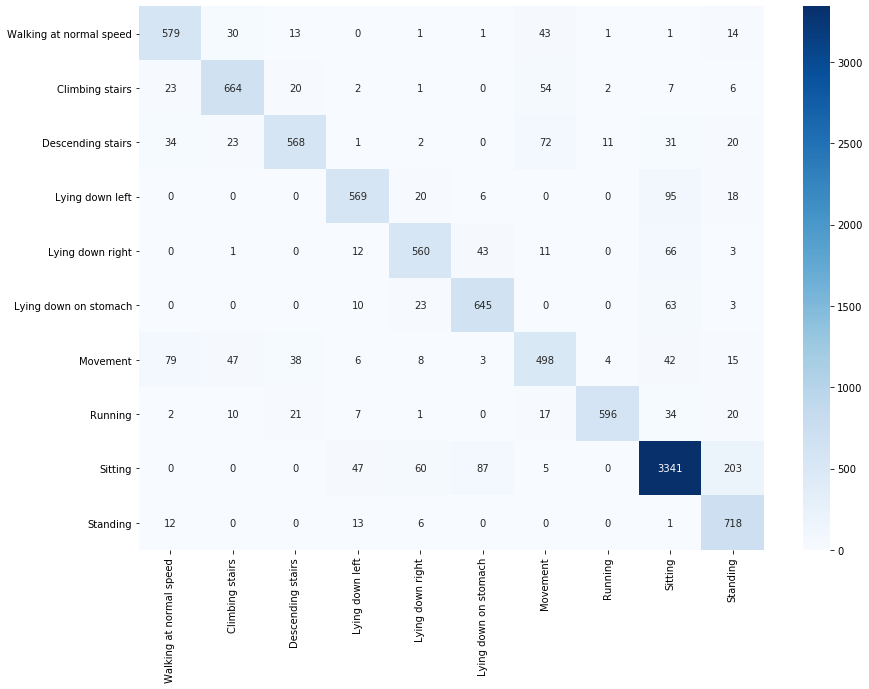

In [70]:
df_cm = pd.DataFrame(confusion_matrix(np.argmax(y_test, axis=1), run_interpreter(interpreter, X_test)),
                     index=class_labels.keys(),
                     columns=class_labels.keys())
plt.figure(figsize = (14,10))
sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")

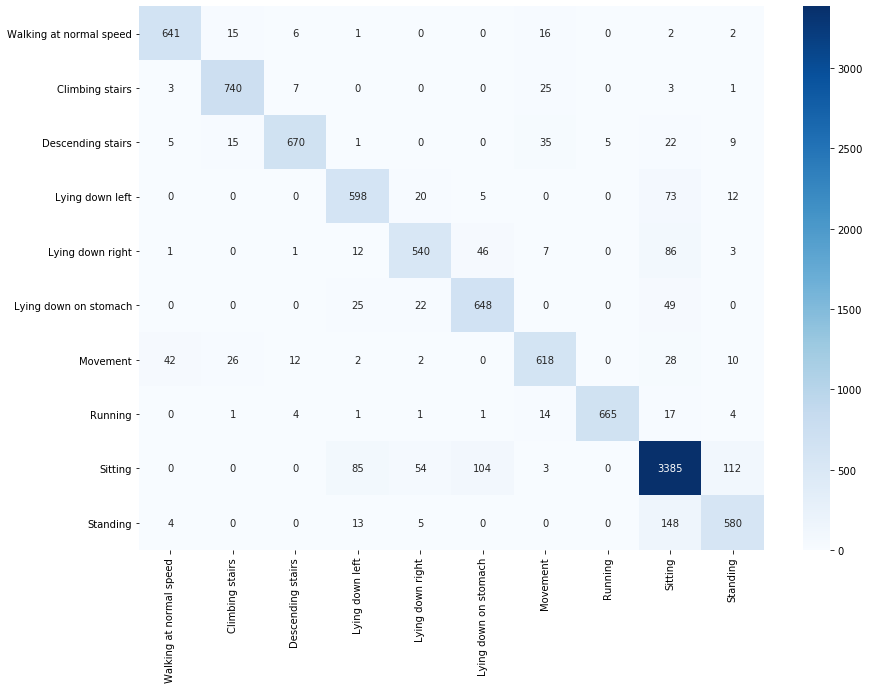

In [71]:
interpreter = tf.lite.Interpreter(model_path="models/cnn_model_hier_sitting_lyingback_thingy2021_2022_extended_filter.tflite")
interpreter.allocate_tensors()
cm = confusion_matrix(np.argmax(y_test, axis=1), run_interpreter(interpreter, X_test))

x = plot_heatmap(cm, class_labels.keys())

In [ ]:
x